# Evaluating the Impact of Oversampling Techniques on Imbalanced Healthcare Data: A Case Study on Stroke Prediction


##1.Problem Definition

In healthcare, predictive models can significantly improve patient outcomes by enabling early intervention and personalized treatment plans. However, many healthcare datasets, such as those predicting stroke occurrences, suffer from class imbalance. This study evaluates the effectiveness of various oversampling techniques on an imbalanced healthcare dataset related to stroke prediction.

Many healthcare datasets are imbalanced, leading to biased models that perform poorly in identifying the minority class. This study aims to:

1. **Assess Model Performance on Imbalanced Data:** Understand model performance when trained on imbalanced data without adjustments.
2. **Implement Oversampling Techniques:** Apply various oversampling methods to balance the dataset.
3. **Comparative Analysis:** Compare model performance on original vs. oversampled datasets using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
4. **Insights and Recommendations:** Identify which oversampling techniques yield the most significant improvements and provide recommendations for handling class imbalance in similar datasets.

##2.Dataset

The dataset used in this project contains information necessary to predict the occurrence of a stroke. Each row in the dataset represents a patient, and the dataset includes the following attributes:

- **id:** Unique identifier
- **gender:** "Male", "Female", or "Other"
- **age:** Age of the patient
- **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married:** "No" or "Yes"
- **work_type:** "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"
- **Residence_type:** "Rural" or "Urban"
- **avg_glucose_level:** Average glucose level in the blood
- **bmi:** Body mass index
- **smoking_status:** "Formerly smoked", "Never smoked", "Smokes", or "Unknown"
- **stroke:** 1 if the patient had a stroke, 0 if not

##3.Data Inspecting and Preprocessing

In [3]:
# Install necessary libraries
!pip install -U imbalanced-learn
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [5]:
# Load DefaultCreditCardClients.xls
import pandas as pd
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)
display(data.head())

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
# Check the shape of the dataset (#Rows, #Columns)
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(5110, 12)


In [9]:
# Check Dataset Information
print("Dataset Information:")
print(data.info)

Dataset Information:
<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Pr

In [10]:
print("\nSummary Statistics:")
data.describe().T


Summary Statistics:


count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

In [18]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [6]:
# Fill missing BMI values with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [7]:
# Check any duplicated values
print("\nDuplicated Values:")
print(data.duplicated().sum())


Duplicated Values:
0


In [21]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution (stroke):")
print(data['stroke'].value_counts())


Target Variable Distribution (stroke):
stroke
0    4861
1     249
Name: count, dtype: int64


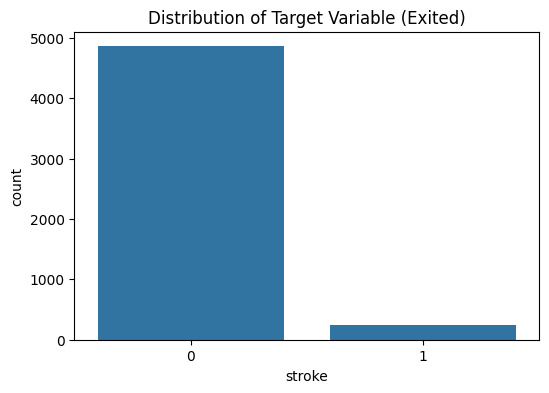

In [22]:
# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

In [23]:
# Check datatypes
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [30]:
data['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [24]:
print(data['ever_married'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [25]:
print(data['work_type'].value_counts())

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [27]:
print(data['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [28]:
print(data['Residence_type'].value_counts())

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [29]:
print(data['smoking_status'].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])


##4.Exploratory Data Analysis

###Correlation matrix

In [17]:
# Correlation matrix
print("\nCorrelation matrix:")
data.corr()


Correlation matrix:


id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.002511  0.003538      0.003550      -0.001296   
gender             0.002511  1.000000 -0.028202      0.020994       0.085447   
age                0.003538 -0.028202  1.000000      0.276398       0.263796   
hypertension       0.003550  0.020994  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.085447  0.263796      0.108306       1.000000   
ever_married       0.013690 -0.031005  0.679125      0.164243       0.114644   
work_type         -0.015757  0.056422 -0.361642     -0.051761      -0.028023   
Residence_type    -0.001403 -0.006738  0.014180     -0.007913       0.003092   
avg_glucose_level  0.001092  0.055180  0.238171      0.174474       0.161857   
bmi                0.002999 -0.026109  0.325942      0.160189       0.038899   
smoking_status     0.014074 -0.062581  0.265199      0.111038       0.048460   
stroke             0.006388  0.008929  0.245257      0.127904       0.134914   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
id                     0.013690  -0.015757       -0.001403           0.001092   
gender                -0.031005   0.056422       -0.006738           0.055180   
age                    0.679125  -0.361642        0.014180           0.238171   
hypertension           0.164243  -0.051761       -0.007913           0.174474   
heart_disease          0.114644  -0.028023        0.003092           0.161857   
ever_married           1.000000  -0.352722        0.006261           0.155068   
work_type             -0.352722   1.000000       -0.007316          -0.050513   
Residence_type         0.006261  -0.007316        1.000000          -0.004946   
avg_glucose_level      0.155068  -0.050513       -0.004946           1.000000   
bmi                    0.335705  -0.299448       -0.000120           0.168751   
smoking_status         0.259647  -0.305927        0.008237           0.063437   
stroke                 0.108340  -0.032316        0.015458           0.131945   

                        bmi  smoking_status    stroke  
id                 0.002999        0.014074  0.006388  
gender            -0.026109       -0.062581  0.008929  
age                0.325942        0.265199  0.245257  
hypertension       0.160189        0.111038  0.127904  
heart_disease      0.038899        0.048460  0.134914  
ever_married       0.335705        0.259647  0.108340  
work_type         -0.299448       -0.305927 -0.032316  
Residence_type    -0.000120        0.008237  0.015458  
avg_glucose_level  0.168751        0.063437  0.131945  
bmi                1.000000        0.219148  0.038947  
smoking_status     0.219148        1.000000  0.028123  
stroke             0.038947        0.028123  1.000000

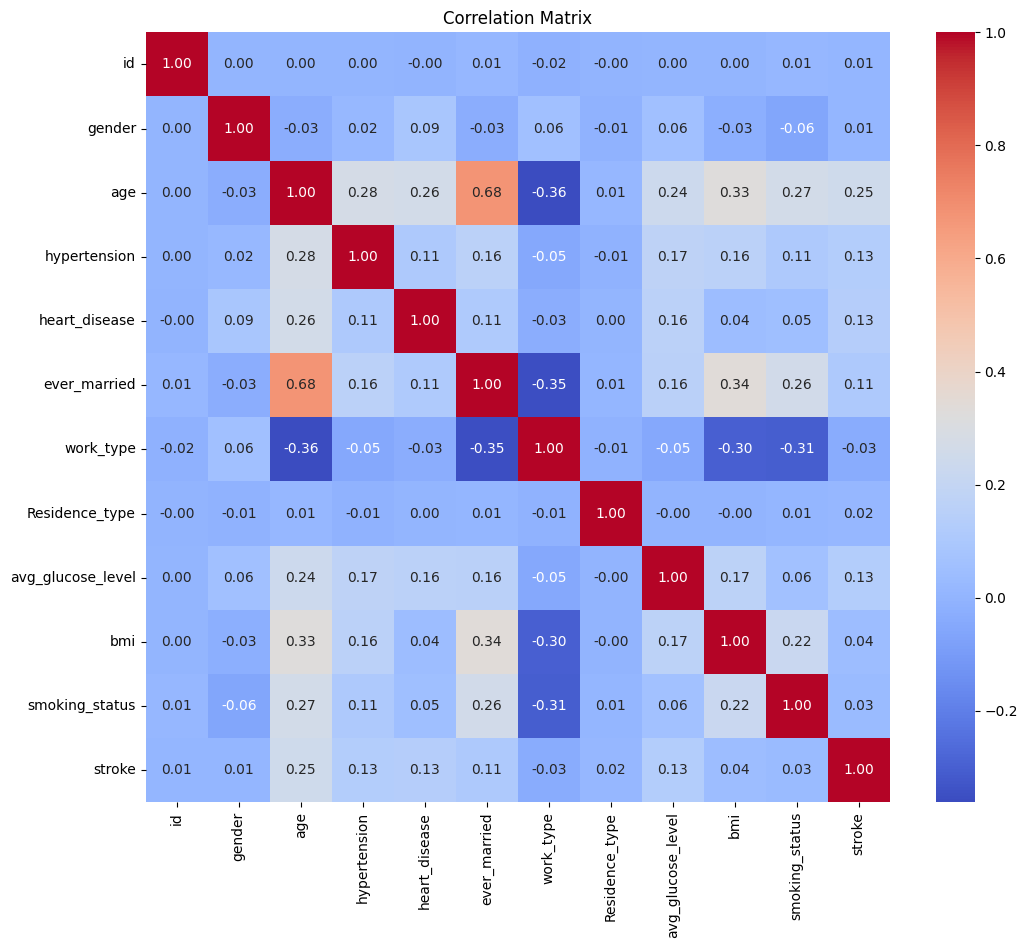

In [18]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

###Distribution of numerical features

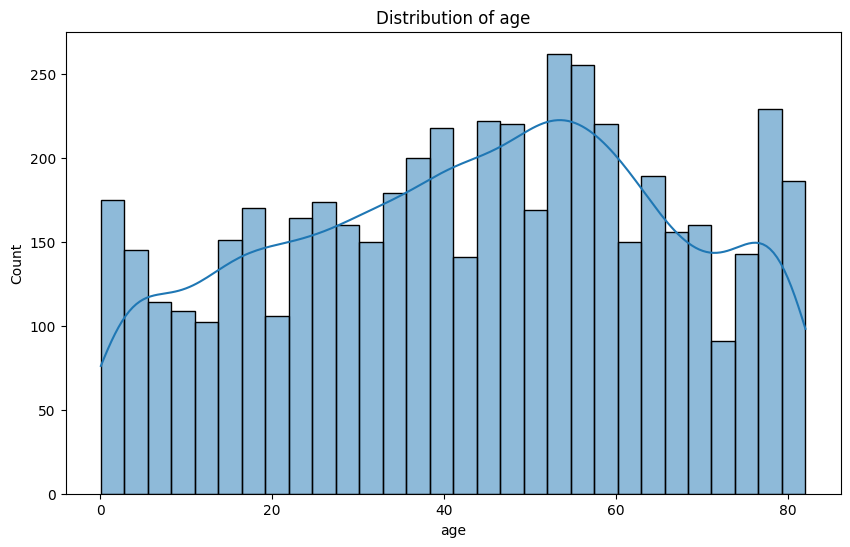

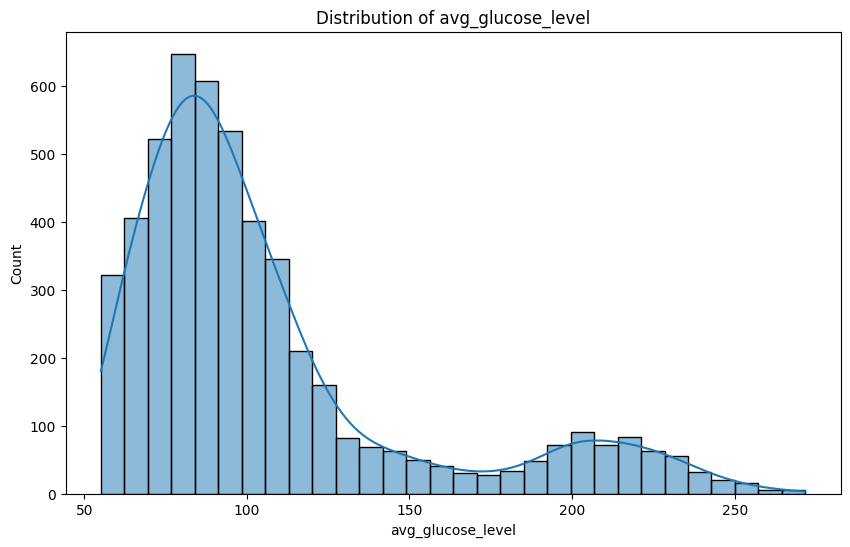

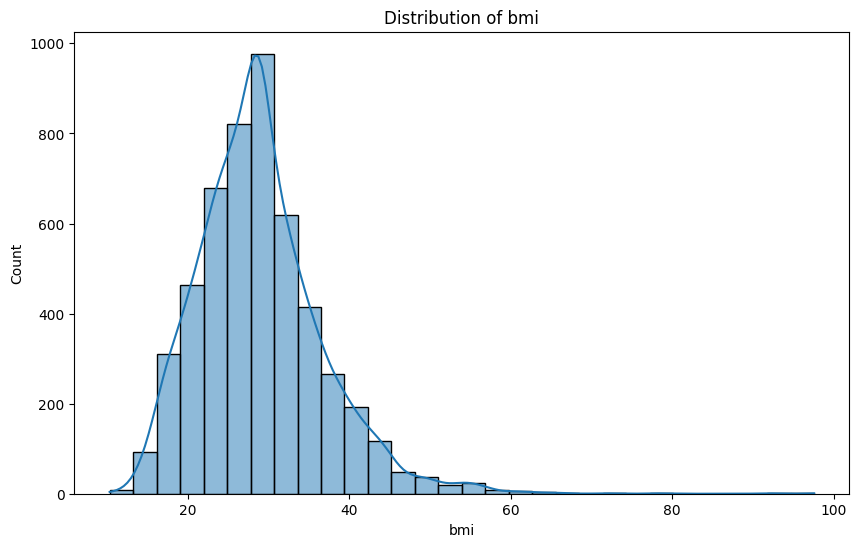

In [14]:
# Distribution of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()
    sns.countplot(x=feature, hue='stroke', data=data)
    plt.title(f'{feature} by Stroke Outcome')
    plt.show()

### Box plots of numerical features by stroke outcome

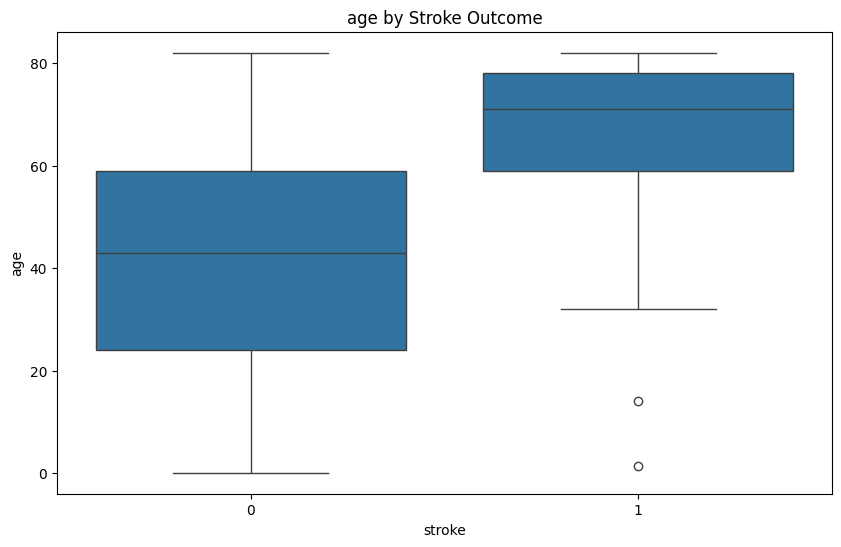

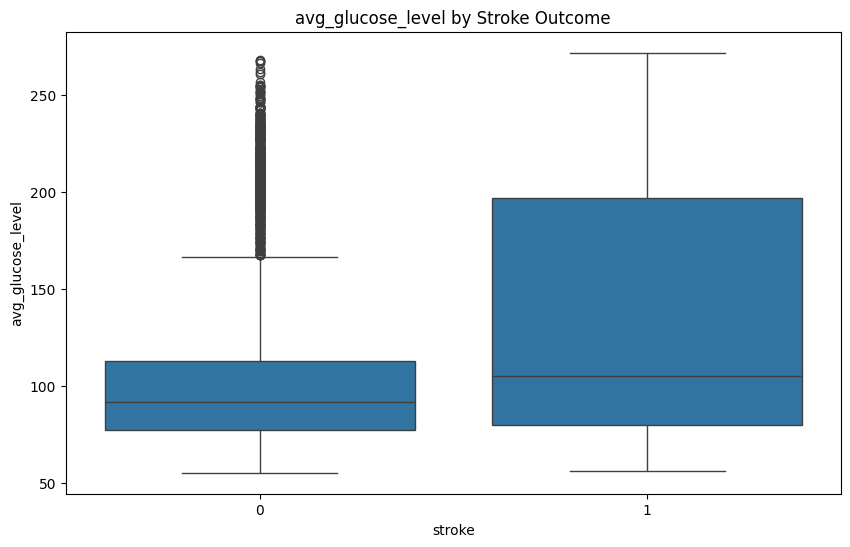

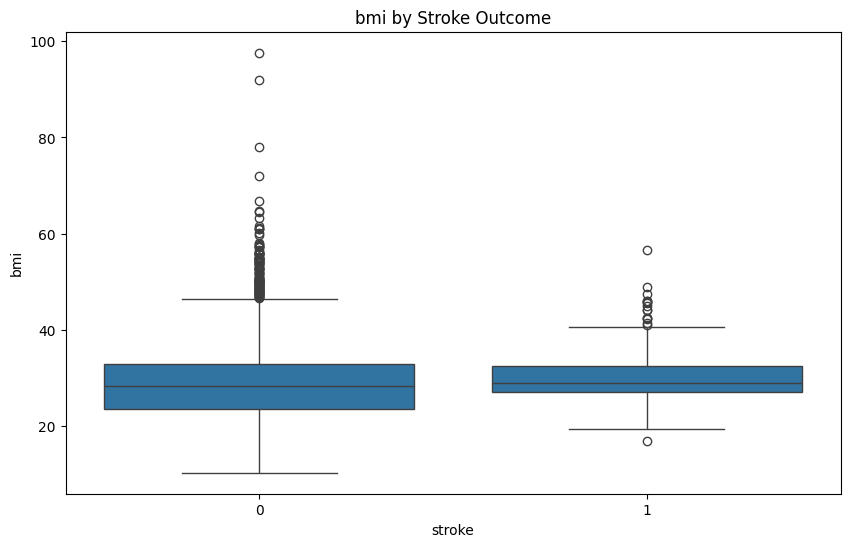

In [15]:
# Box plots of numerical features by stroke outcome
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='stroke', y=feature, data=data)
    plt.title(f'{feature} by Stroke Outcome')
    plt.show()

###Count plots of categorical features

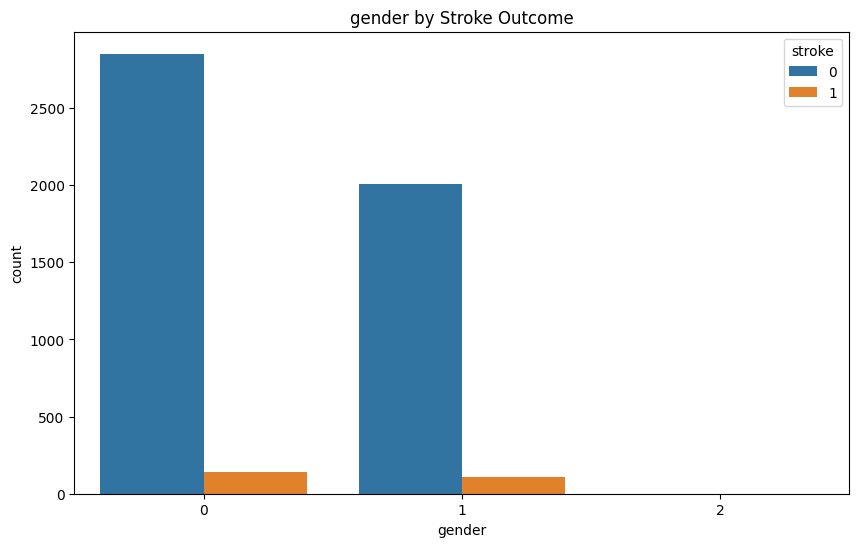

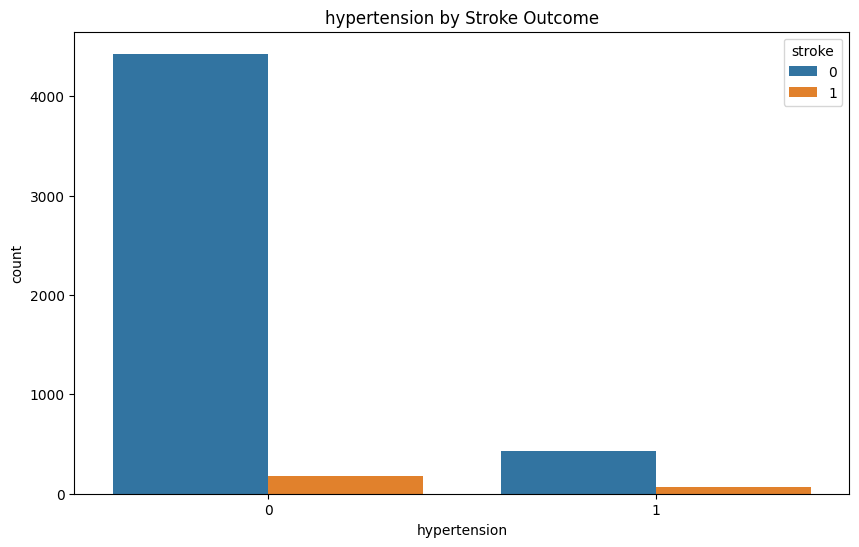

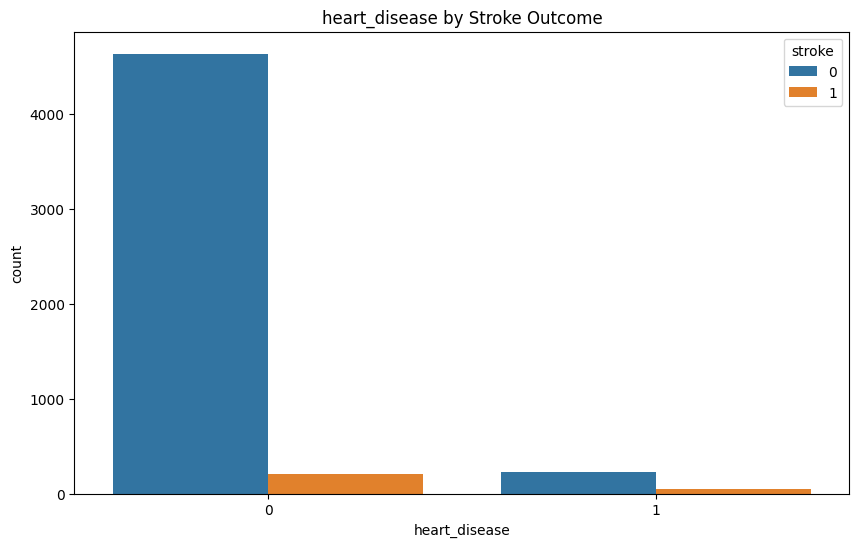

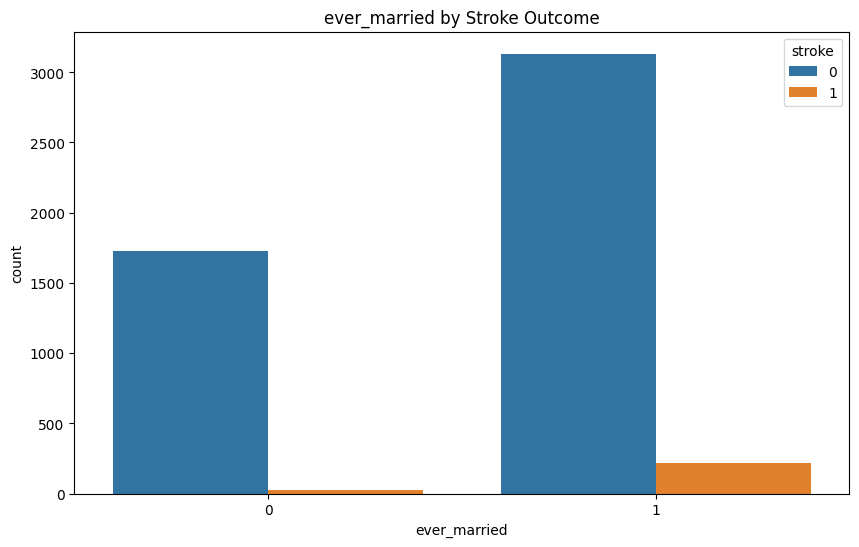

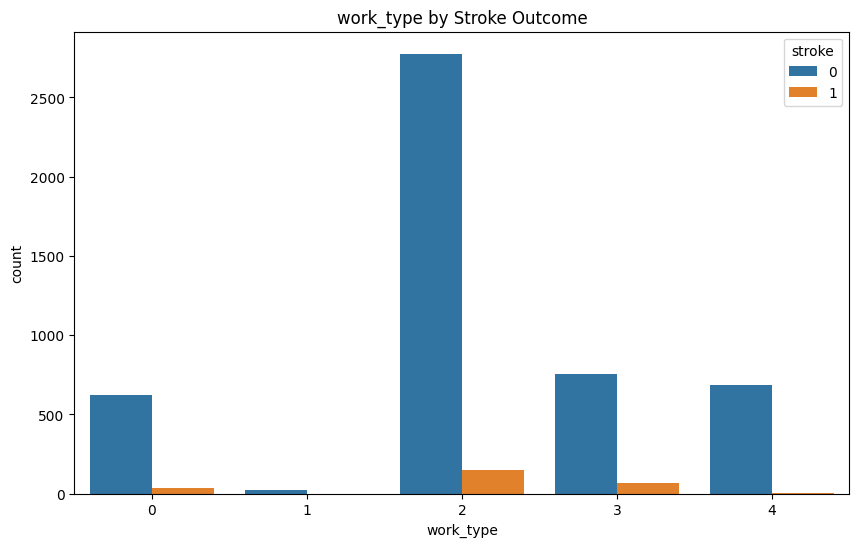

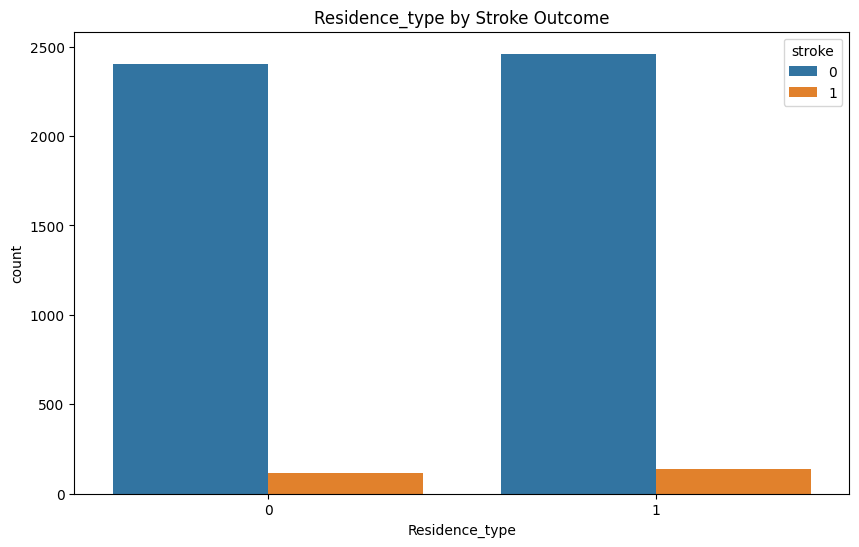

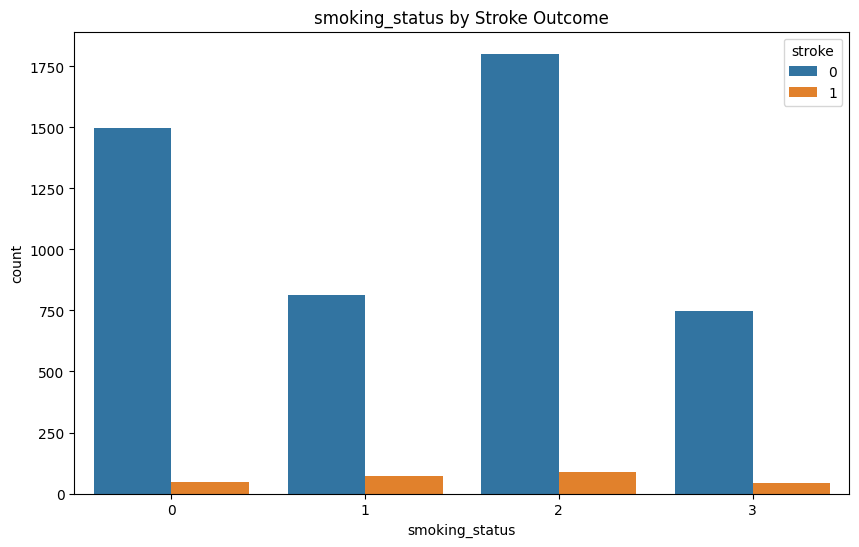

In [11]:
# Count plots of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='stroke', data=data)
    plt.title(f'{feature} by Stroke Outcome')
    plt.show()


##5.Training the model

In [19]:
# Split the data into features and target variable
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define oversampling techniques
oversampling_methods = {
    'Random Over-Sampling': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'Borderline-SMOTE': BorderlineSMOTE(),
    'SVMSMOTE': SVMSMOTE(),
    'KMeansSMOTE': KMeansSMOTE(),
    'SMOTEENN': SMOTEENN(),
    'SMOTETomek': SMOTETomek()
}

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Extra Trees': ExtraTreesClassifier()
}

##6.Evaluating the model



###Models on imbalanced data


Evaluating models on imbalanced data

Model: Logistic Regression on imbalanced data
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.8514952956989248


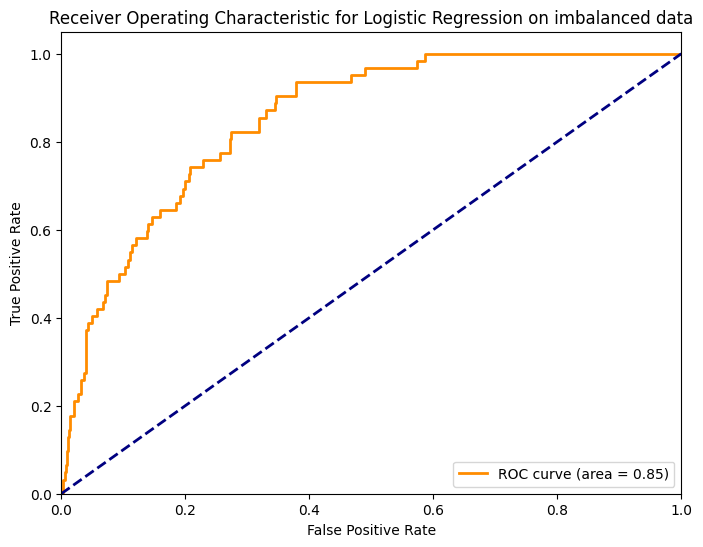

Confusion Matrix:
 [[960   0]
 [ 62   0]]


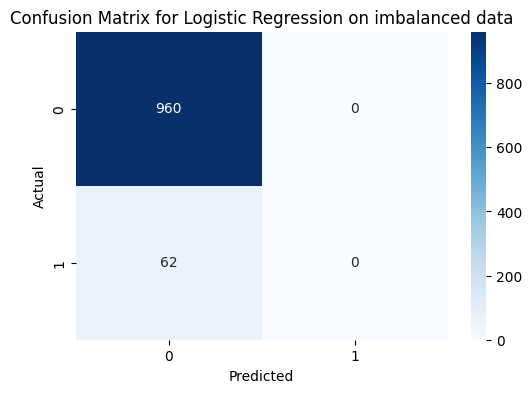


Model: Random Forest on imbalanced data
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.7966817876344086


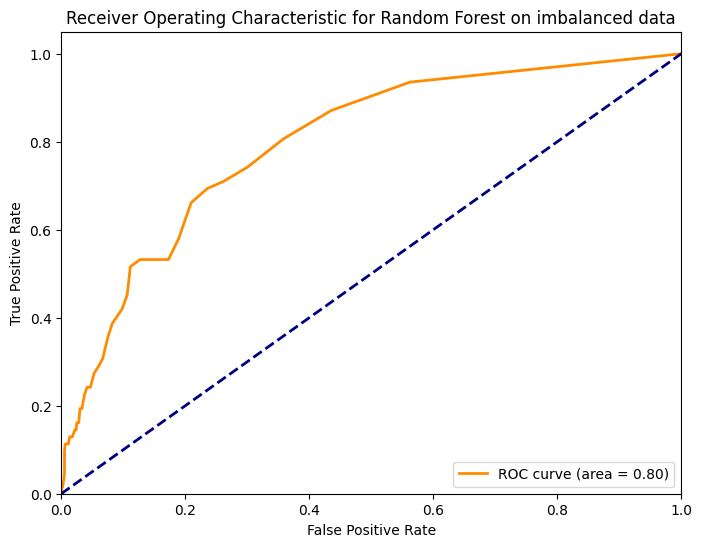

Confusion Matrix:
 [[960   0]
 [ 62   0]]


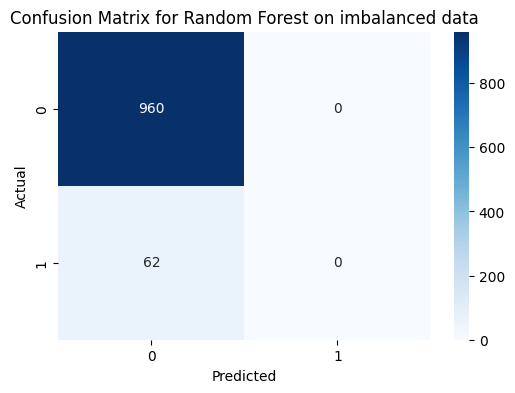


Model: Support Vector Machine on imbalanced data
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.6284442204301075


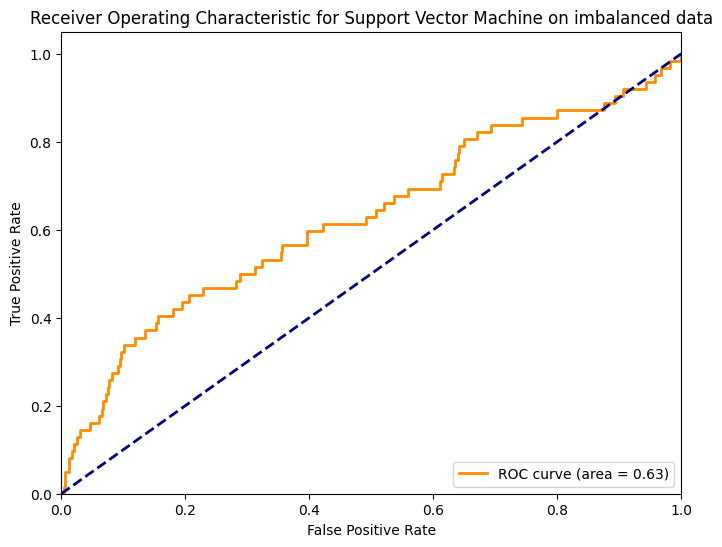

Confusion Matrix:
 [[960   0]
 [ 62   0]]


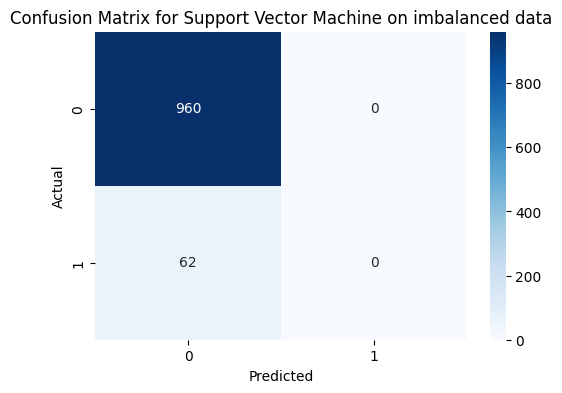


Model: Gradient Boosting on imbalanced data
Accuracy: 0.9383561643835616
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

ROC AUC Score: 0.8347278225806452


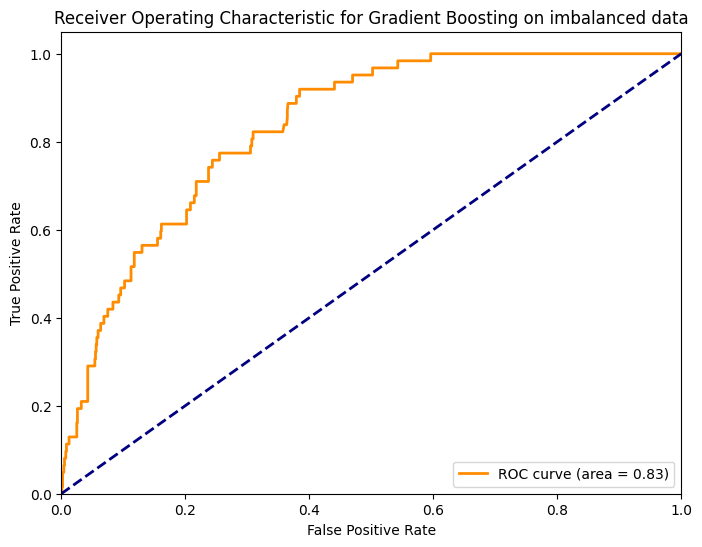

Confusion Matrix:
 [[958   2]
 [ 61   1]]


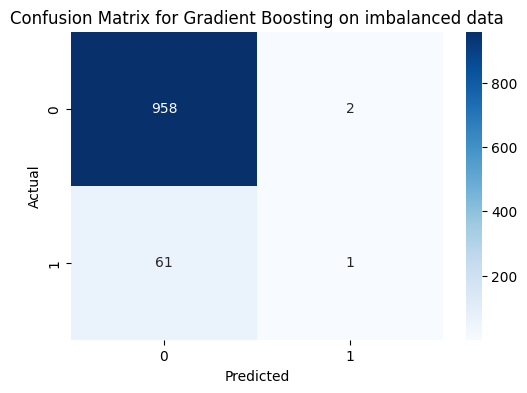


Model: AdaBoost on imbalanced data
Accuracy: 0.9373776908023483
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.7925487231182796


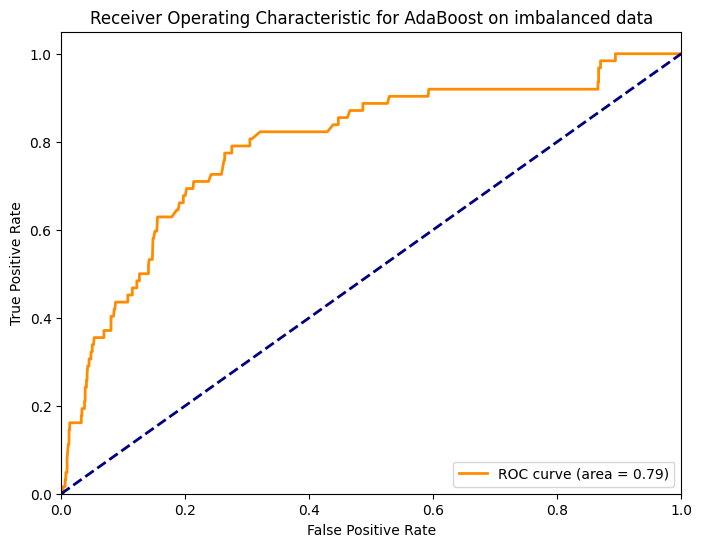

Confusion Matrix:
 [[958   2]
 [ 62   0]]


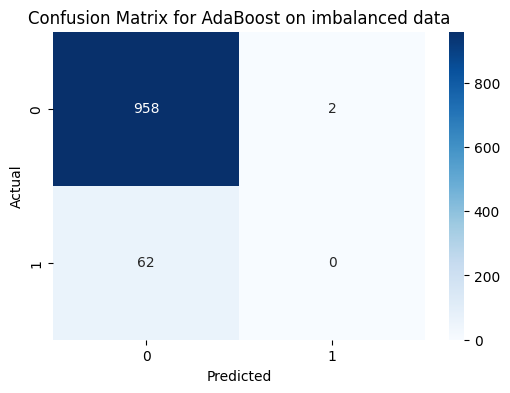


Model: k-Nearest Neighbors on imbalanced data
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.6474966397849462


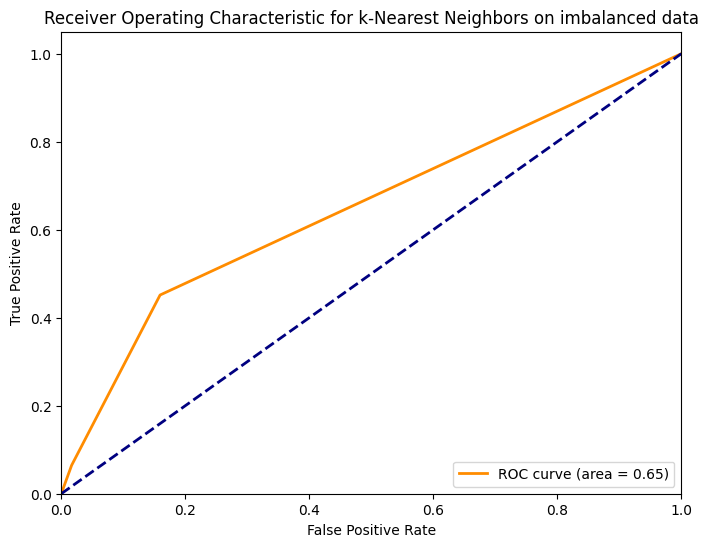

Confusion Matrix:
 [[960   0]
 [ 62   0]]


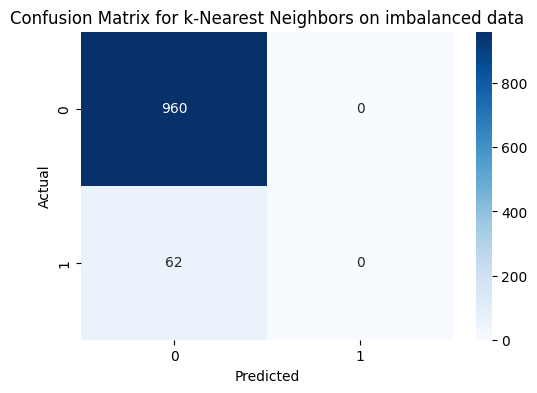


Model: Decision Tree on imbalanced data
Accuracy: 0.9197651663405088
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.27      0.19      0.23        62

    accuracy                           0.92      1022
   macro avg       0.61      0.58      0.59      1022
weighted avg       0.91      0.92      0.91      1022

ROC AUC Score: 0.5801075268817204


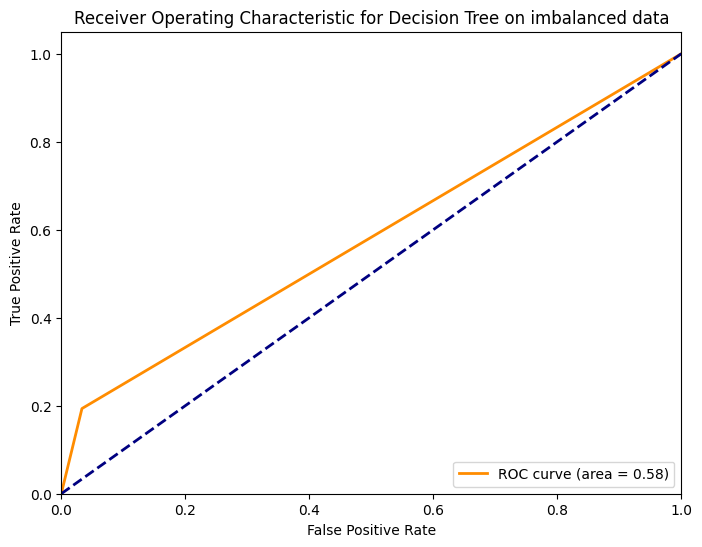

Confusion Matrix:
 [[928  32]
 [ 50  12]]


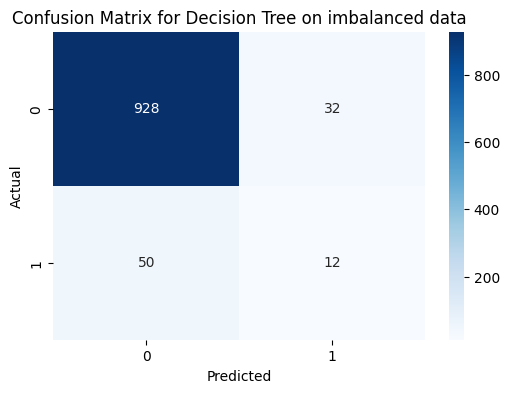


Model: Naive Bayes on imbalanced data
Accuracy: 0.8669275929549902
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022

ROC AUC Score: 0.8288978494623656


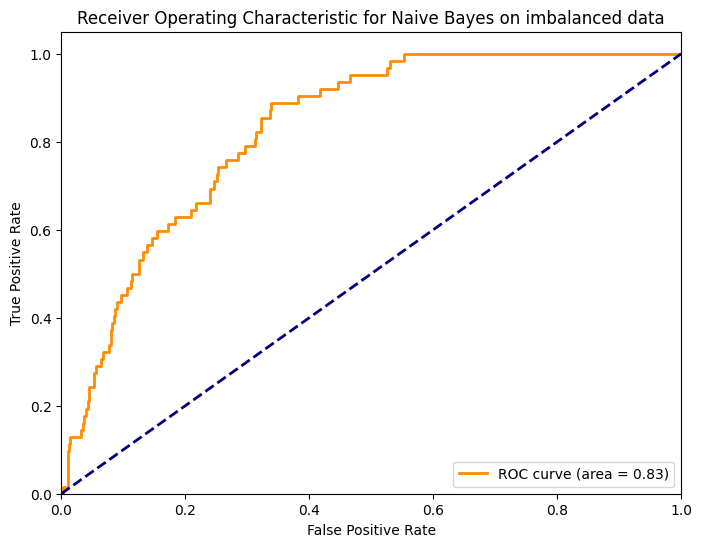

Confusion Matrix:
 [[857 103]
 [ 33  29]]


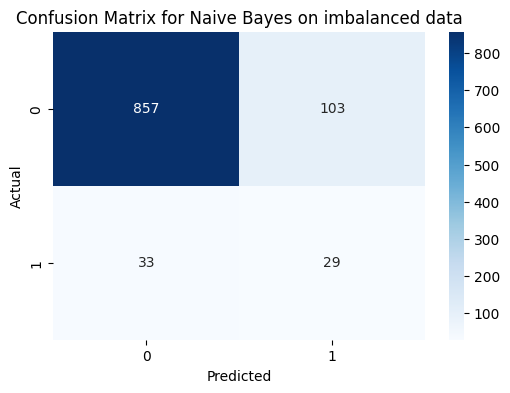


Model: Linear Discriminant Analysis on imbalanced data
Accuracy: 0.9344422700587084
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.27      0.05      0.08        62

    accuracy                           0.93      1022
   macro avg       0.61      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022

ROC AUC Score: 0.8416666666666666


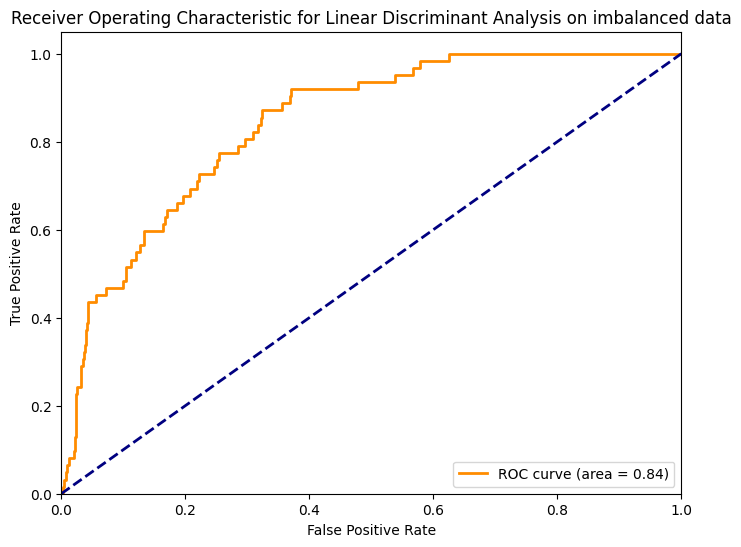

Confusion Matrix:
 [[952   8]
 [ 59   3]]


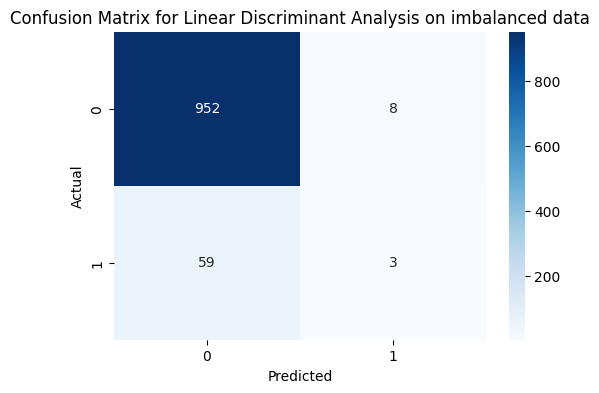


Model: Quadratic Discriminant Analysis on imbalanced data
Accuracy: 0.8796477495107632
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       960
           1       0.24      0.45      0.31        62

    accuracy                           0.88      1022
   macro avg       0.60      0.68      0.62      1022
weighted avg       0.92      0.88      0.90      1022

ROC AUC Score: 0.8301243279569893


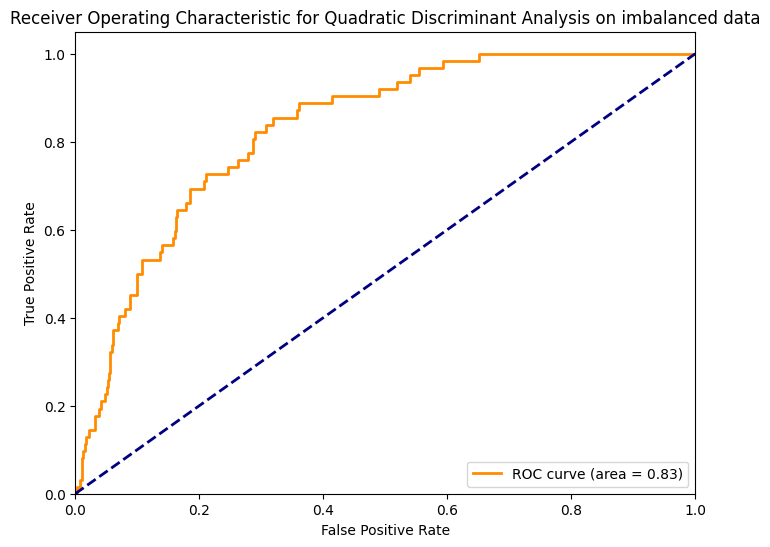

Confusion Matrix:
 [[871  89]
 [ 34  28]]


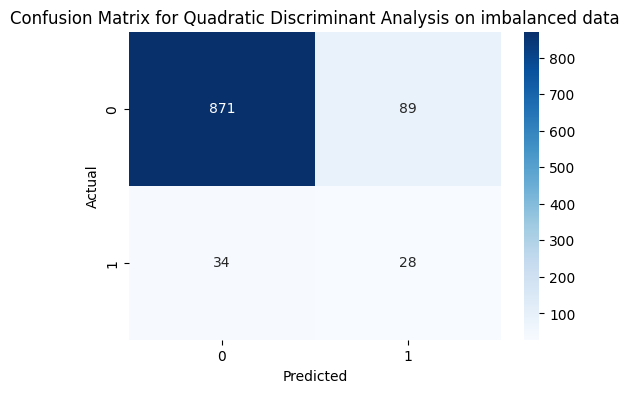


Model: Extra Trees on imbalanced data
Accuracy: 0.9354207436399217
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022

ROC AUC Score: 0.7711693548387097


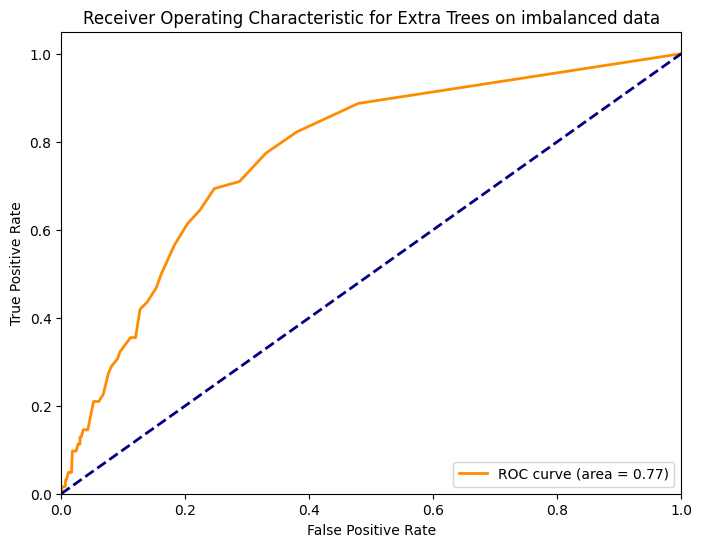

Confusion Matrix:
 [[955   5]
 [ 61   1]]


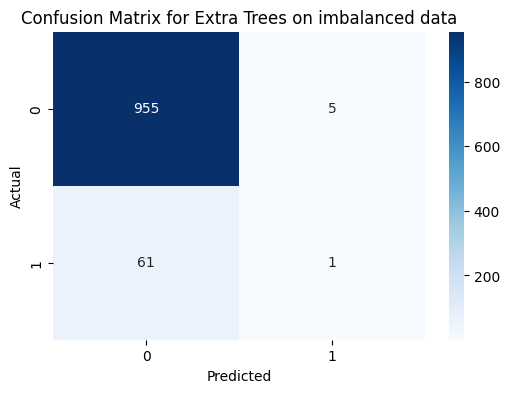

In [22]:
# Train and evaluate models on imbalanced data
print("\nEvaluating models on imbalanced data")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\nModel: {model_name} on imbalanced data")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if y_pred_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_name} on imbalanced data')
        plt.legend(loc="lower right")
        plt.show()

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} on imbalanced data')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Oversampling techniques


Applying Random Over-Sampling

Model: Logistic Regression after Random Over-Sampling
Accuracy: 0.7495107632093934
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022

ROC AUC Score: 0.8507896505376344


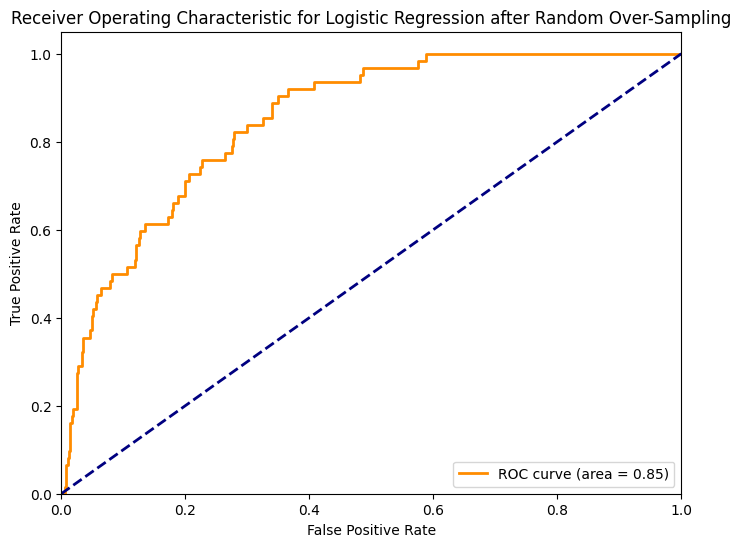

Confusion Matrix:
 [[719 241]
 [ 15  47]]


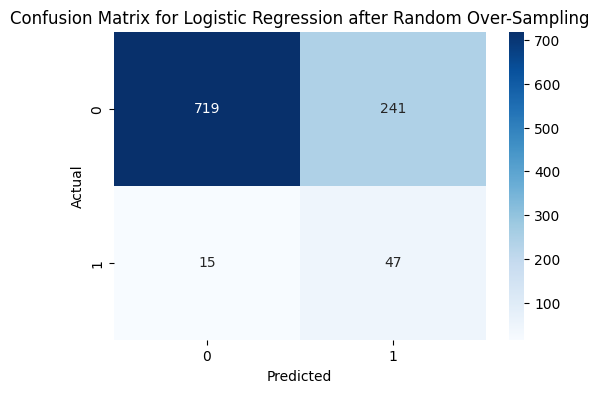


Model: Random Forest after Random Over-Sampling
Accuracy: 0.9383561643835616
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.40      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.67      0.51      0.51      1022
weighted avg       0.91      0.94      0.91      1022

ROC AUC Score: 0.814306115591398


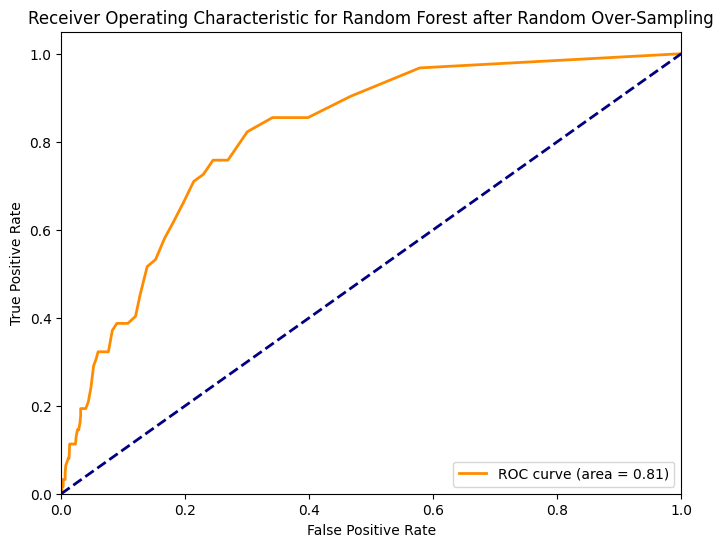

Confusion Matrix:
 [[957   3]
 [ 60   2]]


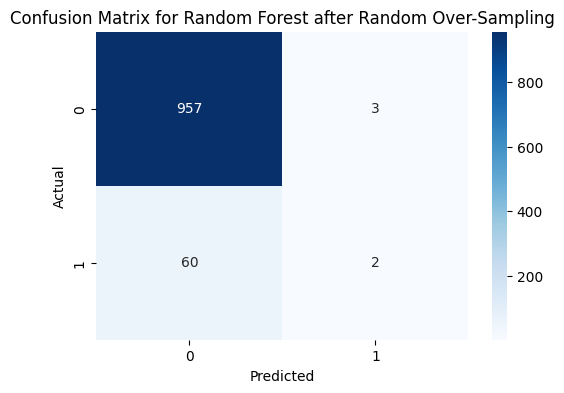


Model: Support Vector Machine after Random Over-Sampling
Accuracy: 0.7710371819960861
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.53      0.22        62

    accuracy                           0.77      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.91      0.77      0.83      1022

ROC AUC Score: 0.7778393817204302


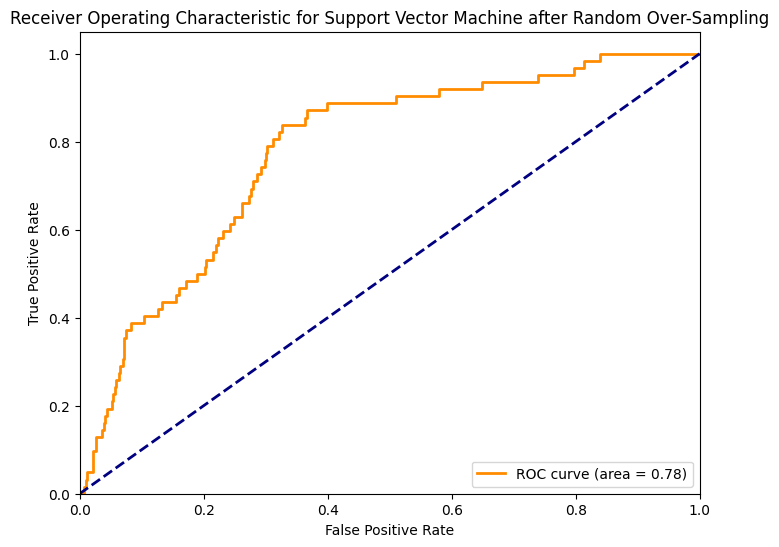

Confusion Matrix:
 [[755 205]
 [ 29  33]]


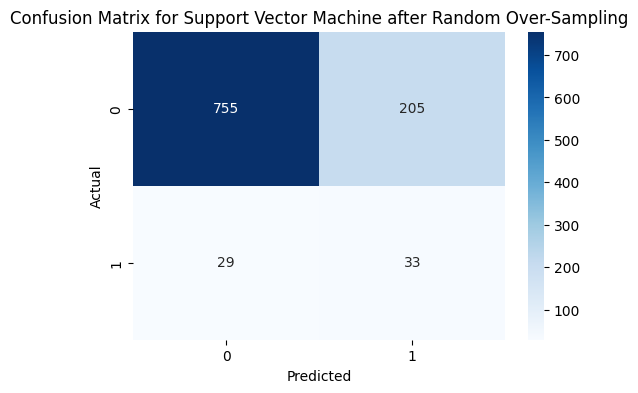


Model: Gradient Boosting after Random Over-Sampling
Accuracy: 0.7925636007827789
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.18      0.66      0.28        62

    accuracy                           0.79      1022
   macro avg       0.58      0.73      0.58      1022
weighted avg       0.93      0.79      0.84      1022

ROC AUC Score: 0.8152889784946237


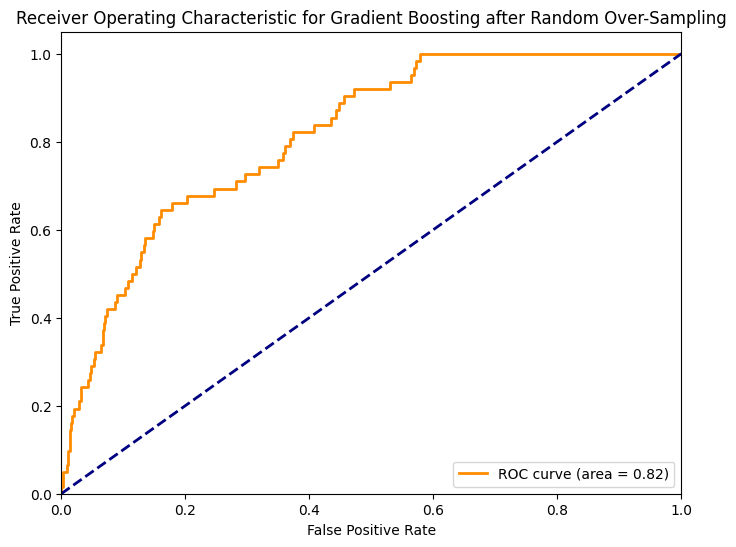

Confusion Matrix:
 [[769 191]
 [ 21  41]]


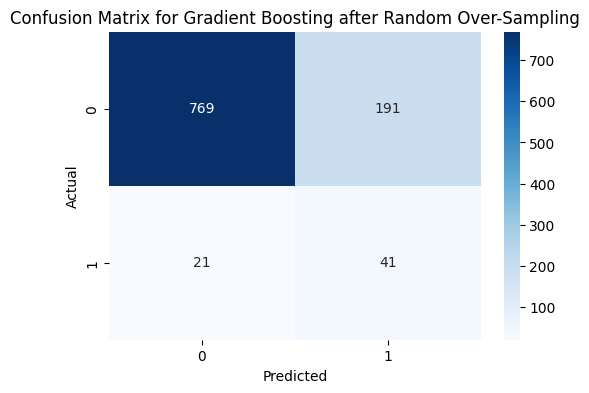


Model: AdaBoost after Random Over-Sampling
Accuracy: 0.7397260273972602
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.77      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022

ROC AUC Score: 0.8390961021505376


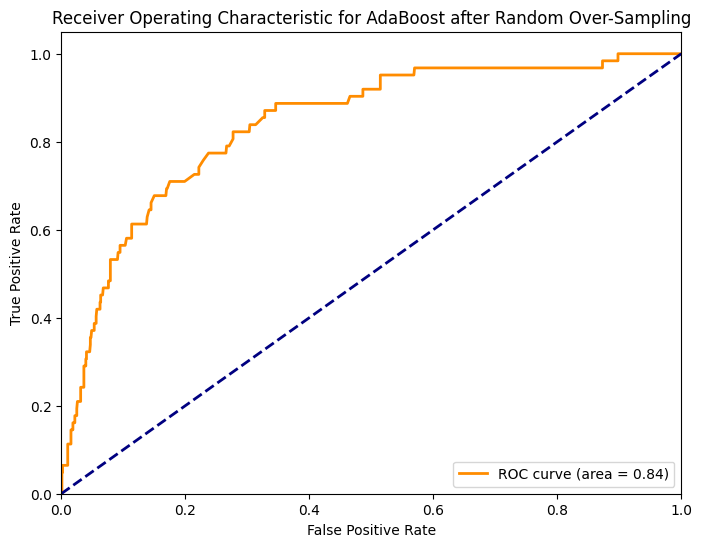

Confusion Matrix:
 [[708 252]
 [ 14  48]]


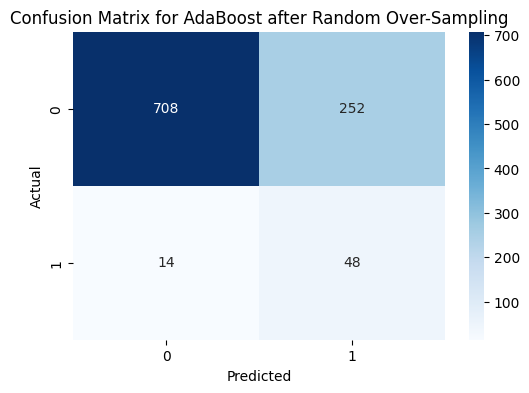


Model: k-Nearest Neighbors after Random Over-Sampling
Accuracy: 0.8679060665362035
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       960
           1       0.18      0.32      0.23        62

    accuracy                           0.87      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.91      0.87      0.89      1022

ROC AUC Score: 0.6494539650537634


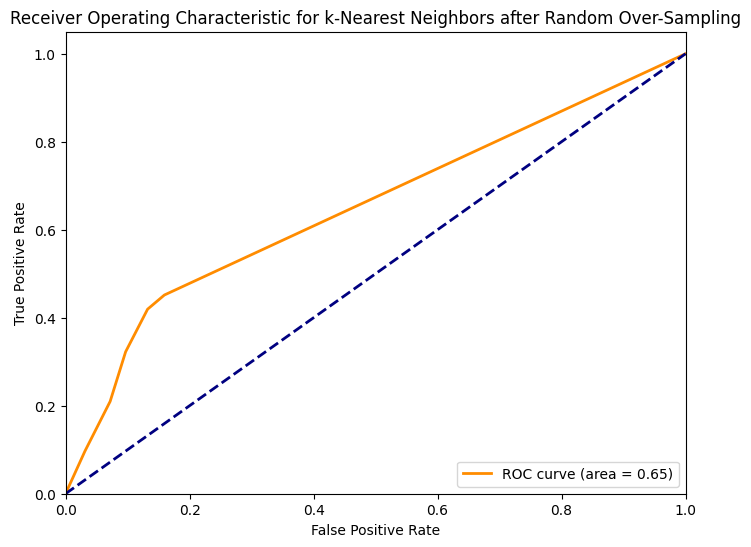

Confusion Matrix:
 [[867  93]
 [ 42  20]]


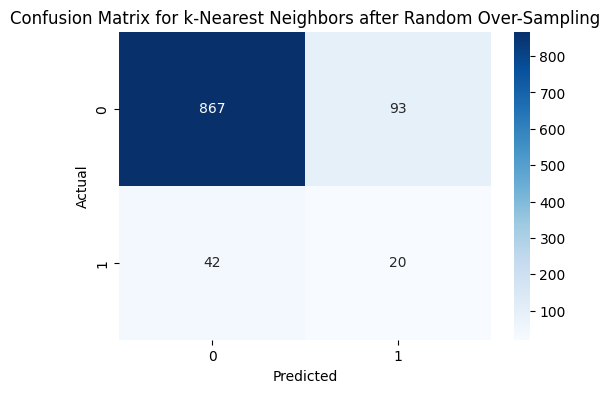


Model: Decision Tree after Random Over-Sampling
Accuracy: 0.910958904109589
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022

ROC AUC Score: 0.5377016129032257


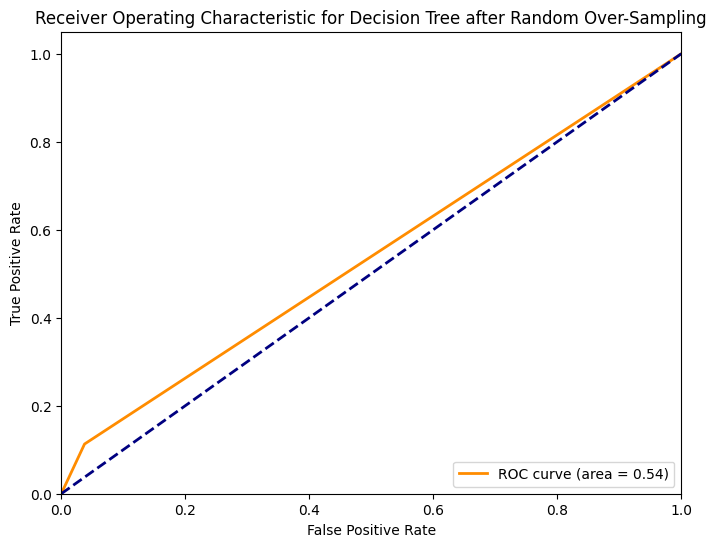

Confusion Matrix:
 [[924  36]
 [ 55   7]]


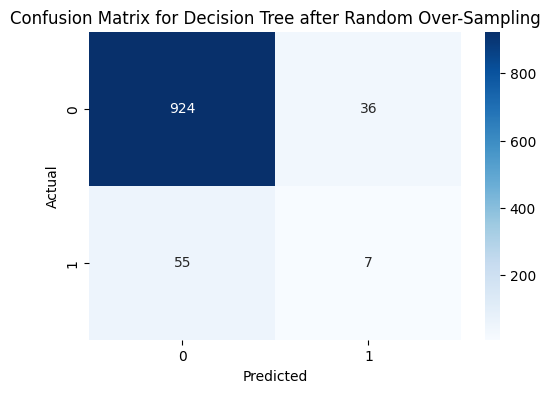


Model: Naive Bayes after Random Over-Sampling
Accuracy: 0.7377690802348337
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.15      0.74      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.74      0.55      1022
weighted avg       0.93      0.74      0.81      1022

ROC AUC Score: 0.8285114247311828


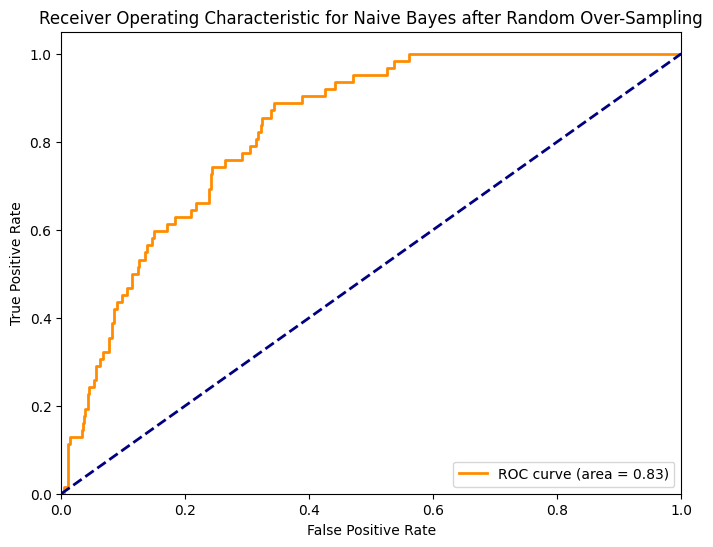

Confusion Matrix:
 [[708 252]
 [ 16  46]]


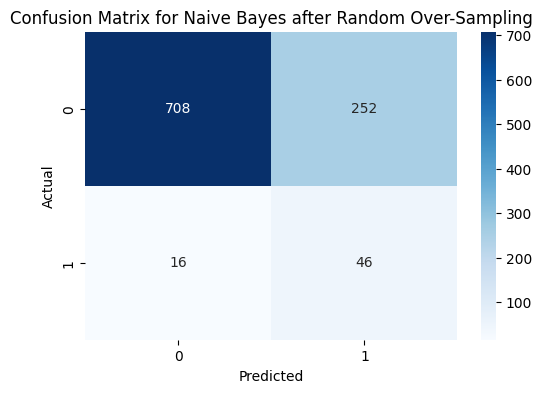


Model: Linear Discriminant Analysis after Random Over-Sampling
Accuracy: 0.7348336594911937
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.76      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score: 0.8495631720430108


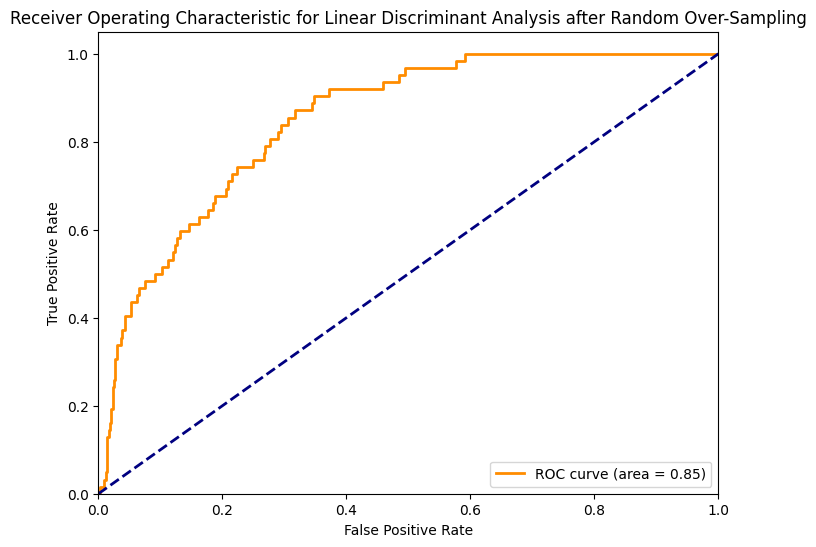

Confusion Matrix:
 [[704 256]
 [ 15  47]]


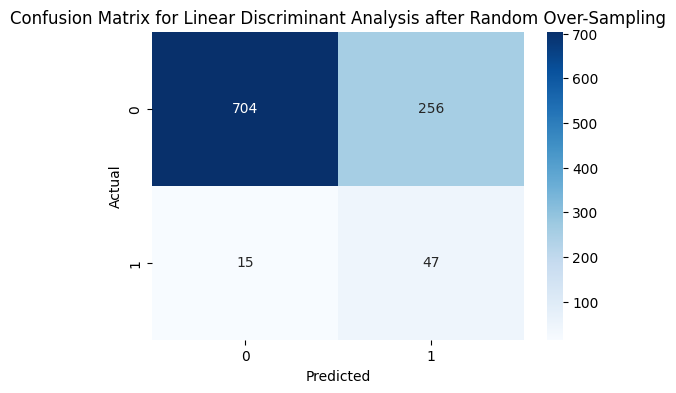


Model: Quadratic Discriminant Analysis after Random Over-Sampling
Accuracy: 0.7495107632093934
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.74      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022

ROC AUC Score: 0.8310147849462366


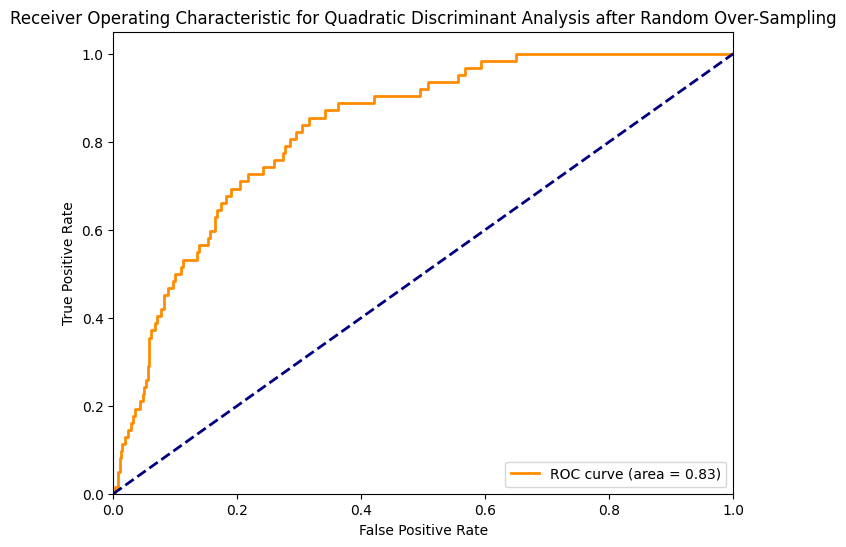

Confusion Matrix:
 [[720 240]
 [ 16  46]]


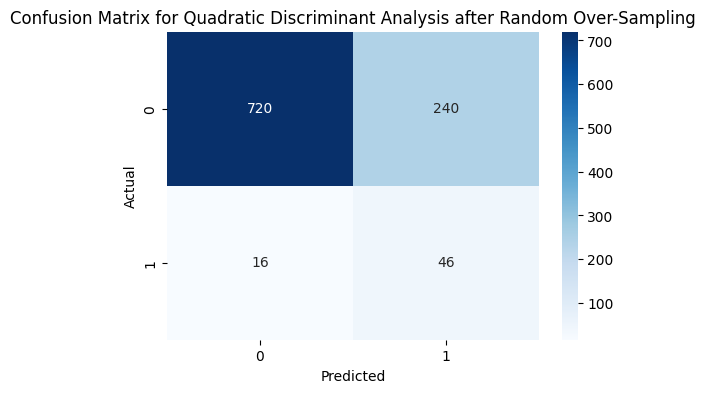


Model: Extra Trees after Random Over-Sampling
Accuracy: 0.9373776908023483
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

ROC AUC Score: 0.7578881048387096


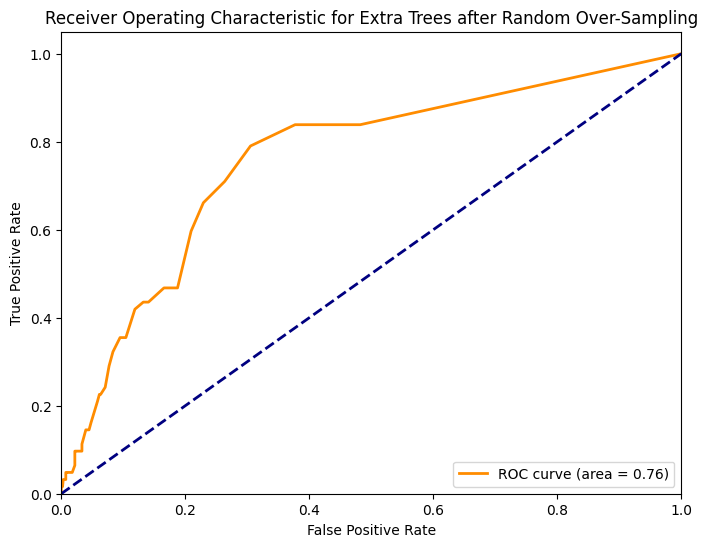

Confusion Matrix:
 [[956   4]
 [ 60   2]]


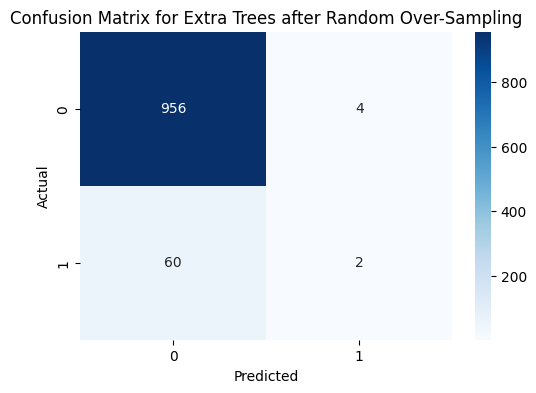


Applying SMOTE

Model: Logistic Regression after SMOTE
Accuracy: 0.7592954990215264
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86       960
           1       0.17      0.76      0.28        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.93      0.76      0.82      1022

ROC AUC Score: 0.8491431451612903


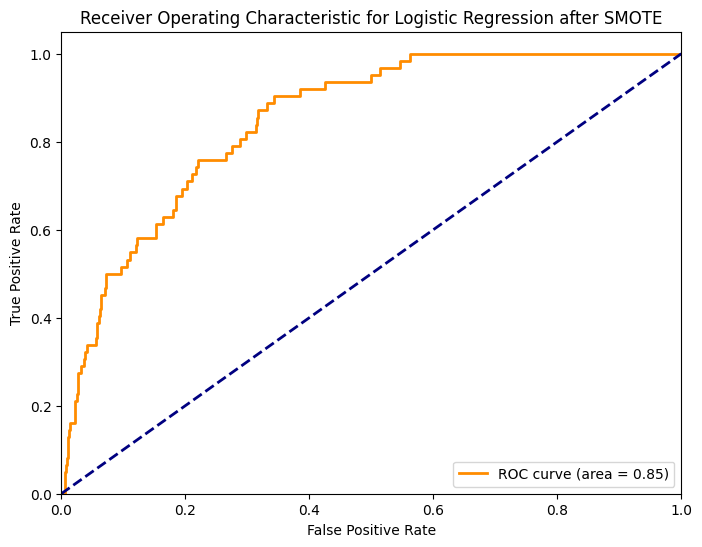

Confusion Matrix:
 [[729 231]
 [ 15  47]]


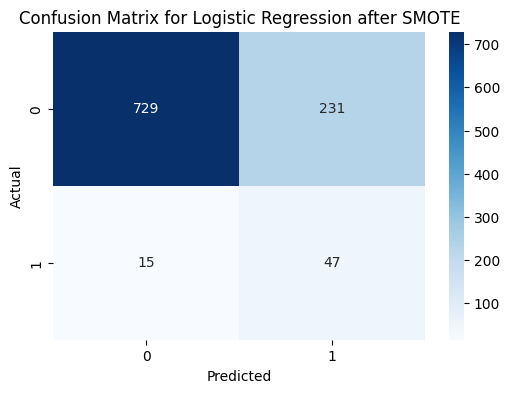


Model: Random Forest after SMOTE
Accuracy: 0.9168297455968689
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.19      0.11      0.14        62

    accuracy                           0.92      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.8054435483870968


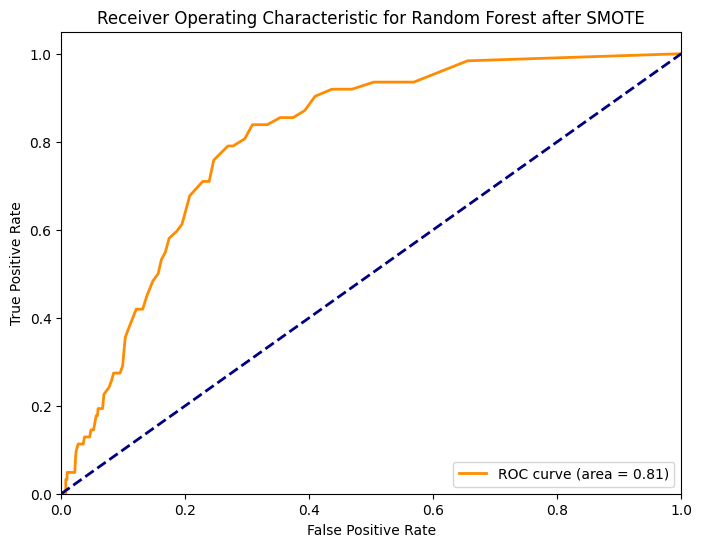

Confusion Matrix:
 [[930  30]
 [ 55   7]]


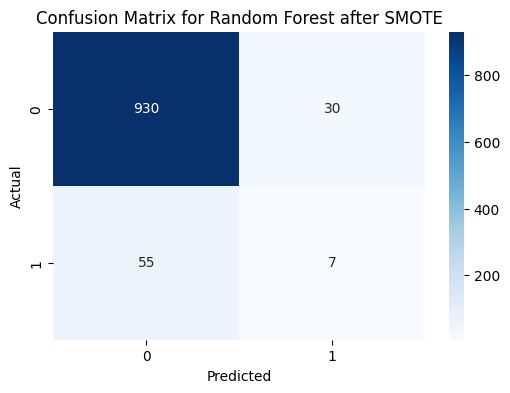


Model: Support Vector Machine after SMOTE
Accuracy: 0.776908023483366
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.52      0.22        62

    accuracy                           0.78      1022
   macro avg       0.55      0.65      0.54      1022
weighted avg       0.91      0.78      0.83      1022

ROC AUC Score: 0.76377688172043


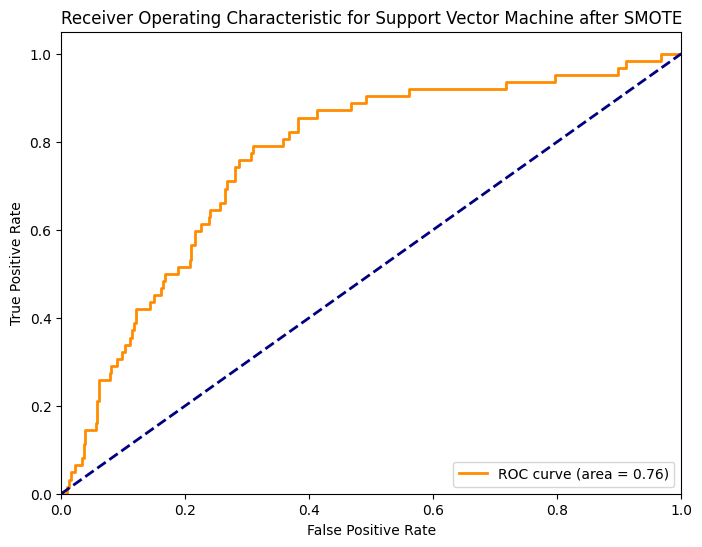

Confusion Matrix:
 [[762 198]
 [ 30  32]]


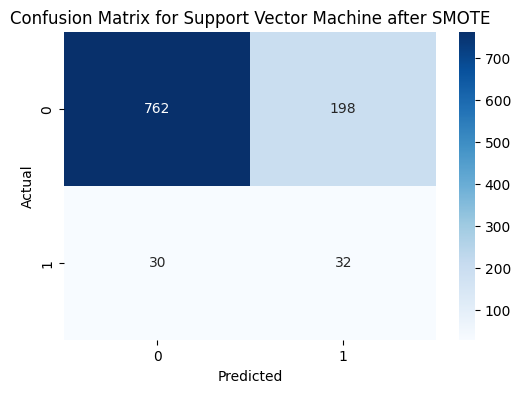


Model: Gradient Boosting after SMOTE
Accuracy: 0.8747553816046967
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       960
           1       0.21      0.39      0.27        62

    accuracy                           0.87      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.91      0.87      0.89      1022

ROC AUC Score: 0.8204889112903226


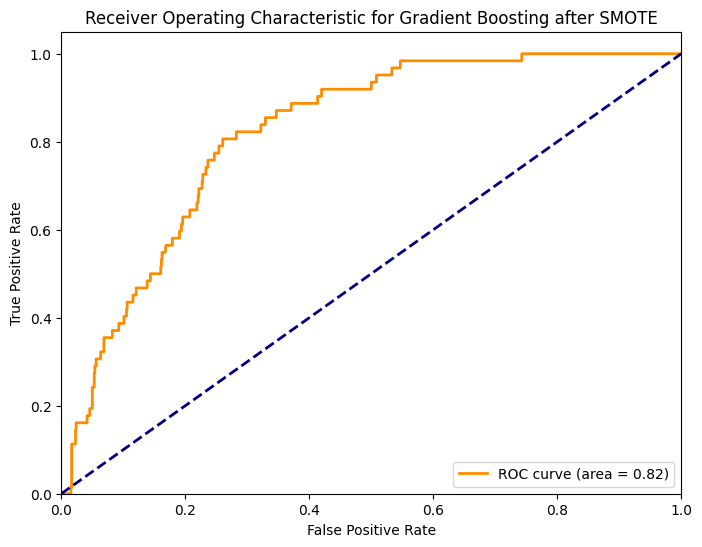

Confusion Matrix:
 [[870  90]
 [ 38  24]]


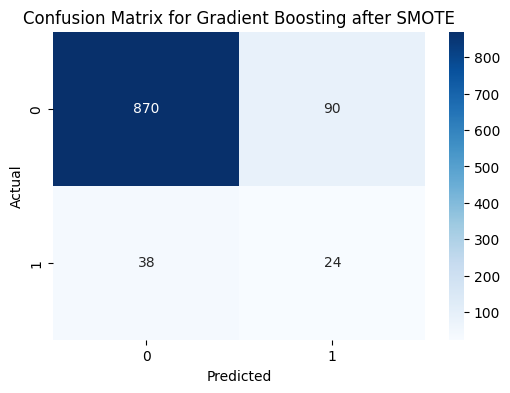


Model: AdaBoost after SMOTE
Accuracy: 0.821917808219178
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       960
           1       0.18      0.55      0.27        62

    accuracy                           0.82      1022
   macro avg       0.57      0.69      0.59      1022
weighted avg       0.92      0.82      0.86      1022

ROC AUC Score: 0.8124915994623656


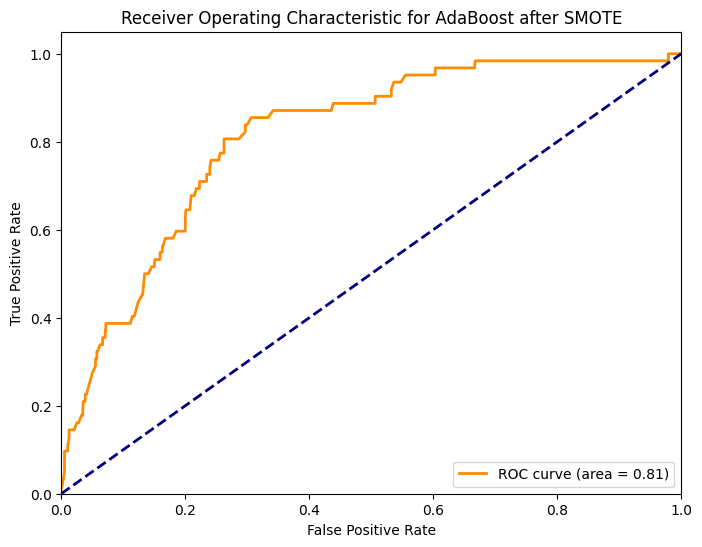

Confusion Matrix:
 [[806 154]
 [ 28  34]]


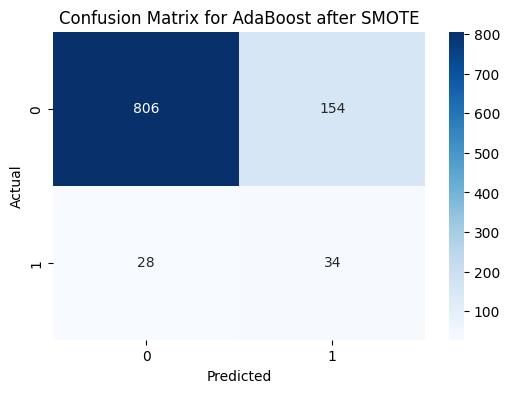


Model: k-Nearest Neighbors after SMOTE
Accuracy: 0.8287671232876712
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.90       960
           1       0.16      0.42      0.23        62

    accuracy                           0.83      1022
   macro avg       0.56      0.64      0.57      1022
weighted avg       0.91      0.83      0.86      1022

ROC AUC Score: 0.6856854838709676


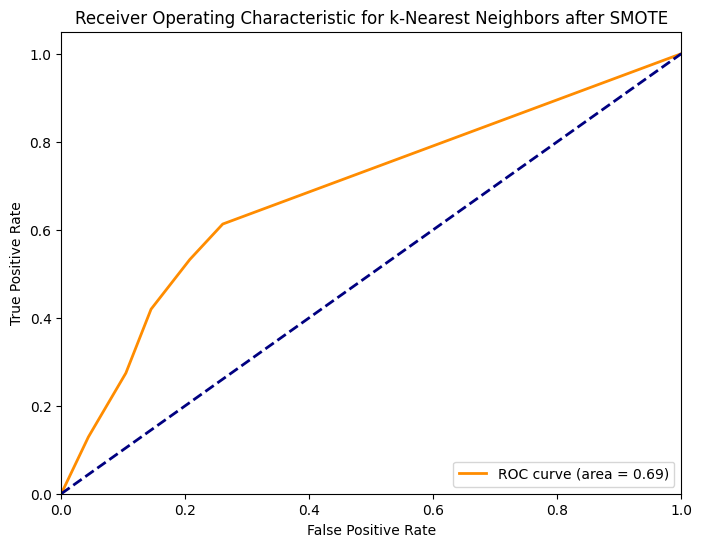

Confusion Matrix:
 [[821 139]
 [ 36  26]]


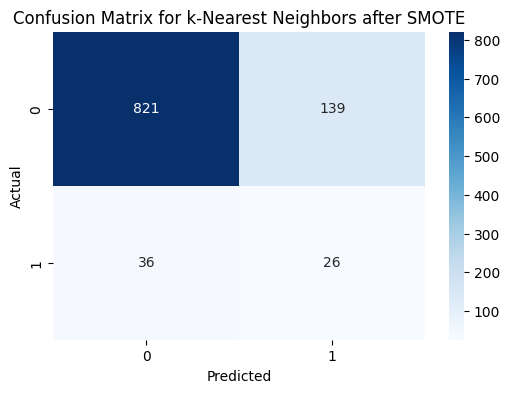


Model: Decision Tree after SMOTE
Accuracy: 0.8688845401174168
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.15      0.26      0.19        62

    accuracy                           0.87      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.90      0.87      0.88      1022

ROC AUC Score: 0.5831989247311828


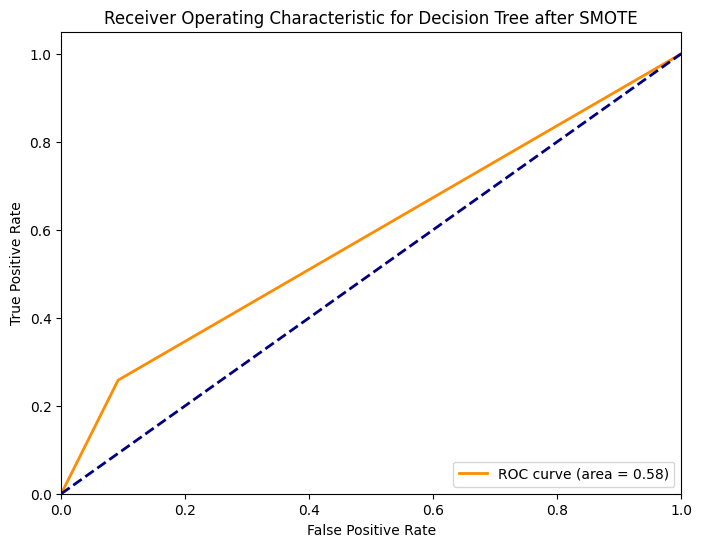

Confusion Matrix:
 [[872  88]
 [ 46  16]]


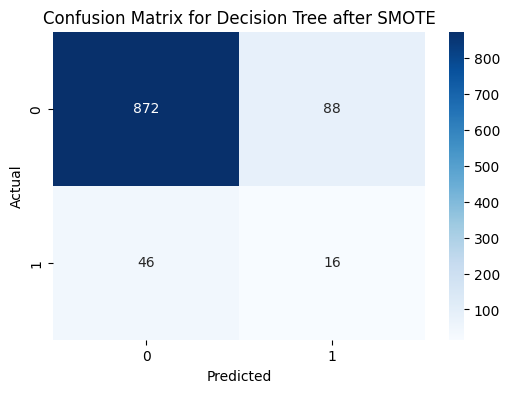


Model: Naive Bayes after SMOTE
Accuracy: 0.7270058708414873
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       960
           1       0.15      0.74      0.25        62

    accuracy                           0.73      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score: 0.8304939516129033


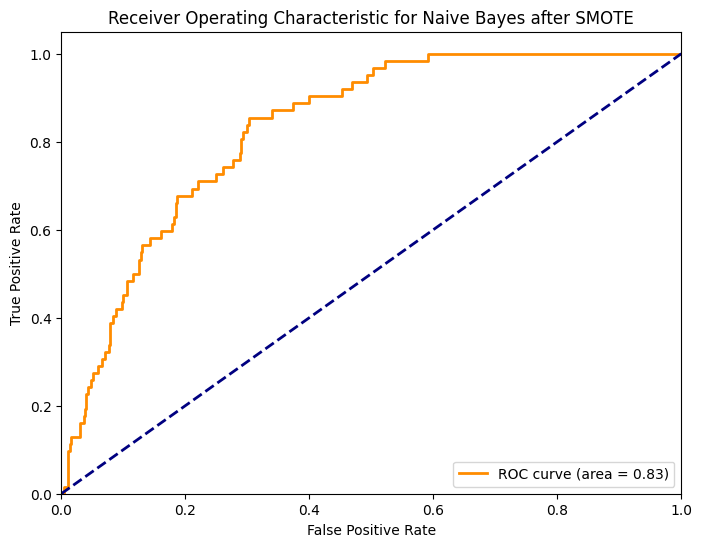

Confusion Matrix:
 [[697 263]
 [ 16  46]]


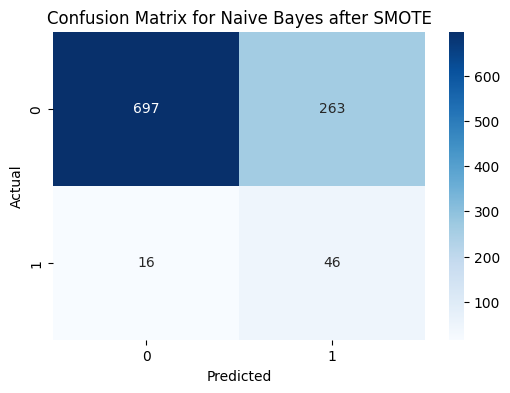


Model: Linear Discriminant Analysis after SMOTE
Accuracy: 0.7426614481409002
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.76      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.74      0.81      1022

ROC AUC Score: 0.8478998655913978


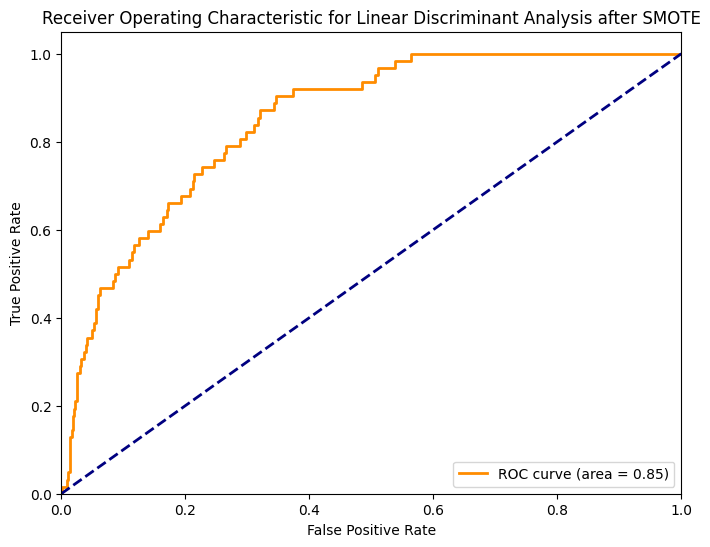

Confusion Matrix:
 [[712 248]
 [ 15  47]]


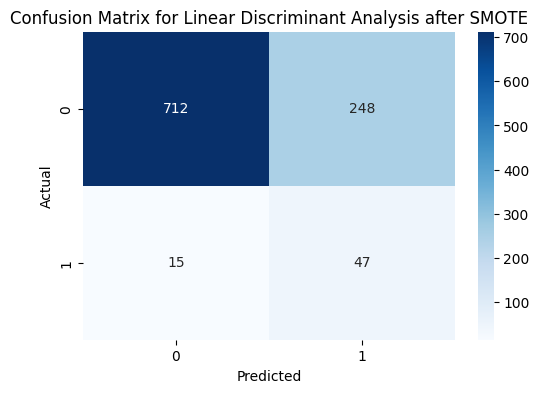


Model: Quadratic Discriminant Analysis after SMOTE
Accuracy: 0.7465753424657534
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.85       960
           1       0.17      0.82      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.94      0.75      0.81      1022

ROC AUC Score: 0.8394321236559139


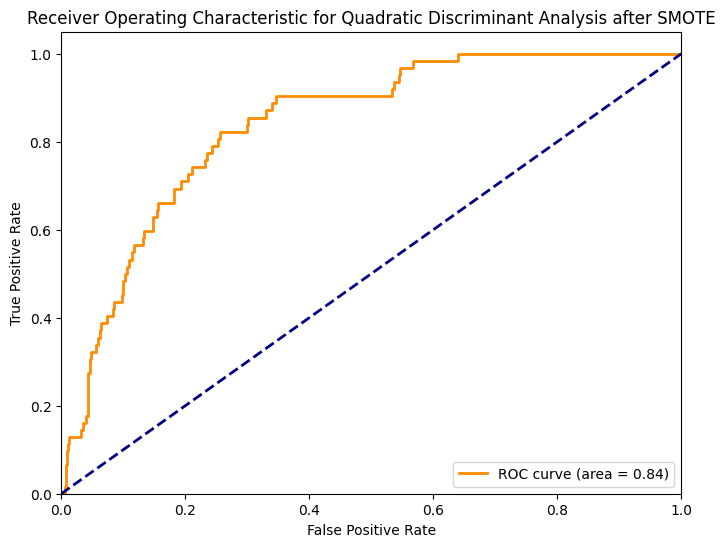

Confusion Matrix:
 [[712 248]
 [ 11  51]]


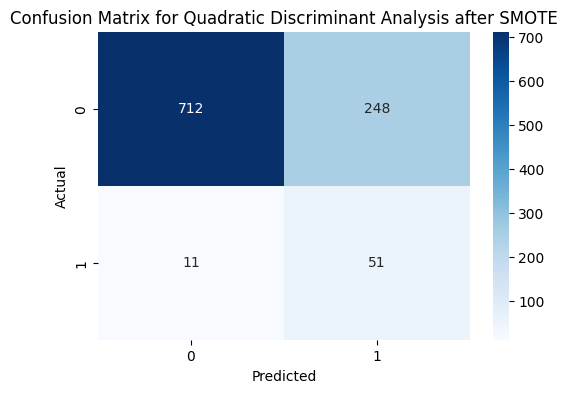


Model: Extra Trees after SMOTE
Accuracy: 0.9119373776908023
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.15      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.89      0.91      0.90      1022

ROC AUC Score: 0.7841229838709678


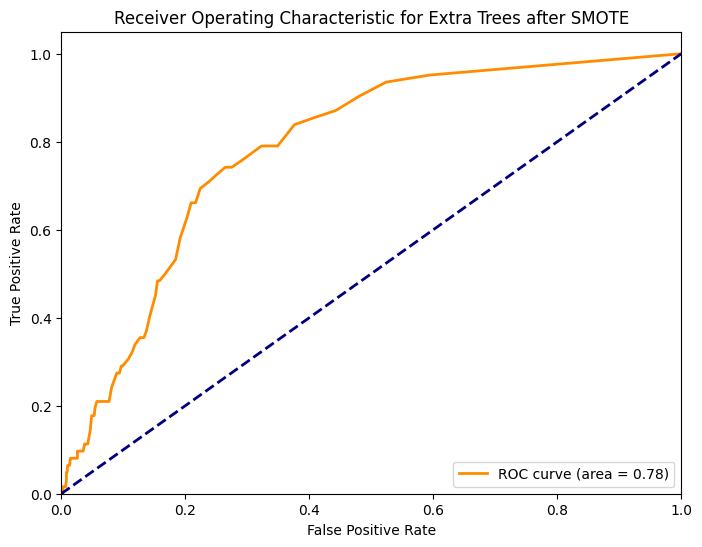

Confusion Matrix:
 [[926  34]
 [ 56   6]]


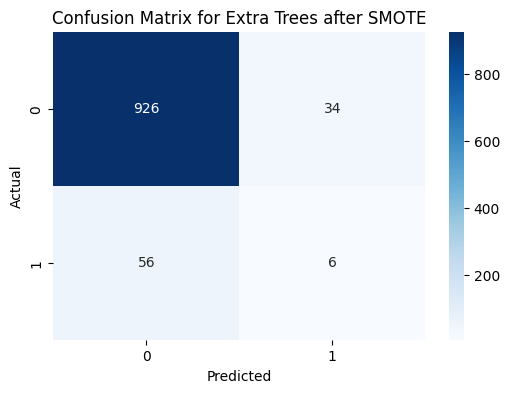


Applying ADASYN

Model: Logistic Regression after ADASYN
Accuracy: 0.7563600782778865
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.76      0.27        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.76      0.82      1022

ROC AUC Score: 0.8485047043010752


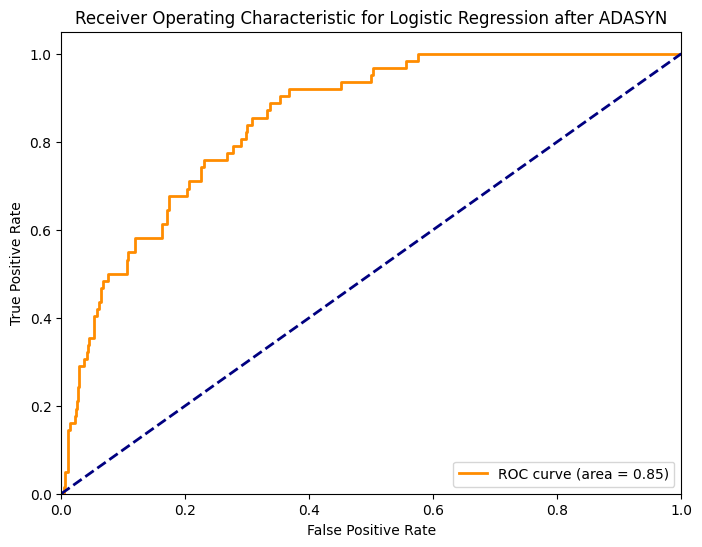

Confusion Matrix:
 [[726 234]
 [ 15  47]]


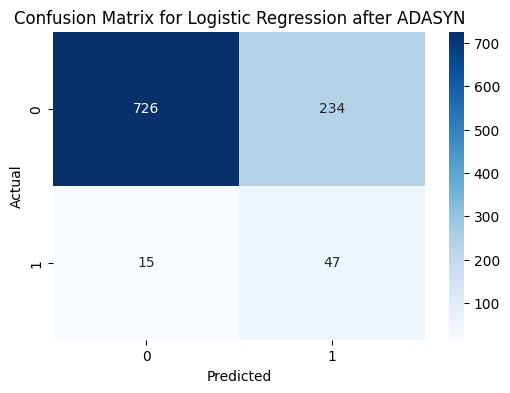


Model: Random Forest after ADASYN
Accuracy: 0.9158512720156555
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.17      0.10      0.12        62

    accuracy                           0.92      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.80390625


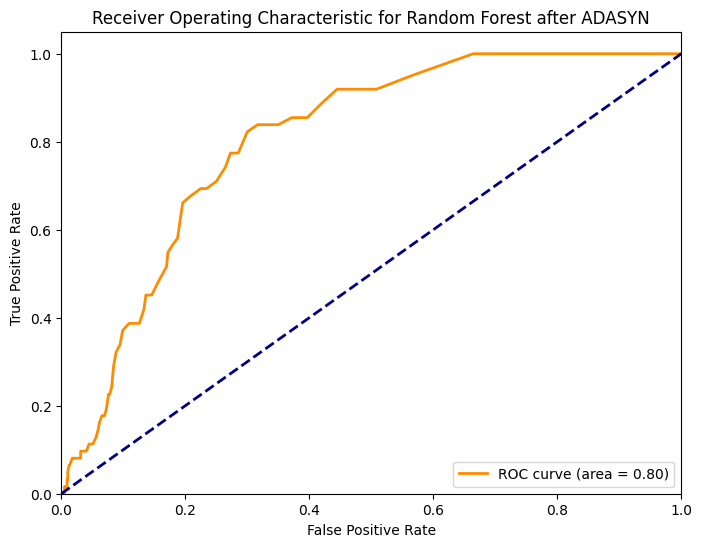

Confusion Matrix:
 [[930  30]
 [ 56   6]]


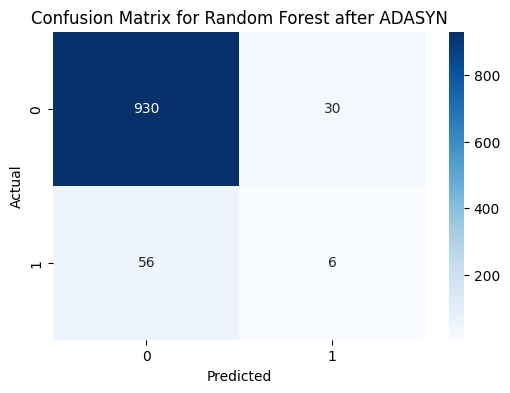


Model: Support Vector Machine after ADASYN
Accuracy: 0.7759295499021527
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.52      0.22        62

    accuracy                           0.78      1022
   macro avg       0.55      0.65      0.54      1022
weighted avg       0.91      0.78      0.83      1022

ROC AUC Score: 0.763054435483871


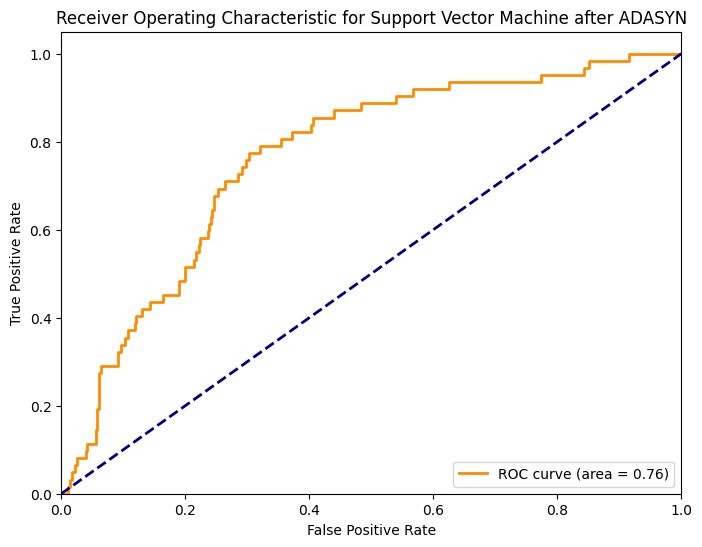

Confusion Matrix:
 [[761 199]
 [ 30  32]]


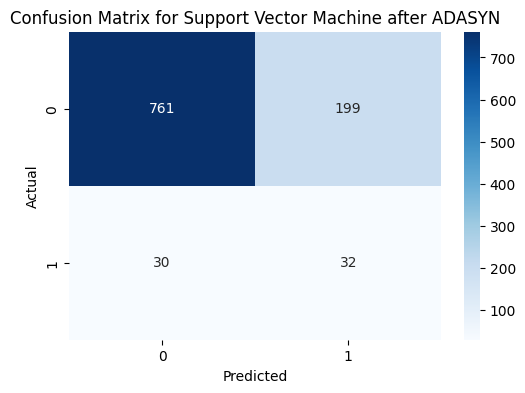


Model: Gradient Boosting after ADASYN
Accuracy: 0.8698630136986302
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.19      0.35      0.25        62

    accuracy                           0.87      1022
   macro avg       0.57      0.63      0.59      1022
weighted avg       0.91      0.87      0.89      1022

ROC AUC Score: 0.8179519489247311


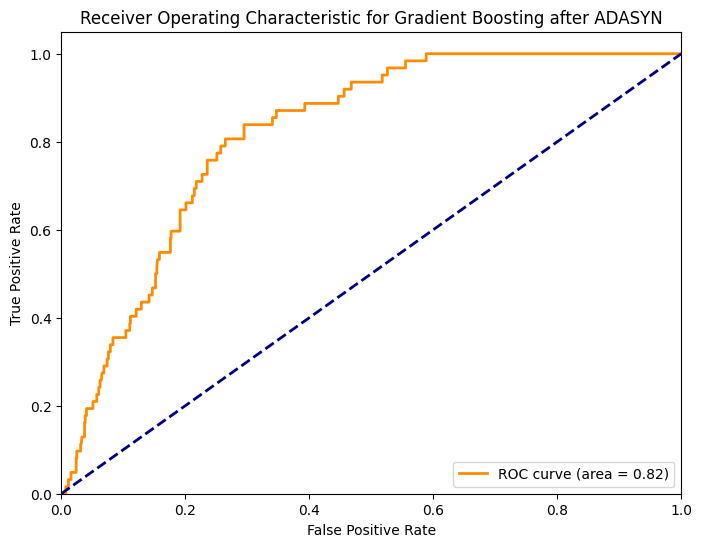

Confusion Matrix:
 [[867  93]
 [ 40  22]]


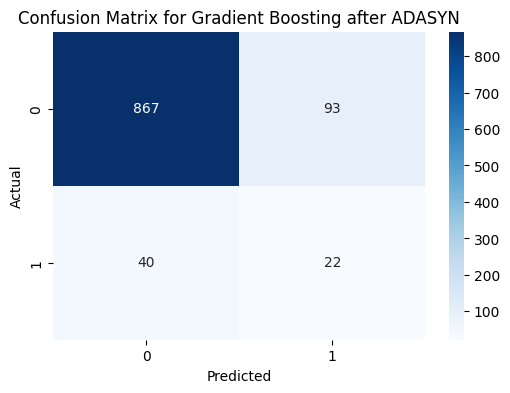


Model: AdaBoost after ADASYN
Accuracy: 0.8268101761252447
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       960
           1       0.19      0.56      0.28        62

    accuracy                           0.83      1022
   macro avg       0.58      0.70      0.59      1022
weighted avg       0.92      0.83      0.86      1022

ROC AUC Score: 0.8155577956989247


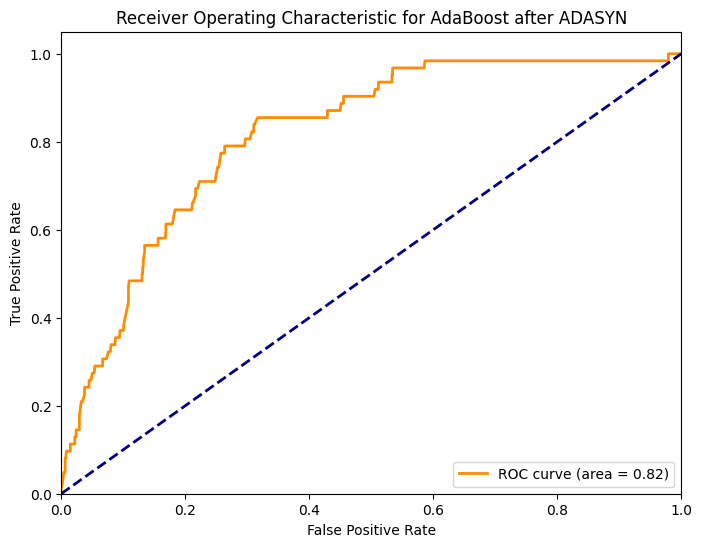

Confusion Matrix:
 [[810 150]
 [ 27  35]]


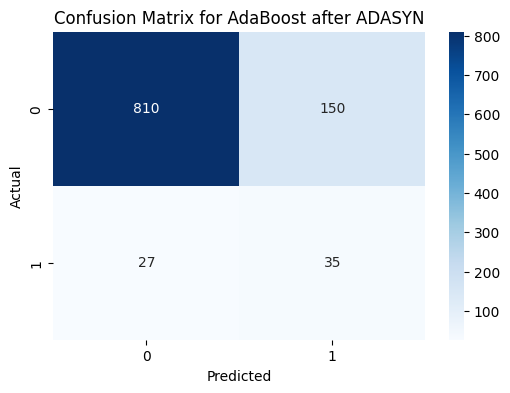


Model: k-Nearest Neighbors after ADASYN
Accuracy: 0.8170254403131115
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       960
           1       0.14      0.40      0.21        62

    accuracy                           0.82      1022
   macro avg       0.55      0.62      0.55      1022
weighted avg       0.91      0.82      0.85      1022

ROC AUC Score: 0.677797379032258


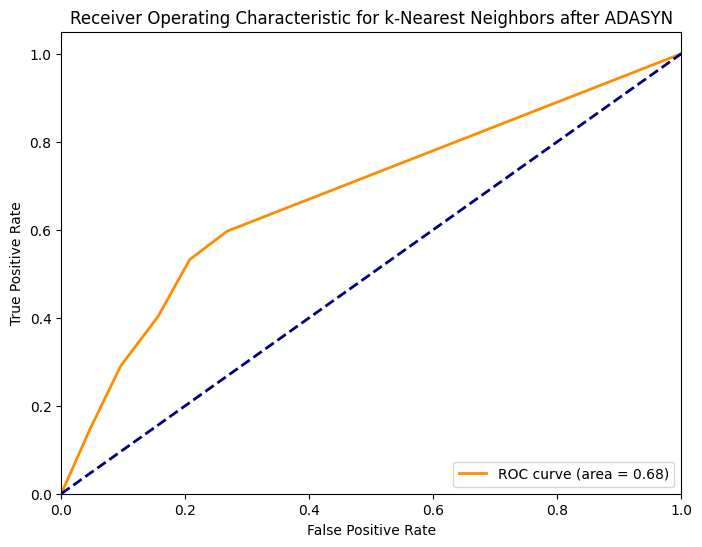

Confusion Matrix:
 [[810 150]
 [ 37  25]]


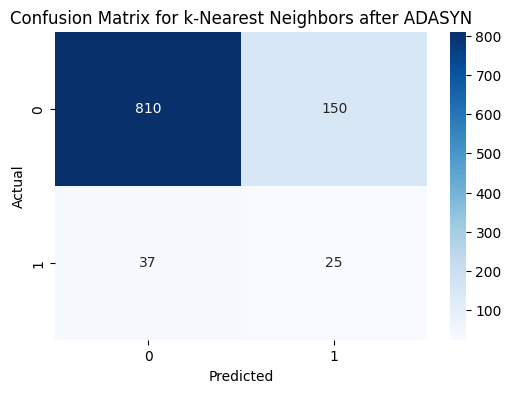


Model: Decision Tree after ADASYN
Accuracy: 0.8532289628180039
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.11      0.21      0.15        62

    accuracy                           0.85      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.90      0.85      0.87      1022

ROC AUC Score: 0.5522345430107527


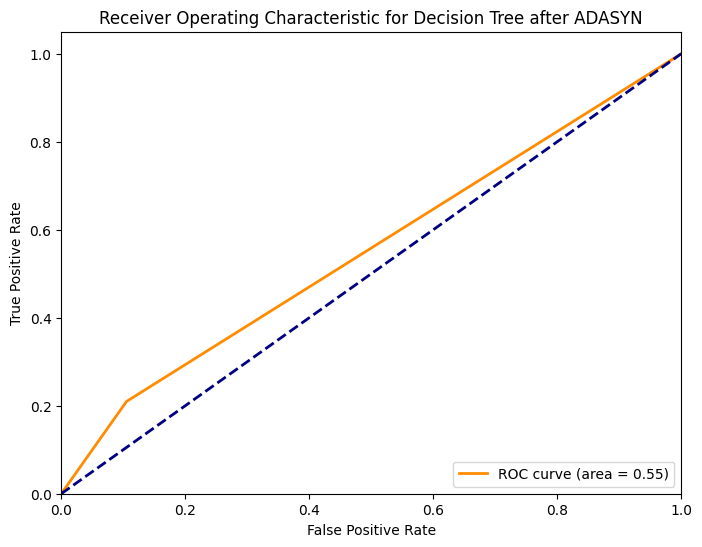

Confusion Matrix:
 [[859 101]
 [ 49  13]]


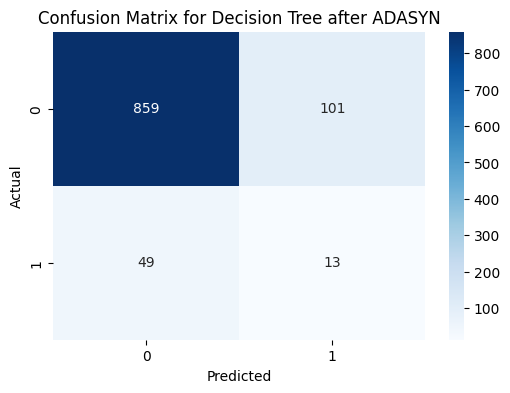


Model: Naive Bayes after ADASYN
Accuracy: 0.7113502935420744
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82       960
           1       0.14      0.76      0.24        62

    accuracy                           0.71      1022
   macro avg       0.56      0.73      0.53      1022
weighted avg       0.93      0.71      0.79      1022

ROC AUC Score: 0.8276545698924731


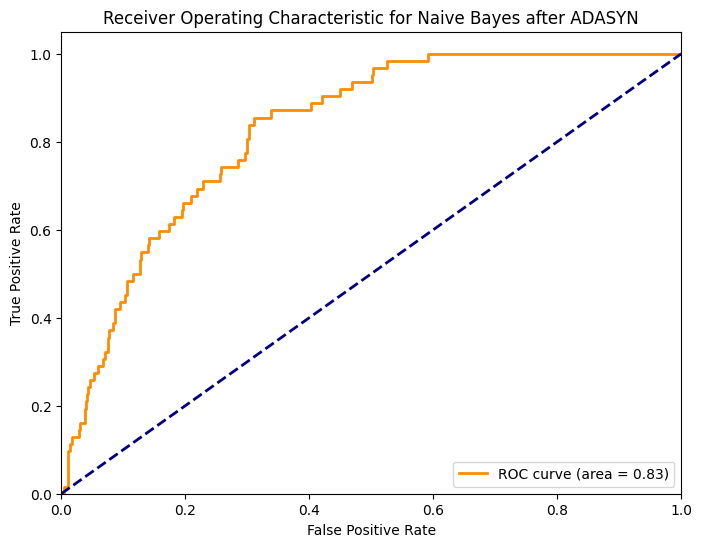

Confusion Matrix:
 [[680 280]
 [ 15  47]]


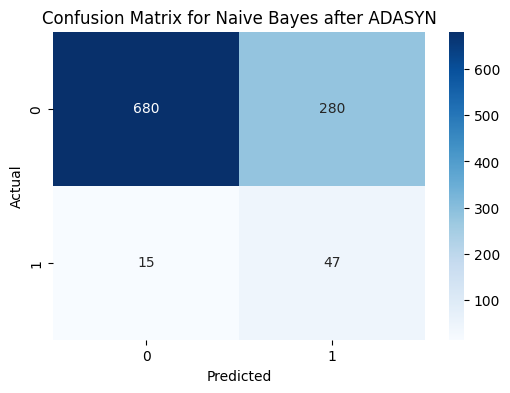


Model: Linear Discriminant Analysis after ADASYN
Accuracy: 0.7377690802348337
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.76      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.74      0.81      1022

ROC AUC Score: 0.8466733870967742


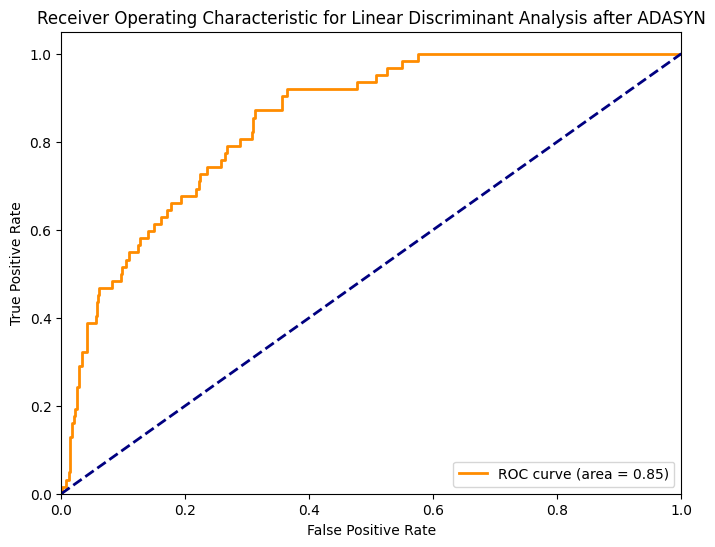

Confusion Matrix:
 [[707 253]
 [ 15  47]]


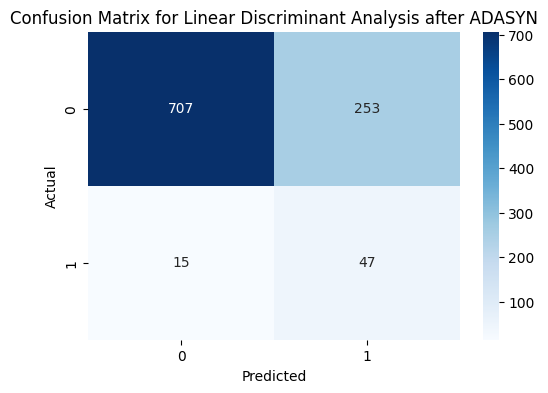


Model: Quadratic Discriminant Analysis after ADASYN
Accuracy: 0.7348336594911937
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.82      0.27        62

    accuracy                           0.73      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score: 0.8376176075268817


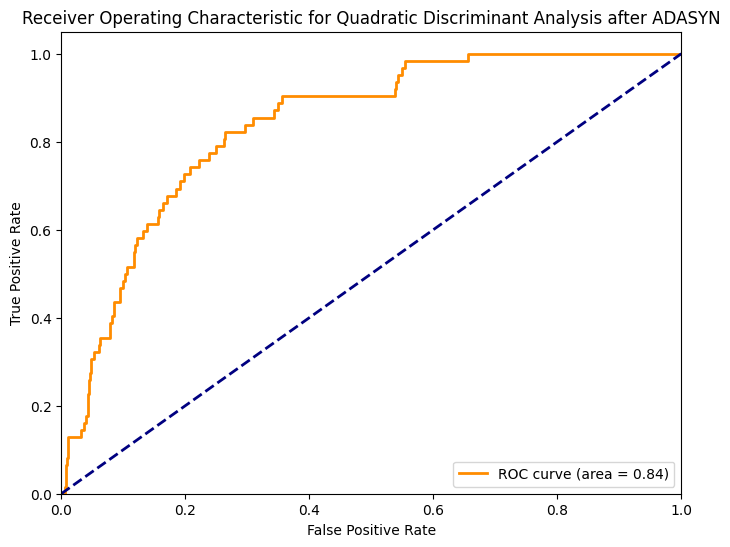

Confusion Matrix:
 [[700 260]
 [ 11  51]]


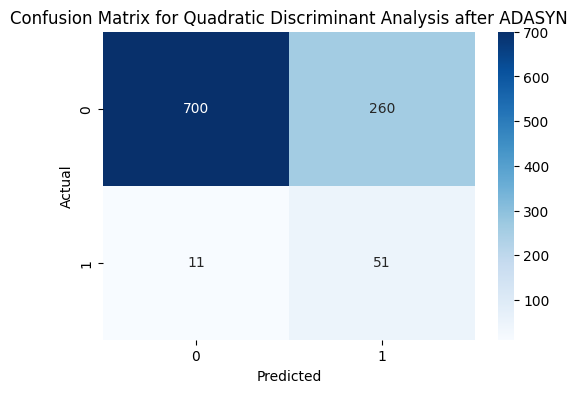


Model: Extra Trees after ADASYN
Accuracy: 0.913894324853229
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.14      0.08      0.10        62

    accuracy                           0.91      1022
   macro avg       0.54      0.52      0.53      1022
weighted avg       0.89      0.91      0.90      1022

ROC AUC Score: 0.7870295698924732


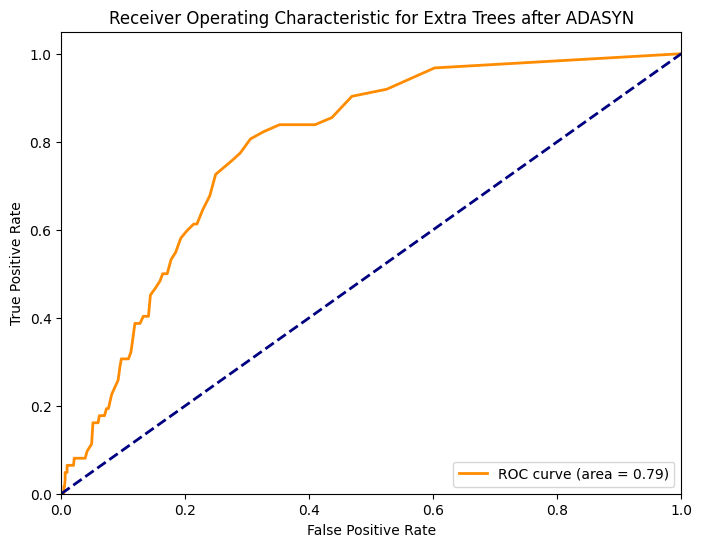

Confusion Matrix:
 [[929  31]
 [ 57   5]]


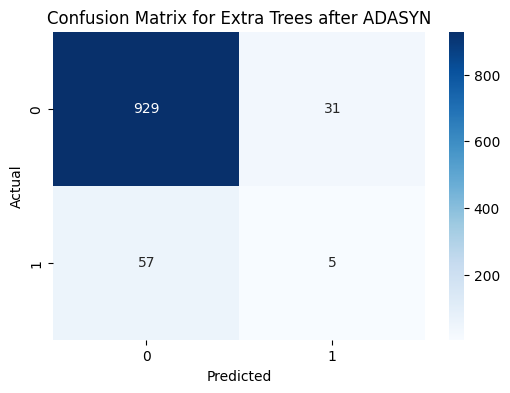


Applying Borderline-SMOTE

Model: Logistic Regression after Borderline-SMOTE
Accuracy: 0.7984344422700587
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       960
           1       0.19      0.73      0.30        62

    accuracy                           0.80      1022
   macro avg       0.59      0.76      0.59      1022
weighted avg       0.93      0.80      0.85      1022

ROC AUC Score: 0.8539986559139785


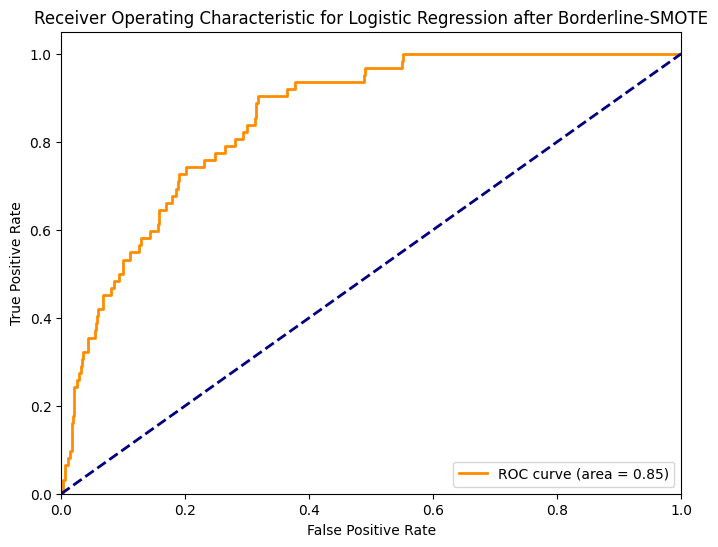

Confusion Matrix:
 [[771 189]
 [ 17  45]]


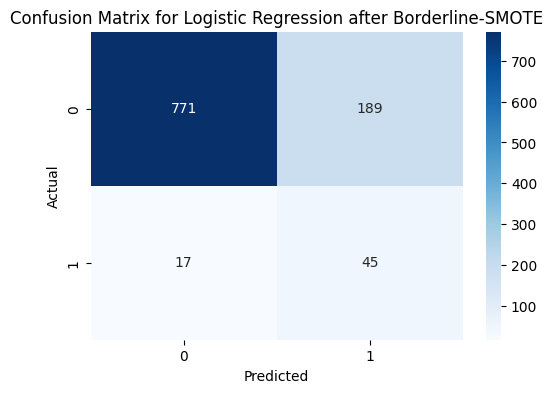


Model: Random Forest after Borderline-SMOTE
Accuracy: 0.9197651663405088
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.22      0.13      0.16        62

    accuracy                           0.92      1022
   macro avg       0.58      0.55      0.56      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.8111895161290323


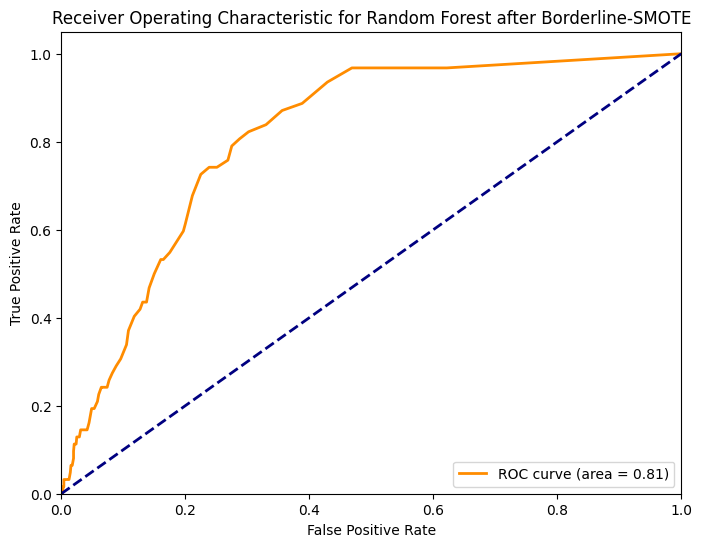

Confusion Matrix:
 [[932  28]
 [ 54   8]]


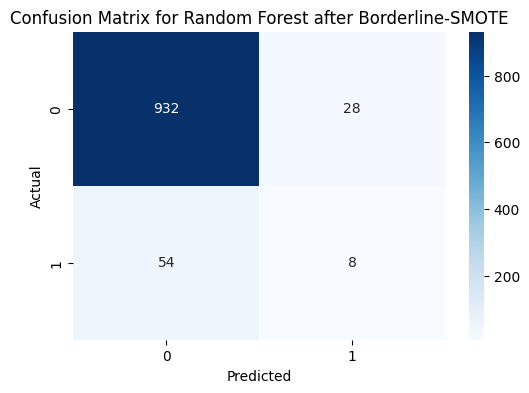


Model: Support Vector Machine after Borderline-SMOTE
Accuracy: 0.8346379647749511
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       960
           1       0.18      0.50      0.27        62

    accuracy                           0.83      1022
   macro avg       0.57      0.68      0.59      1022
weighted avg       0.92      0.83      0.87      1022

ROC AUC Score: 0.7941784274193548


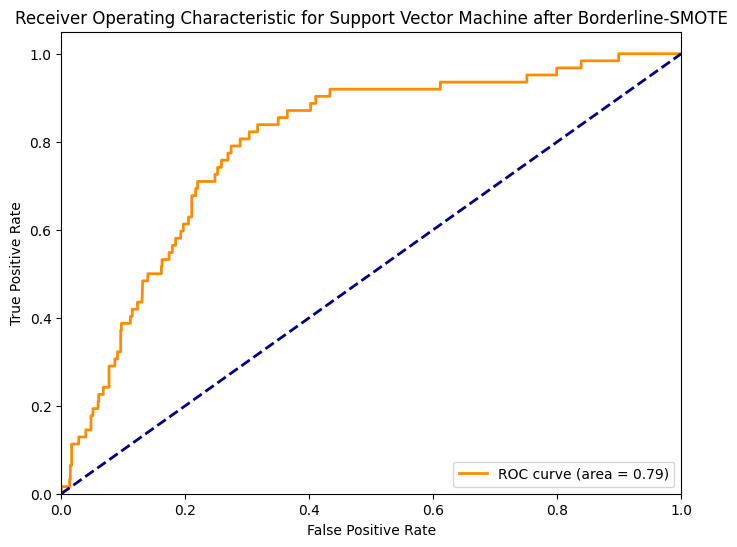

Confusion Matrix:
 [[822 138]
 [ 31  31]]


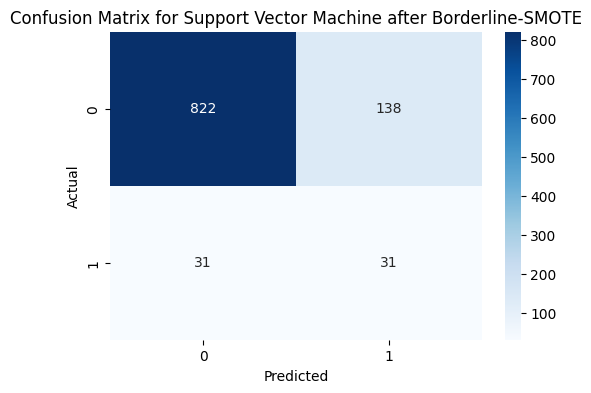


Model: Gradient Boosting after Borderline-SMOTE
Accuracy: 0.860078277886497
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.17      0.32      0.22        62

    accuracy                           0.86      1022
   macro avg       0.56      0.61      0.57      1022
weighted avg       0.91      0.86      0.88      1022

ROC AUC Score: 0.8304351478494625


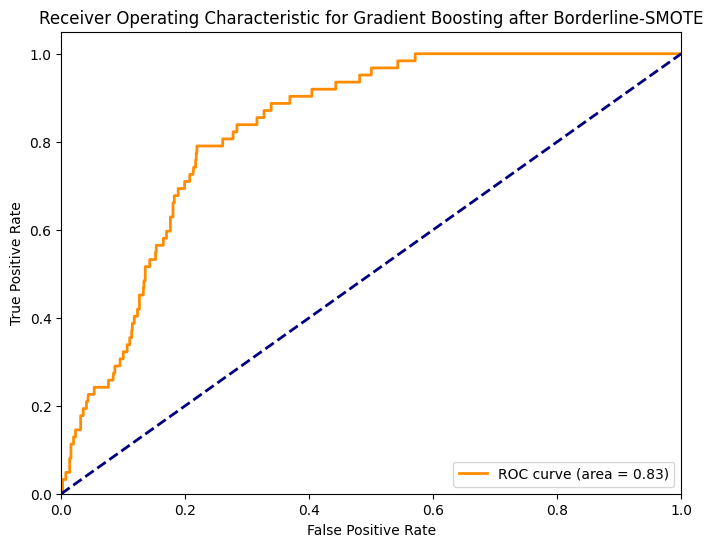

Confusion Matrix:
 [[859 101]
 [ 42  20]]


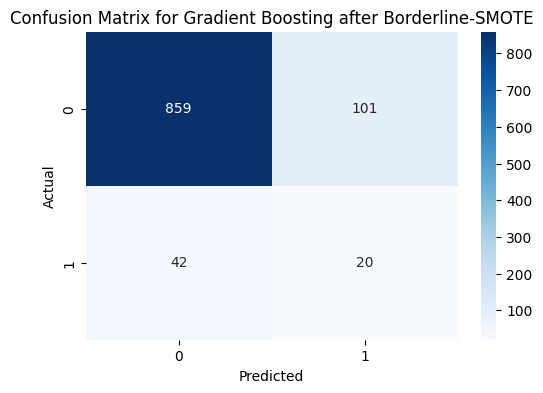


Model: AdaBoost after Borderline-SMOTE
Accuracy: 0.8405088062622309
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       960
           1       0.20      0.55      0.29        62

    accuracy                           0.84      1022
   macro avg       0.58      0.70      0.60      1022
weighted avg       0.92      0.84      0.87      1022

ROC AUC Score: 0.8294858870967741


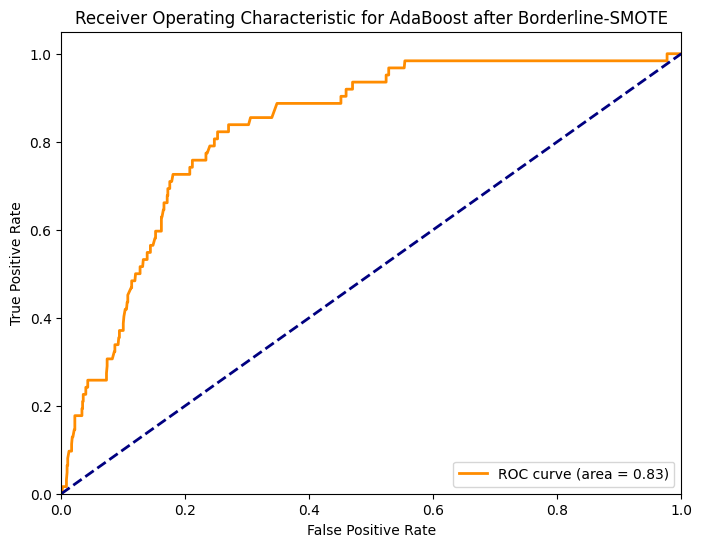

Confusion Matrix:
 [[825 135]
 [ 28  34]]


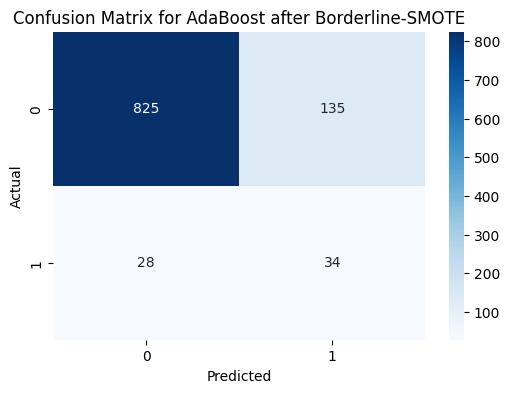


Model: k-Nearest Neighbors after Borderline-SMOTE
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.18      0.37      0.24        62

    accuracy                           0.86      1022
   macro avg       0.57      0.63      0.58      1022
weighted avg       0.91      0.86      0.88      1022

ROC AUC Score: 0.6901377688172043


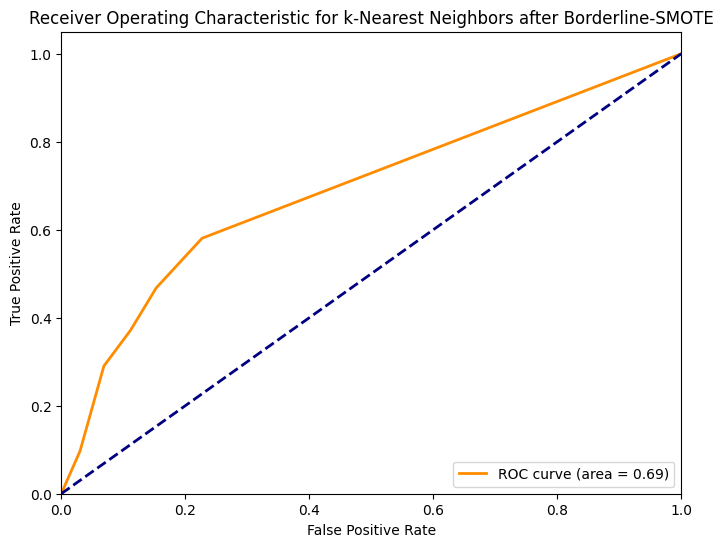

Confusion Matrix:
 [[853 107]
 [ 39  23]]


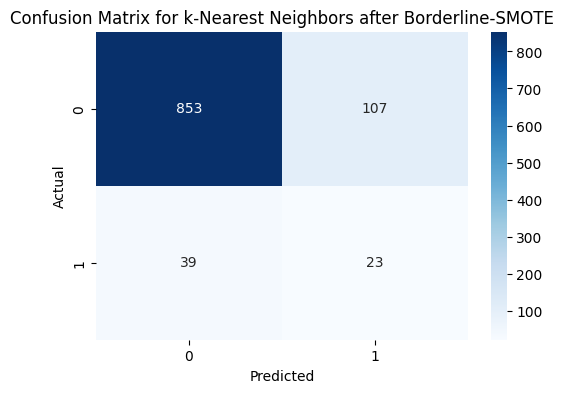


Model: Decision Tree after Borderline-SMOTE
Accuracy: 0.8864970645792564
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       960
           1       0.21      0.32      0.26        62

    accuracy                           0.89      1022
   macro avg       0.58      0.62      0.60      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC Score: 0.6227486559139784


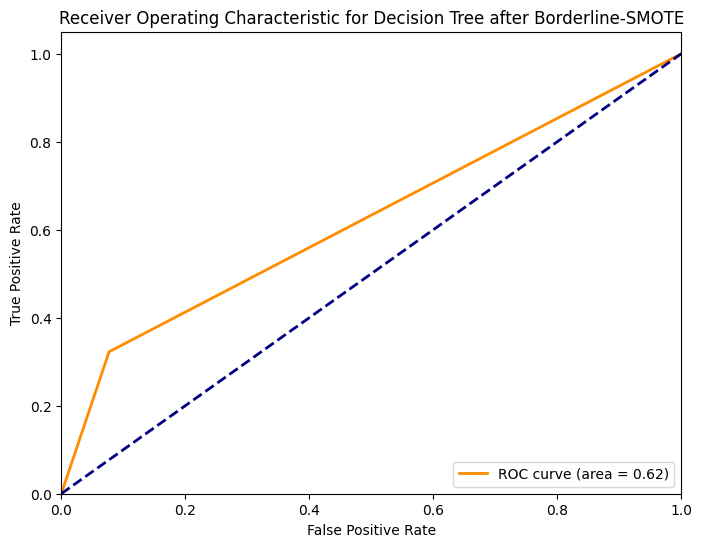

Confusion Matrix:
 [[886  74]
 [ 42  20]]


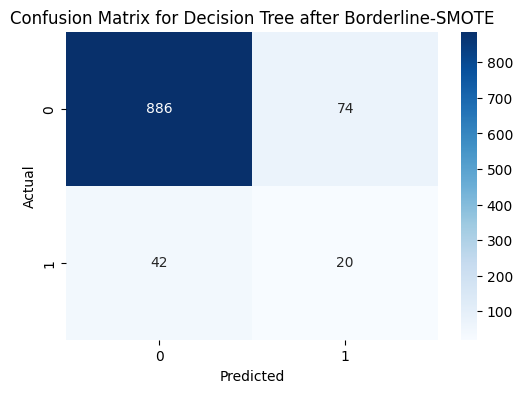


Model: Naive Bayes after Borderline-SMOTE
Accuracy: 0.7671232876712328
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       960
           1       0.17      0.71      0.27        62

    accuracy                           0.77      1022
   macro avg       0.57      0.74      0.57      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC Score: 0.836206317204301


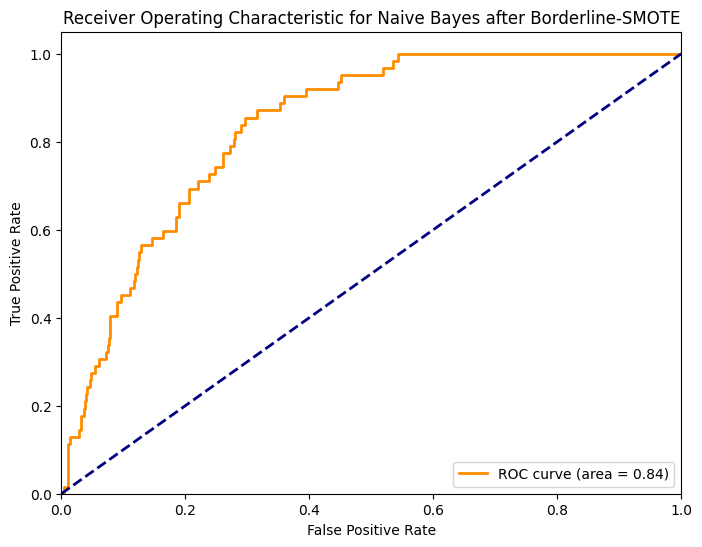

Confusion Matrix:
 [[740 220]
 [ 18  44]]


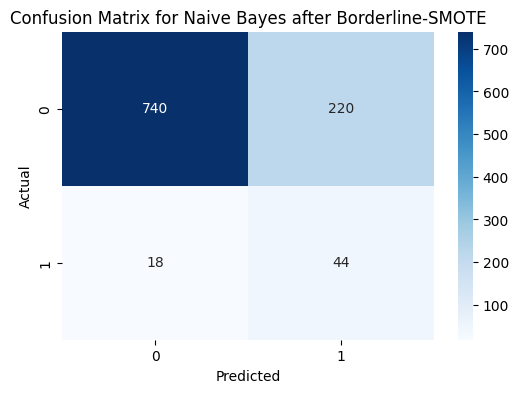


Model: Linear Discriminant Analysis after Borderline-SMOTE
Accuracy: 0.7671232876712328
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       960
           1       0.17      0.74      0.28        62

    accuracy                           0.77      1022
   macro avg       0.58      0.76      0.57      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC Score: 0.8511088709677419


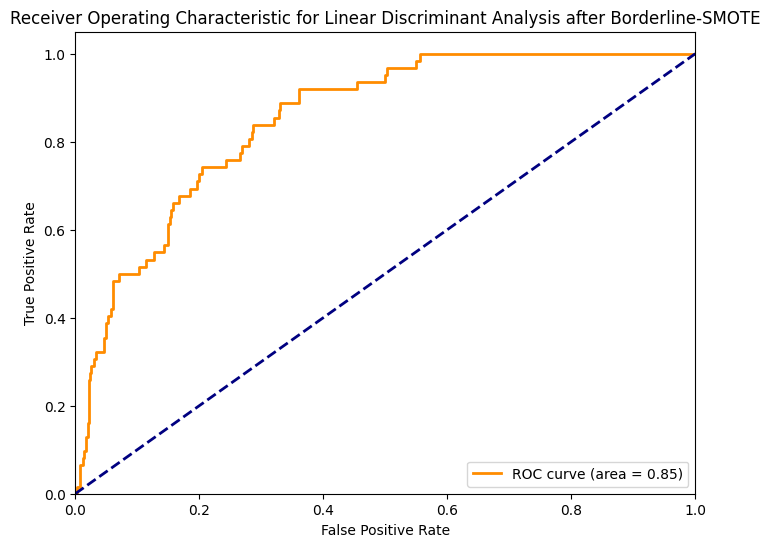

Confusion Matrix:
 [[738 222]
 [ 16  46]]


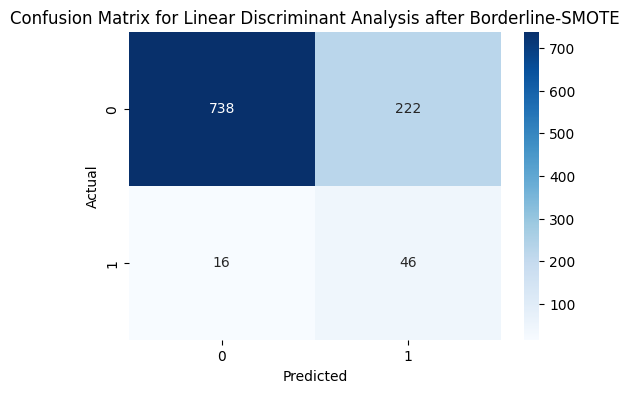


Model: Quadratic Discriminant Analysis after Borderline-SMOTE
Accuracy: 0.7837573385518591
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.18      0.73      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.76      0.58      1022
weighted avg       0.93      0.78      0.84      1022

ROC AUC Score: 0.8454805107526882


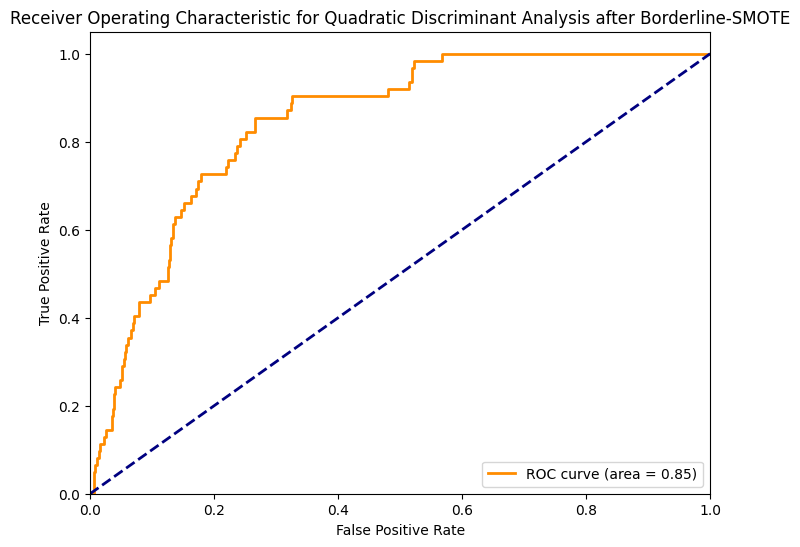

Confusion Matrix:
 [[756 204]
 [ 17  45]]


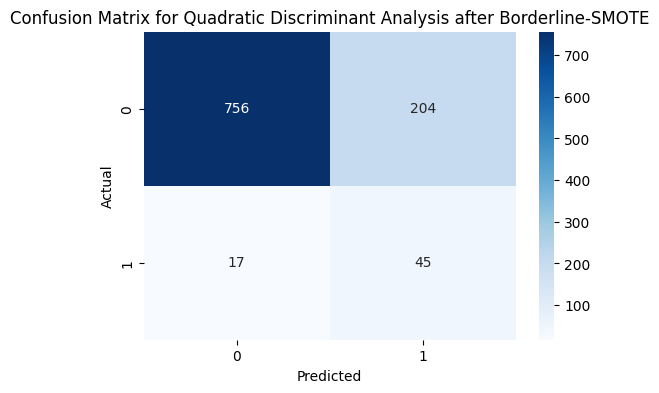


Model: Extra Trees after Borderline-SMOTE
Accuracy: 0.9187866927592955
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.18      0.10      0.13        62

    accuracy                           0.92      1022
   macro avg       0.56      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.7849630376344086


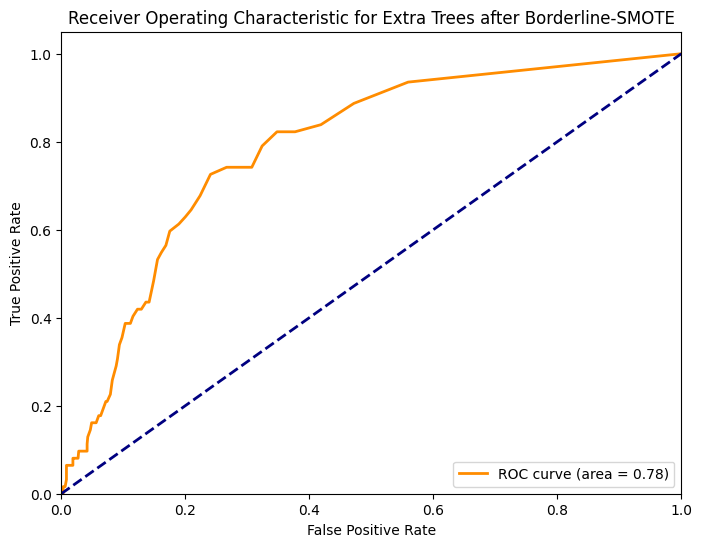

Confusion Matrix:
 [[933  27]
 [ 56   6]]


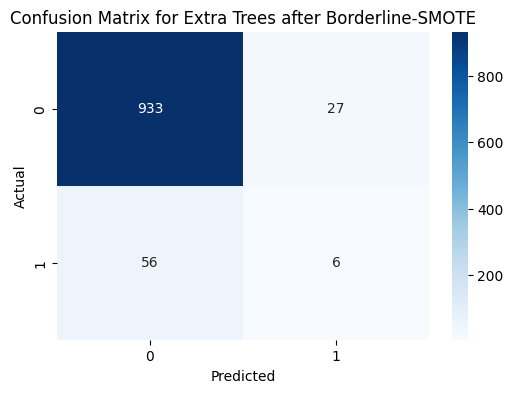


Applying SVMSMOTE

Model: Logistic Regression after SVMSMOTE
Accuracy: 0.8639921722113503
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       960
           1       0.24      0.56      0.33        62

    accuracy                           0.86      1022
   macro avg       0.60      0.72      0.63      1022
weighted avg       0.92      0.86      0.89      1022

ROC AUC Score: 0.8539482526881721


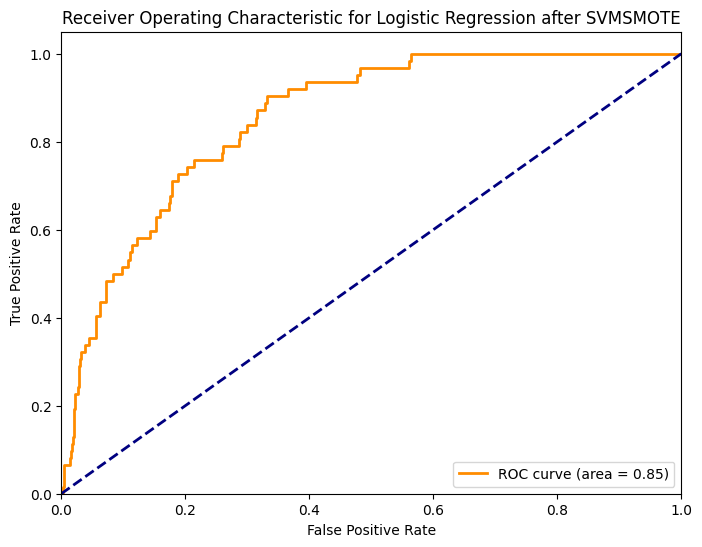

Confusion Matrix:
 [[848 112]
 [ 27  35]]


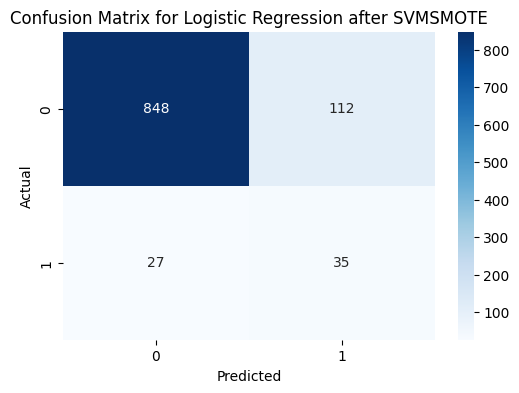


Model: Random Forest after SVMSMOTE
Accuracy: 0.9275929549902152
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.23      0.08      0.12        62

    accuracy                           0.93      1022
   macro avg       0.59      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022

ROC AUC Score: 0.8158938172043011


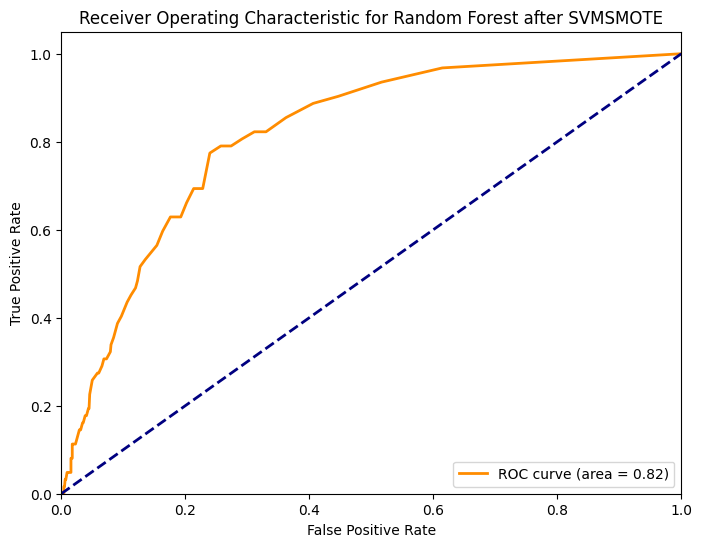

Confusion Matrix:
 [[943  17]
 [ 57   5]]


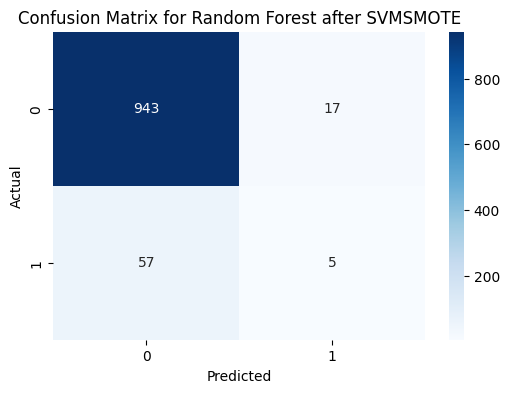


Model: Support Vector Machine after SVMSMOTE
Accuracy: 0.8747553816046967
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.18      0.31      0.23        62

    accuracy                           0.87      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.91      0.87      0.89      1022

ROC AUC Score: 0.7869287634408602


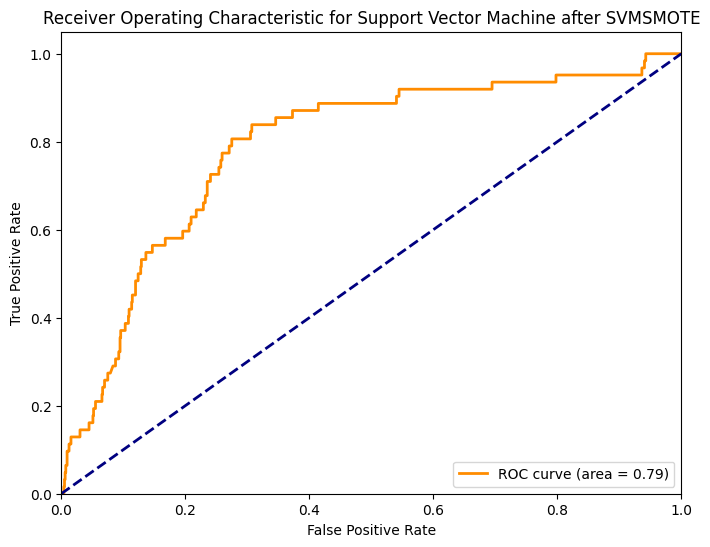

Confusion Matrix:
 [[875  85]
 [ 43  19]]


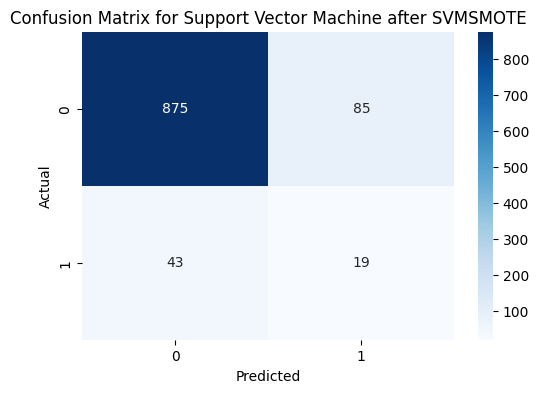


Model: Gradient Boosting after SVMSMOTE
Accuracy: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       960
           1       0.28      0.23      0.25        62

    accuracy                           0.92      1022
   macro avg       0.62      0.59      0.60      1022
weighted avg       0.91      0.92      0.91      1022

ROC AUC Score: 0.8362987231182796


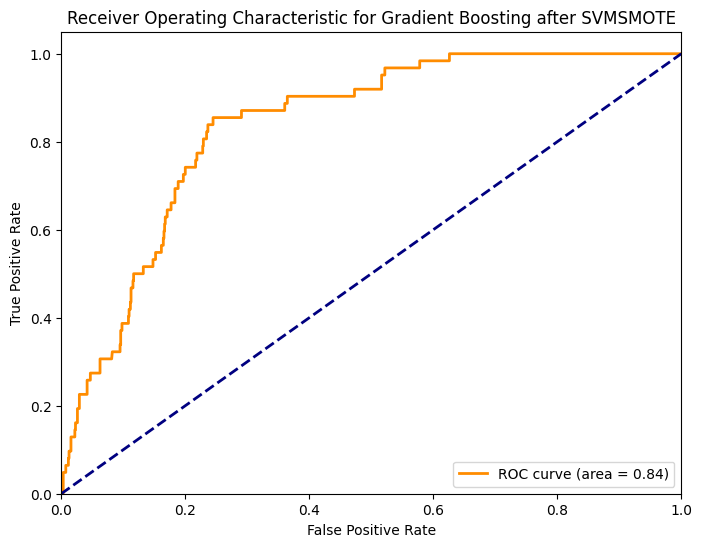

Confusion Matrix:
 [[924  36]
 [ 48  14]]


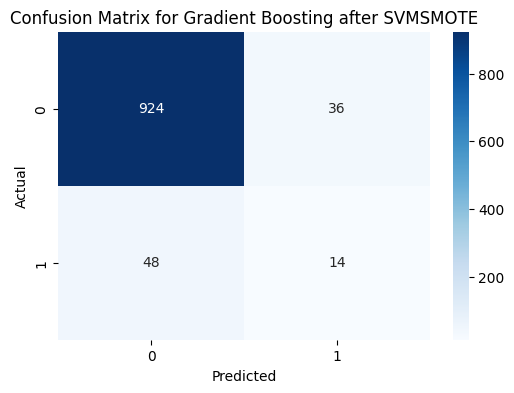


Model: AdaBoost after SVMSMOTE
Accuracy: 0.8884540117416829
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.20      0.29      0.24        62

    accuracy                           0.89      1022
   macro avg       0.58      0.61      0.59      1022
weighted avg       0.91      0.89      0.90      1022

ROC AUC Score: 0.8320060483870968


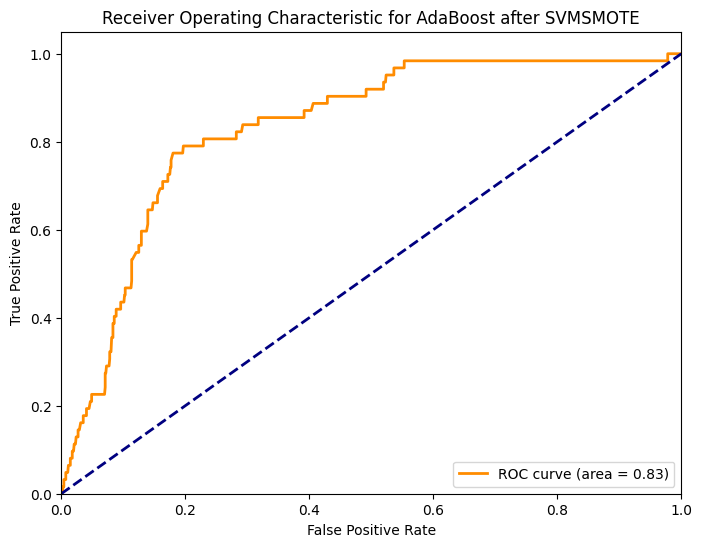

Confusion Matrix:
 [[890  70]
 [ 44  18]]


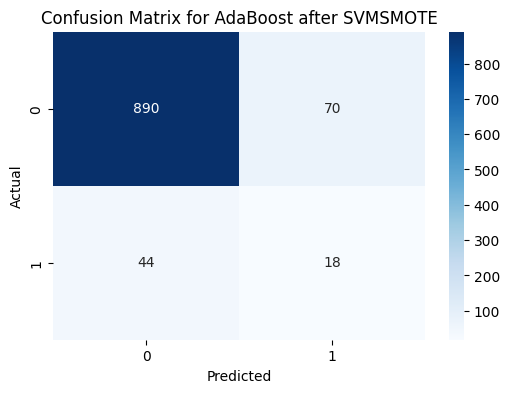


Model: k-Nearest Neighbors after SVMSMOTE
Accuracy: 0.8708414872798435
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.18      0.31      0.22        62

    accuracy                           0.87      1022
   macro avg       0.56      0.61      0.58      1022
weighted avg       0.91      0.87      0.89      1022

ROC AUC Score: 0.6929351478494623


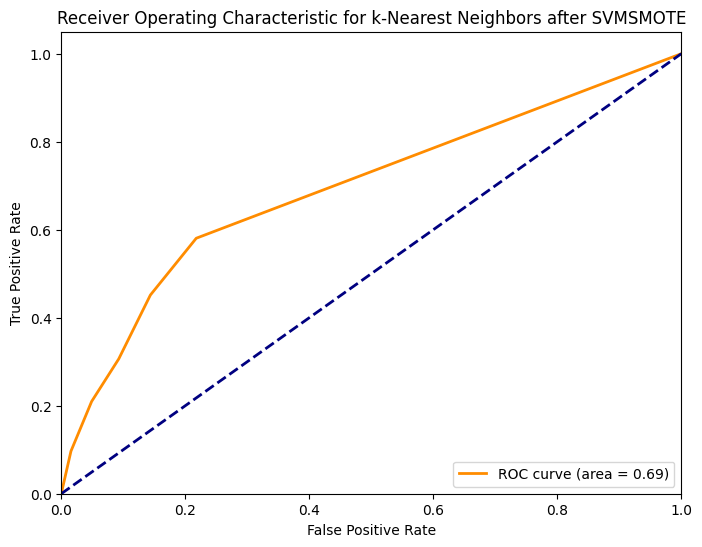

Confusion Matrix:
 [[871  89]
 [ 43  19]]


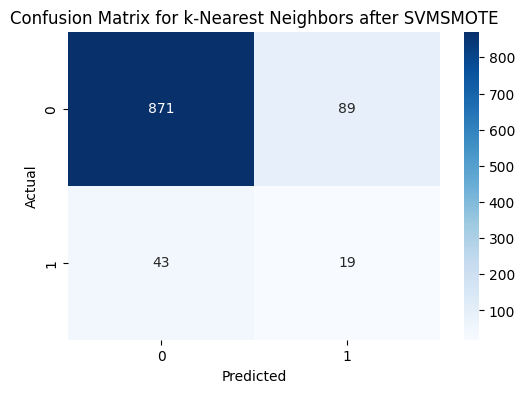


Model: Decision Tree after SVMSMOTE
Accuracy: 0.87573385518591
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.14      0.21      0.17        62

    accuracy                           0.88      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.90      0.88      0.89      1022

ROC AUC Score: 0.5642137096774194


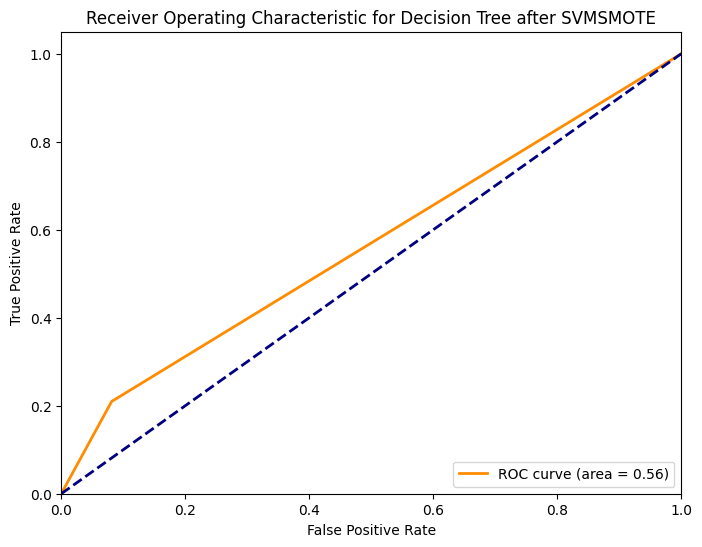

Confusion Matrix:
 [[882  78]
 [ 49  13]]


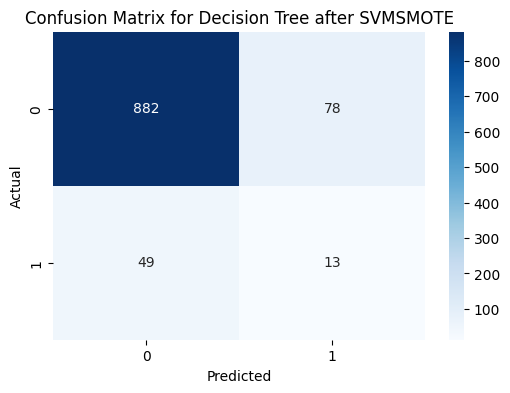


Model: Naive Bayes after SVMSMOTE
Accuracy: 0.8160469667318982
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       960
           1       0.19      0.61      0.29        62

    accuracy                           0.82      1022
   macro avg       0.58      0.72      0.59      1022
weighted avg       0.92      0.82      0.86      1022

ROC AUC Score: 0.835215053763441


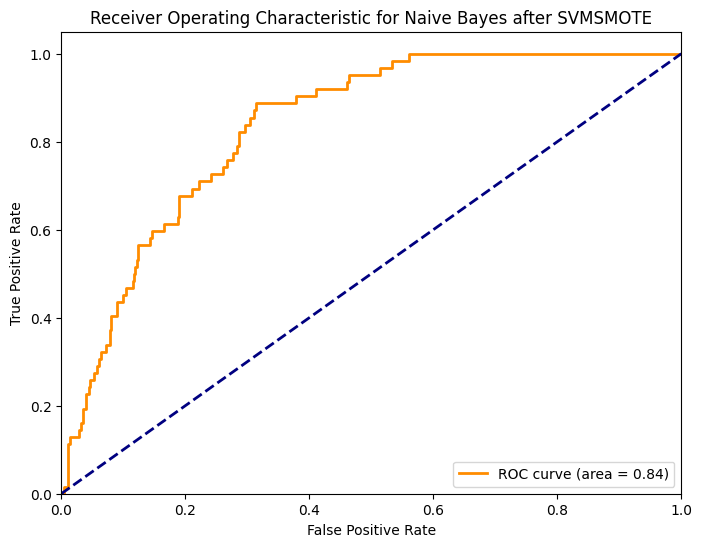

Confusion Matrix:
 [[796 164]
 [ 24  38]]


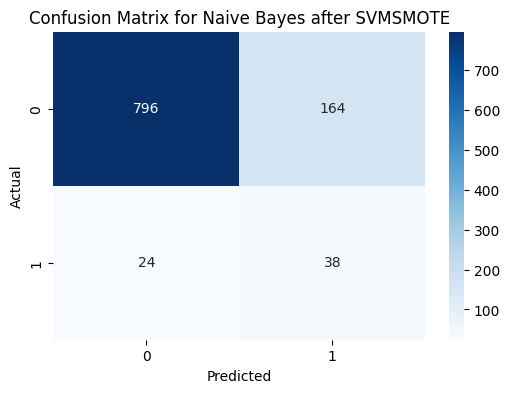


Model: Linear Discriminant Analysis after SVMSMOTE
Accuracy: 0.8610567514677103
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       960
           1       0.23      0.55      0.32        62

    accuracy                           0.86      1022
   macro avg       0.60      0.71      0.62      1022
weighted avg       0.92      0.86      0.89      1022

ROC AUC Score: 0.8478158602150537


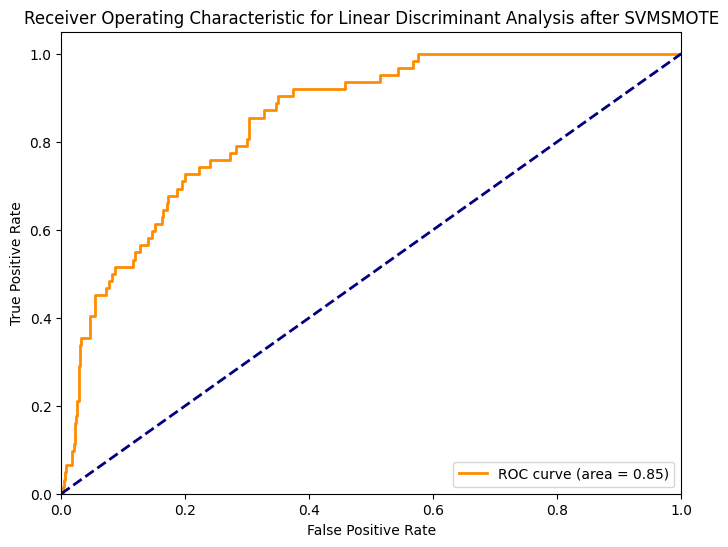

Confusion Matrix:
 [[846 114]
 [ 28  34]]


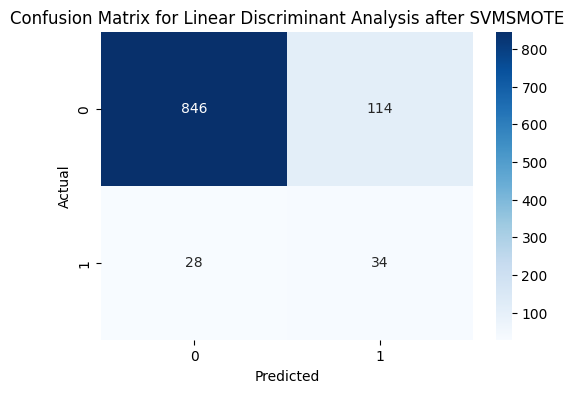


Model: Quadratic Discriminant Analysis after SVMSMOTE
Accuracy: 0.8189823874755382
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       960
           1       0.21      0.69      0.32        62

    accuracy                           0.82      1022
   macro avg       0.59      0.76      0.61      1022
weighted avg       0.93      0.82      0.86      1022

ROC AUC Score: 0.8435147849462366


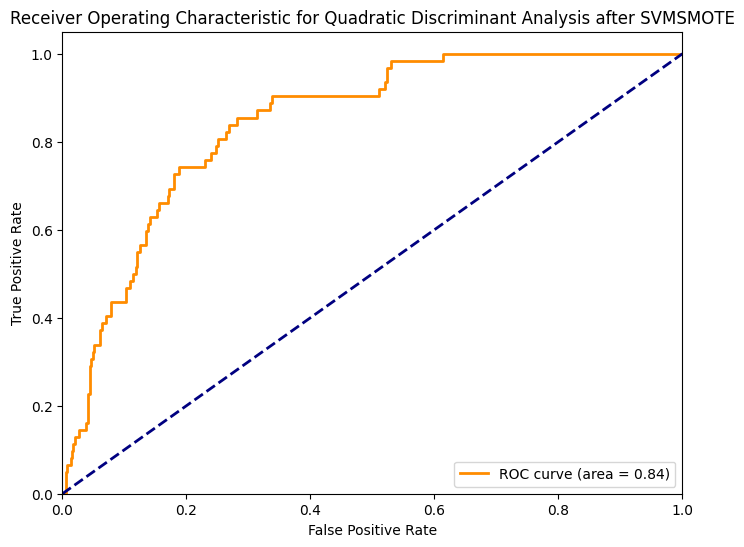

Confusion Matrix:
 [[794 166]
 [ 19  43]]


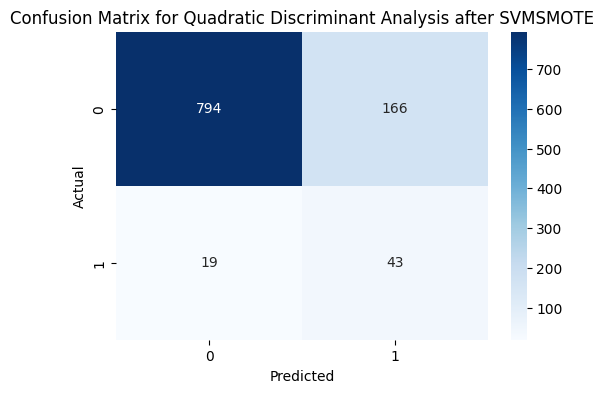


Model: Extra Trees after SVMSMOTE
Accuracy: 0.9227005870841487
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.16      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.55      0.52      0.53      1022
weighted avg       0.89      0.92      0.91      1022

ROC AUC Score: 0.7840389784946237


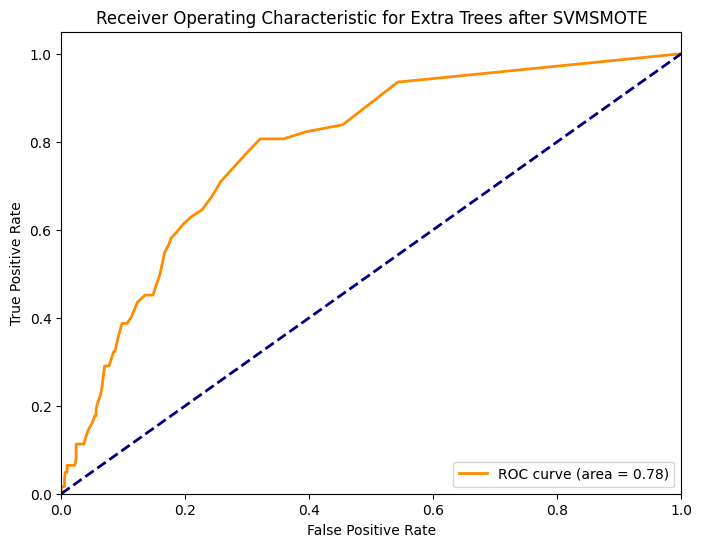

Confusion Matrix:
 [[939  21]
 [ 58   4]]


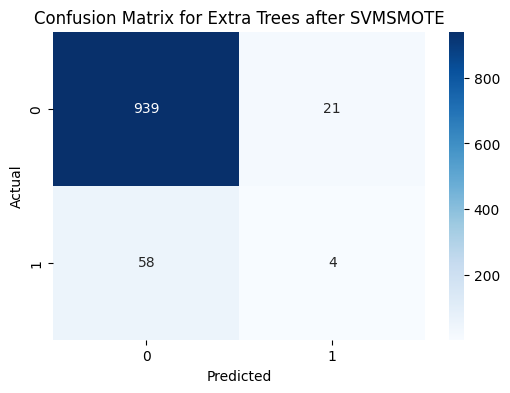


Applying KMeansSMOTE
Skipping KMeansSMOTE due to error: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

Applying SMOTEENN

Model: Logistic Regression after SMOTEENN
Accuracy: 0.7084148727984344
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       960
           1       0.15      0.79      0.25        62

    accuracy                           0.71      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.93      0.71      0.78      1022

ROC AUC Score: 0.8475638440860214


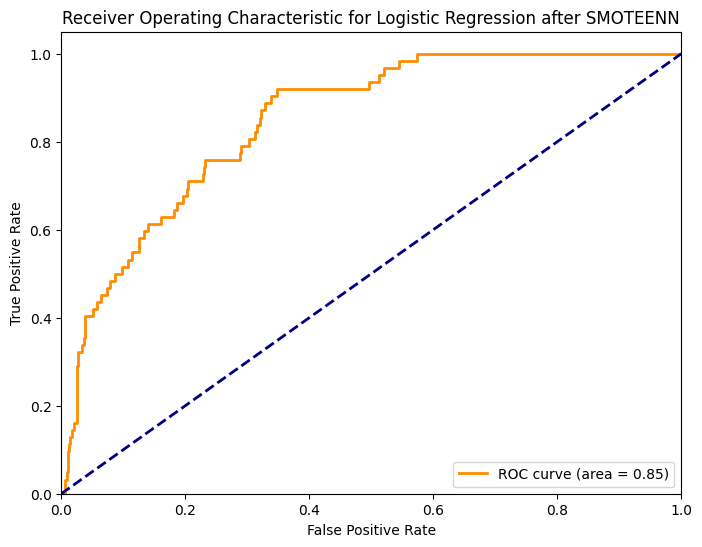

Confusion Matrix:
 [[675 285]
 [ 13  49]]


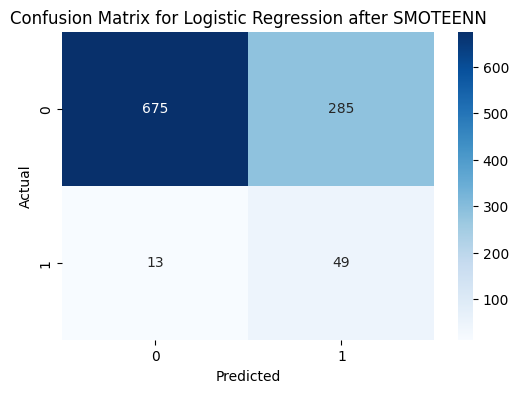


Model: Random Forest after SMOTEENN
Accuracy: 0.860078277886497
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.17      0.32      0.22        62

    accuracy                           0.86      1022
   macro avg       0.56      0.61      0.57      1022
weighted avg       0.91      0.86      0.88      1022

ROC AUC Score: 0.7984375


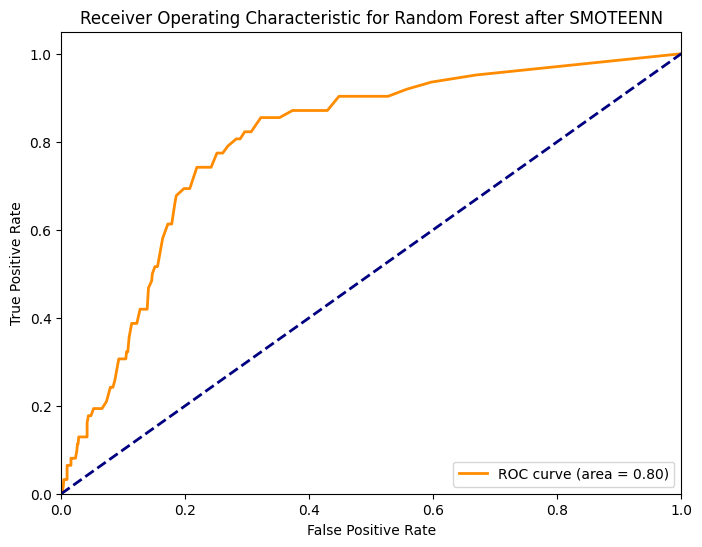

Confusion Matrix:
 [[859 101]
 [ 42  20]]


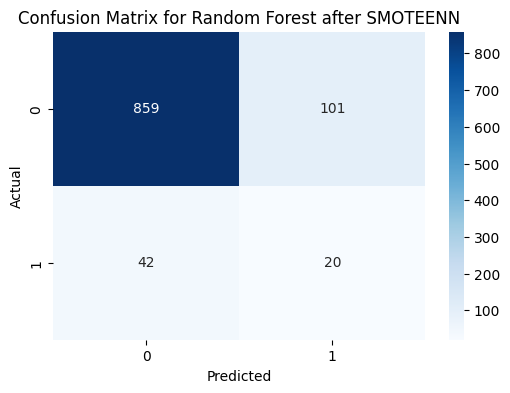


Model: Support Vector Machine after SMOTEENN
Accuracy: 0.7465753424657534
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       960
           1       0.14      0.61      0.23        62

    accuracy                           0.75      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.92      0.75      0.81      1022

ROC AUC Score: 0.7706989247311828


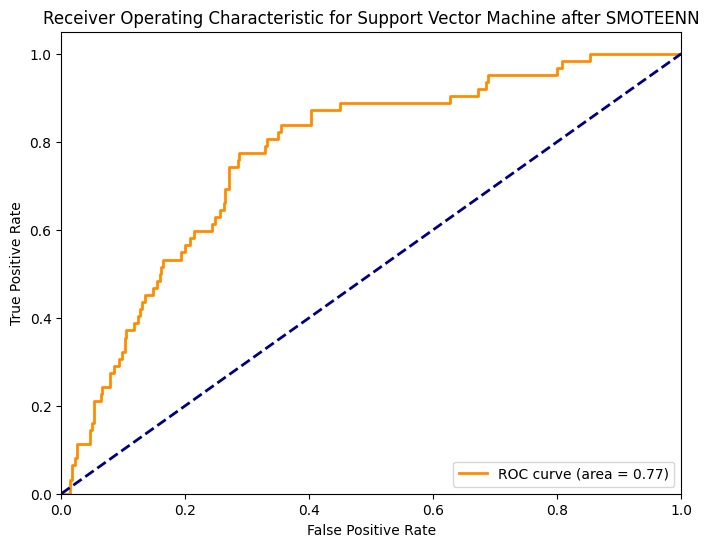

Confusion Matrix:
 [[725 235]
 [ 24  38]]


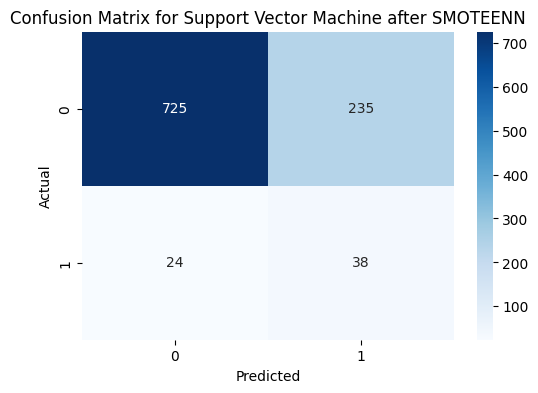


Model: Gradient Boosting after SMOTEENN
Accuracy: 0.821917808219178
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       960
           1       0.19      0.58      0.28        62

    accuracy                           0.82      1022
   macro avg       0.58      0.71      0.59      1022
weighted avg       0.92      0.82      0.86      1022

ROC AUC Score: 0.8239247311827956


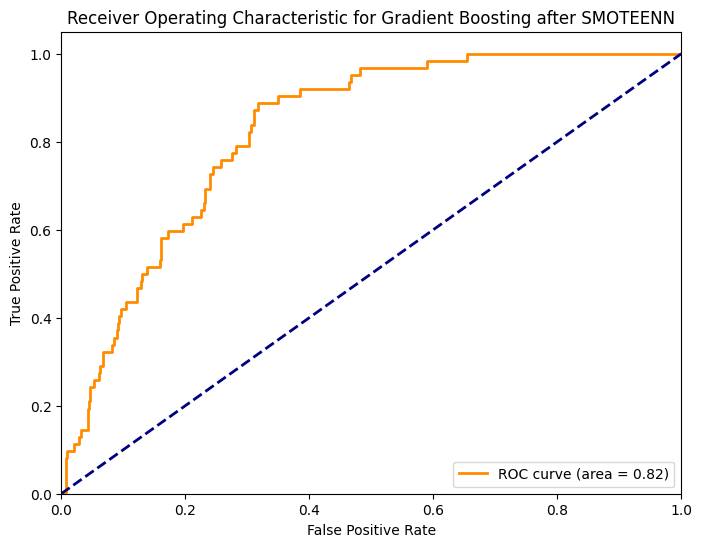

Confusion Matrix:
 [[804 156]
 [ 26  36]]


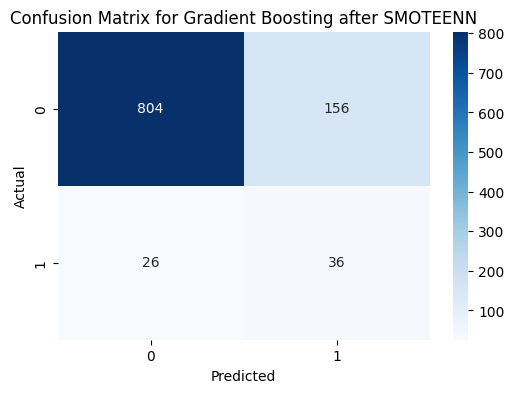


Model: AdaBoost after SMOTEENN
Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       960
           1       0.18      0.74      0.30        62

    accuracy                           0.79      1022
   macro avg       0.58      0.77      0.58      1022
weighted avg       0.93      0.79      0.84      1022

ROC AUC Score: 0.8376764112903226


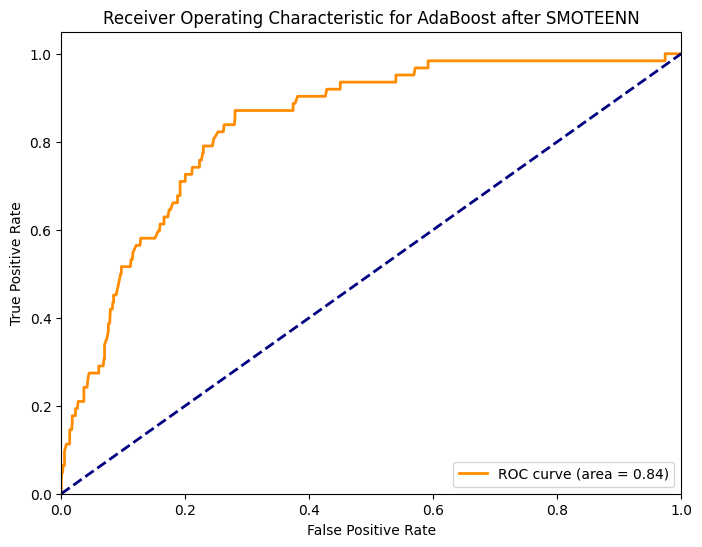

Confusion Matrix:
 [[757 203]
 [ 16  46]]


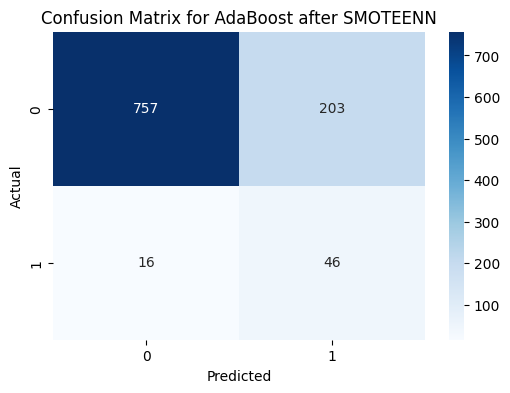


Model: k-Nearest Neighbors after SMOTEENN
Accuracy: 0.764187866927593
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       960
           1       0.14      0.55      0.22        62

    accuracy                           0.76      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.91      0.76      0.82      1022

ROC AUC Score: 0.7140120967741936


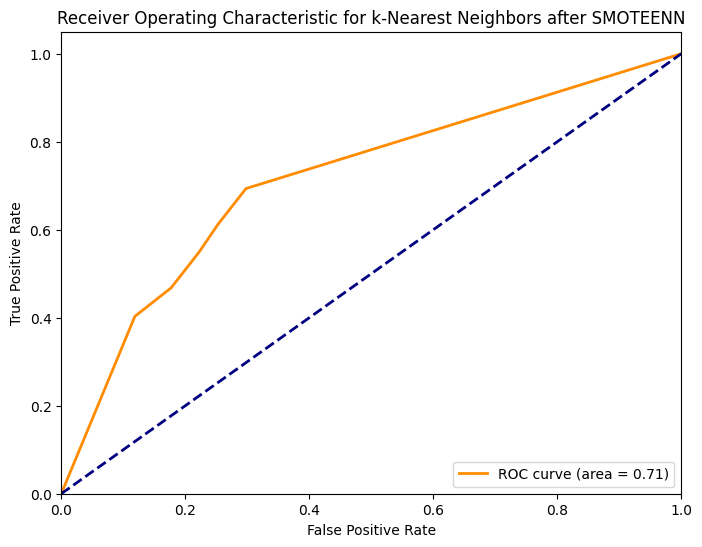

Confusion Matrix:
 [[747 213]
 [ 28  34]]


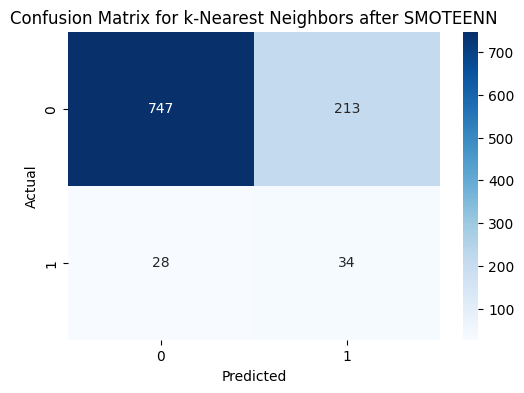


Model: Decision Tree after SMOTEENN
Accuracy: 0.8405088062622309
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       960
           1       0.17      0.40      0.23        62

    accuracy                           0.84      1022
   macro avg       0.56      0.64      0.57      1022
weighted avg       0.91      0.84      0.87      1022

ROC AUC Score: 0.6359879032258066


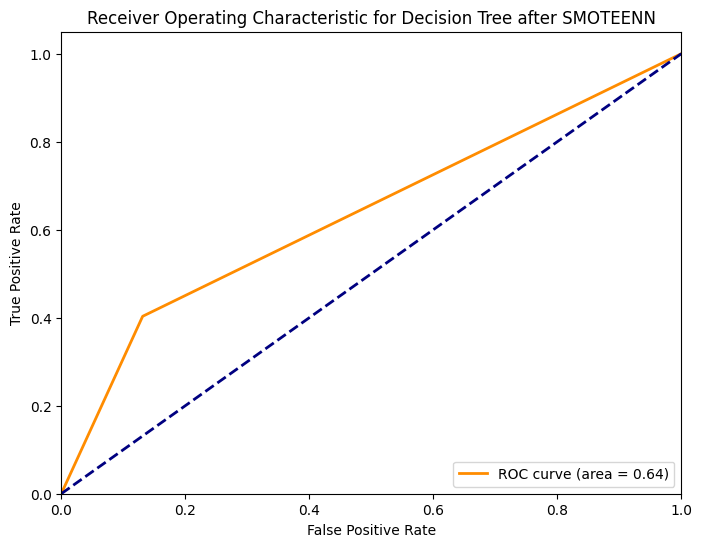

Confusion Matrix:
 [[834 126]
 [ 37  25]]


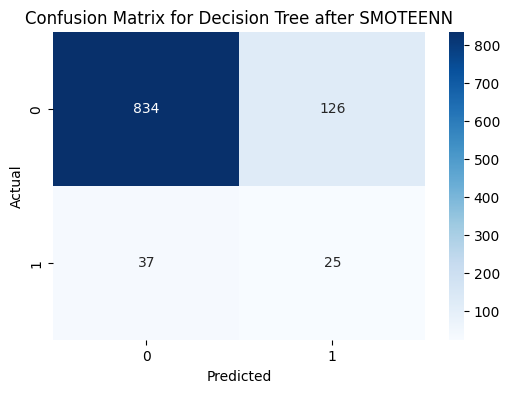


Model: Naive Bayes after SMOTEENN
Accuracy: 0.7172211350293543
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.14      0.74      0.24        62

    accuracy                           0.72      1022
   macro avg       0.56      0.73      0.53      1022
weighted avg       0.93      0.72      0.79      1022

ROC AUC Score: 0.824915994623656


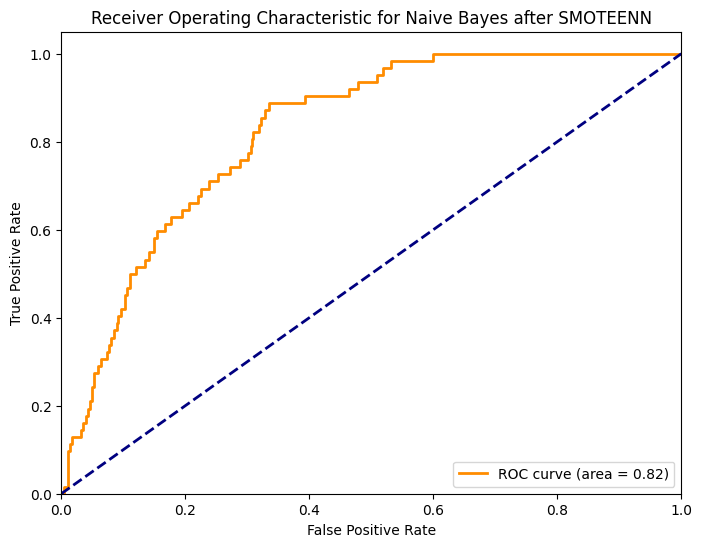

Confusion Matrix:
 [[687 273]
 [ 16  46]]


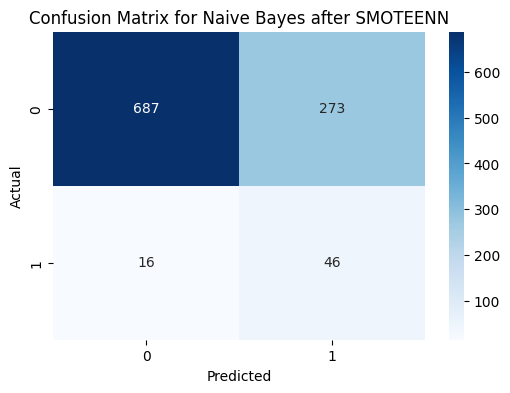


Model: Linear Discriminant Analysis after SMOTEENN
Accuracy: 0.6976516634050881
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81       960
           1       0.15      0.84      0.25        62

    accuracy                           0.70      1022
   macro avg       0.57      0.76      0.53      1022
weighted avg       0.93      0.70      0.78      1022

ROC AUC Score: 0.8469254032258065


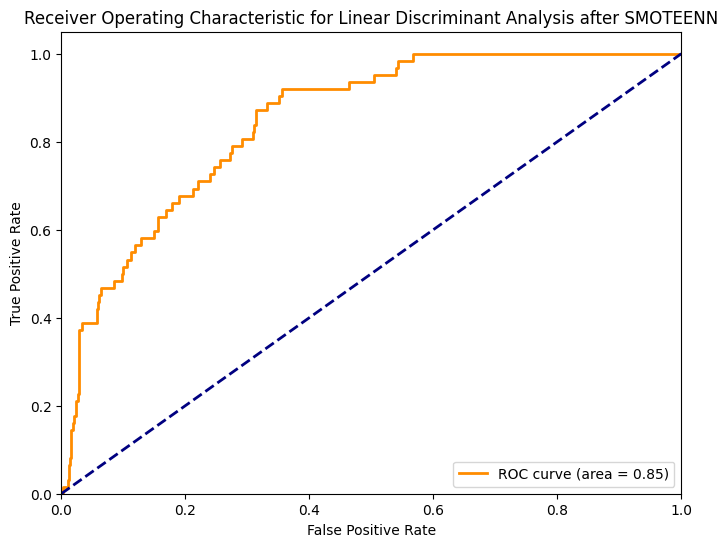

Confusion Matrix:
 [[661 299]
 [ 10  52]]


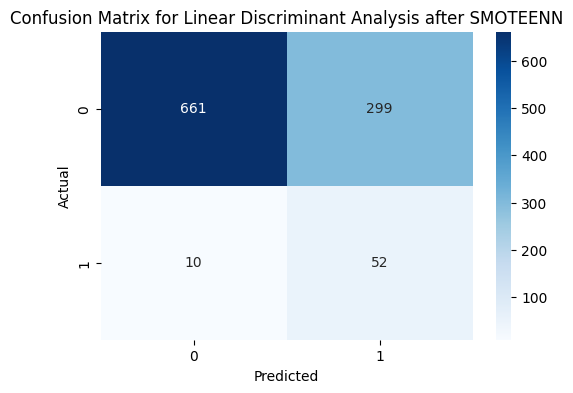


Model: Quadratic Discriminant Analysis after SMOTEENN
Accuracy: 0.7289628180039139
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       960
           1       0.15      0.77      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score: 0.8284106182795699


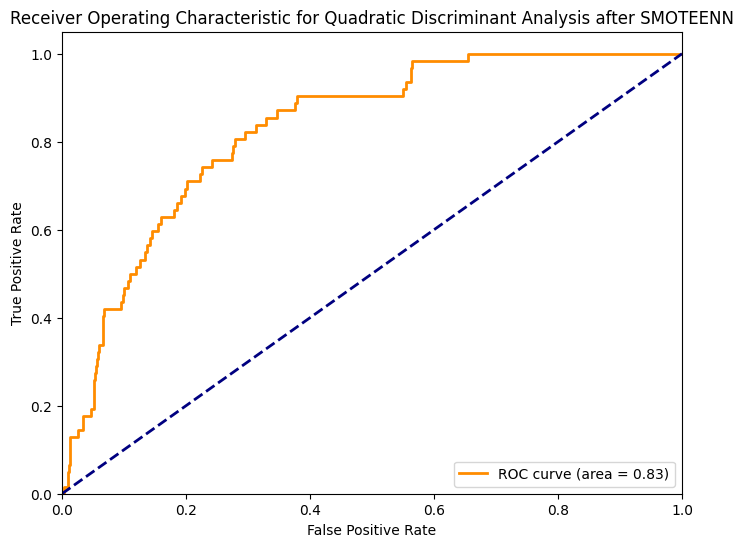

Confusion Matrix:
 [[697 263]
 [ 14  48]]


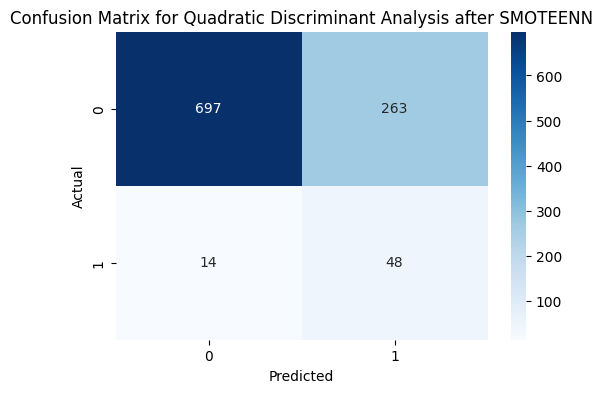


Model: Extra Trees after SMOTEENN
Accuracy: 0.8512720156555773
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       960
           1       0.16      0.34      0.22        62

    accuracy                           0.85      1022
   macro avg       0.56      0.61      0.57      1022
weighted avg       0.91      0.85      0.88      1022

ROC AUC Score: 0.7742019489247312


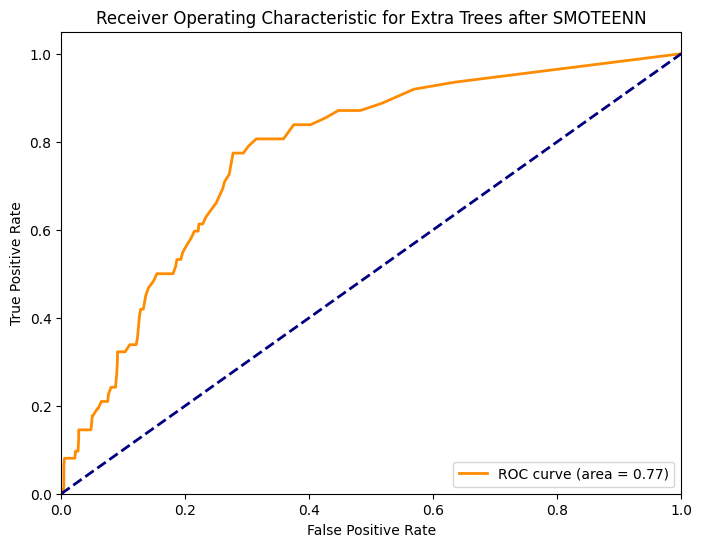

Confusion Matrix:
 [[849 111]
 [ 41  21]]


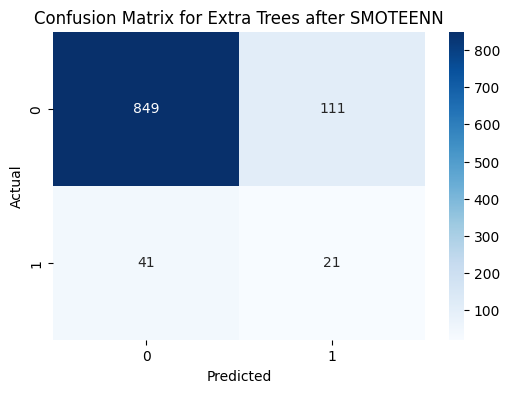


Applying SMOTETomek

Model: Logistic Regression after SMOTETomek
Accuracy: 0.7573385518590998
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.74      0.27        62

    accuracy                           0.76      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.76      0.82      1022

ROC AUC Score: 0.848807123655914


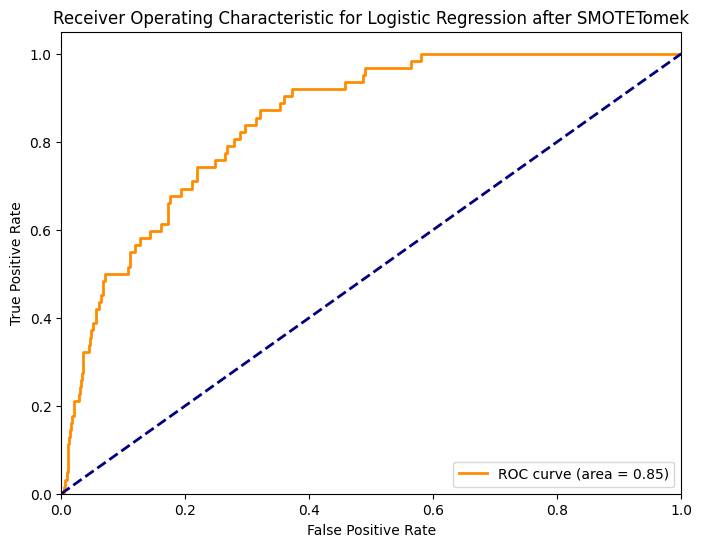

Confusion Matrix:
 [[728 232]
 [ 16  46]]


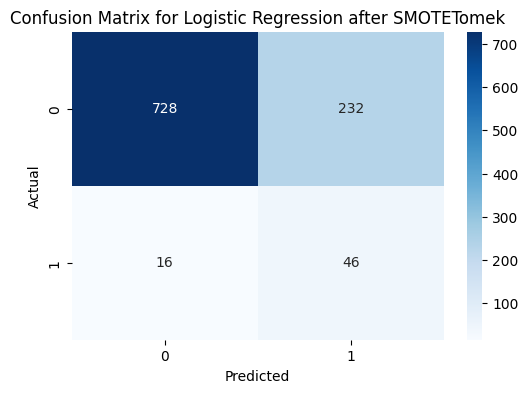


Model: Random Forest after SMOTETomek
Accuracy: 0.9158512720156555
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.17      0.10      0.12        62

    accuracy                           0.92      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022

ROC AUC Score: 0.7963373655913979


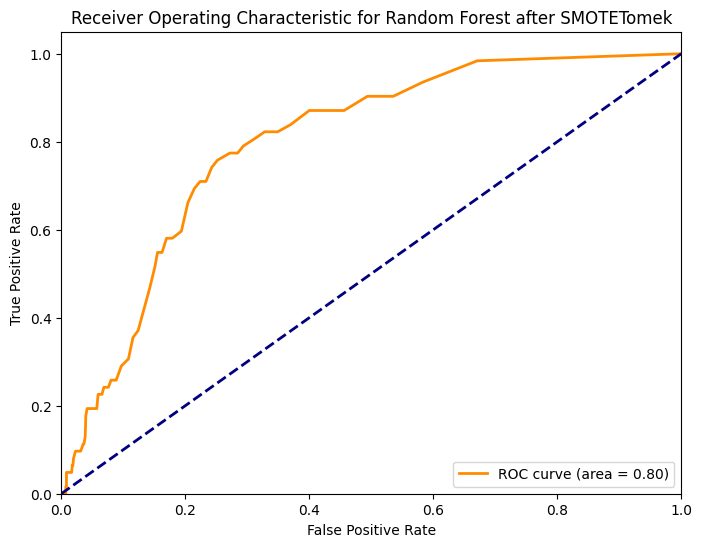

Confusion Matrix:
 [[930  30]
 [ 56   6]]


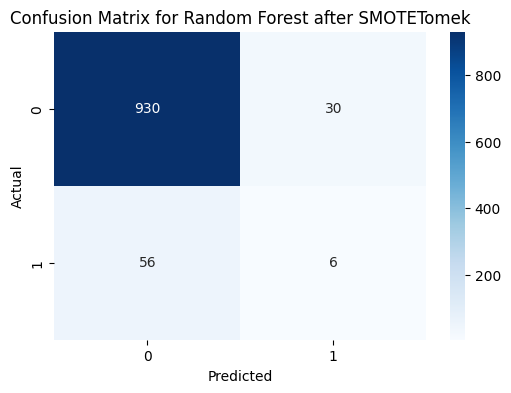


Model: Support Vector Machine after SMOTETomek
Accuracy: 0.7827788649706457
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       960
           1       0.15      0.55      0.23        62

    accuracy                           0.78      1022
   macro avg       0.56      0.67      0.55      1022
weighted avg       0.92      0.78      0.83      1022

ROC AUC Score: 0.7663978494623657


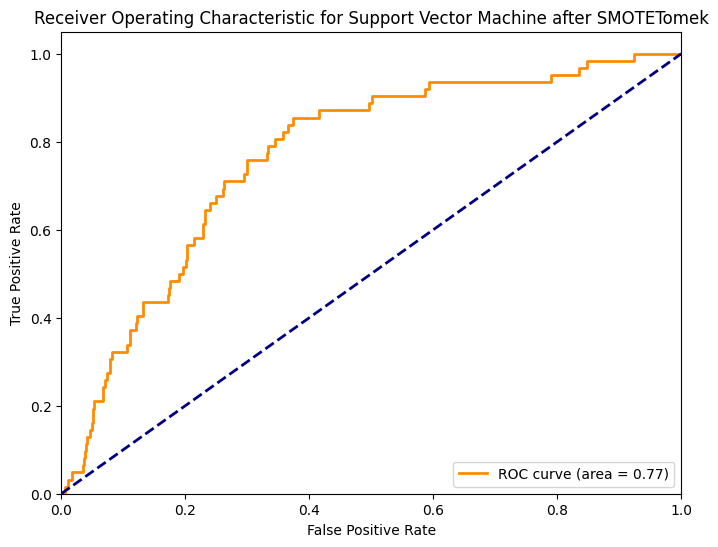

Confusion Matrix:
 [[766 194]
 [ 28  34]]


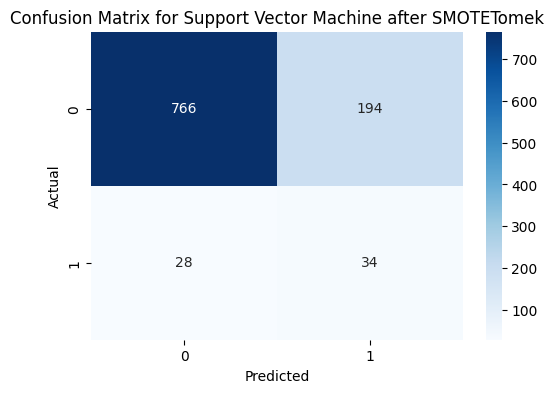


Model: Gradient Boosting after SMOTETomek
Accuracy: 0.863013698630137
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.19      0.37      0.25        62

    accuracy                           0.86      1022
   macro avg       0.57      0.63      0.59      1022
weighted avg       0.91      0.86      0.88      1022

ROC AUC Score: 0.821177755376344


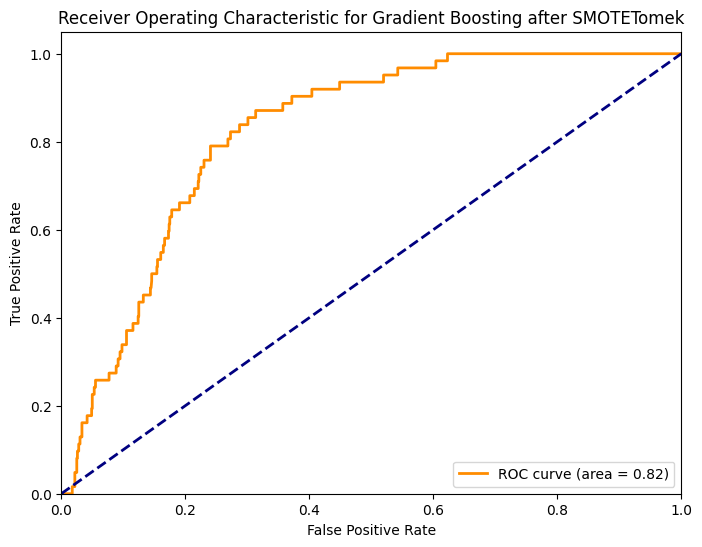

Confusion Matrix:
 [[859 101]
 [ 39  23]]


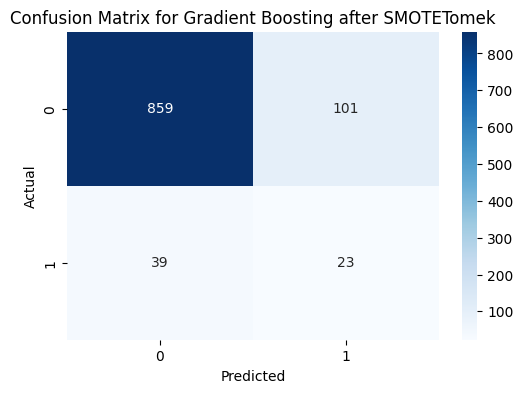


Model: AdaBoost after SMOTETomek
Accuracy: 0.8317025440313112
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       960
           1       0.21      0.63      0.31        62

    accuracy                           0.83      1022
   macro avg       0.59      0.74      0.61      1022
weighted avg       0.93      0.83      0.87      1022

ROC AUC Score: 0.8175823252688172


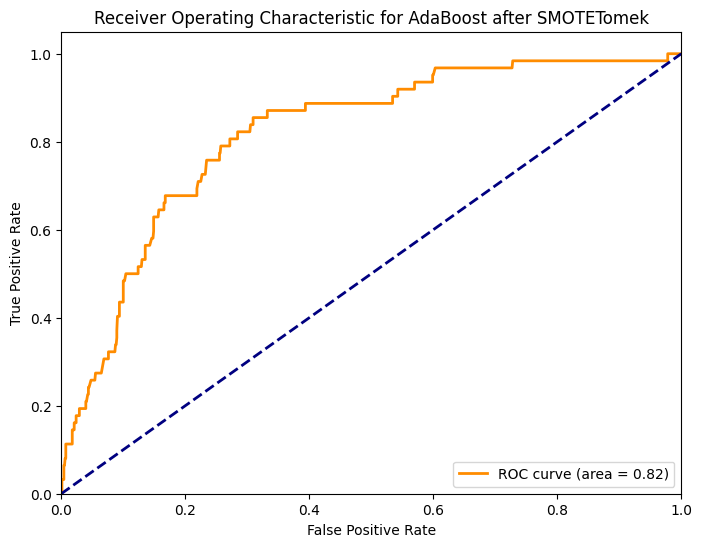

Confusion Matrix:
 [[811 149]
 [ 23  39]]


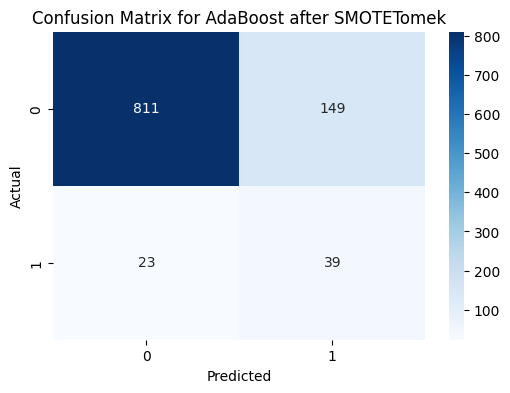


Model: k-Nearest Neighbors after SMOTETomek
Accuracy: 0.8199608610567515
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       960
           1       0.15      0.42      0.22        62

    accuracy                           0.82      1022
   macro avg       0.55      0.63      0.56      1022
weighted avg       0.91      0.82      0.86      1022

ROC AUC Score: 0.6778057795698925


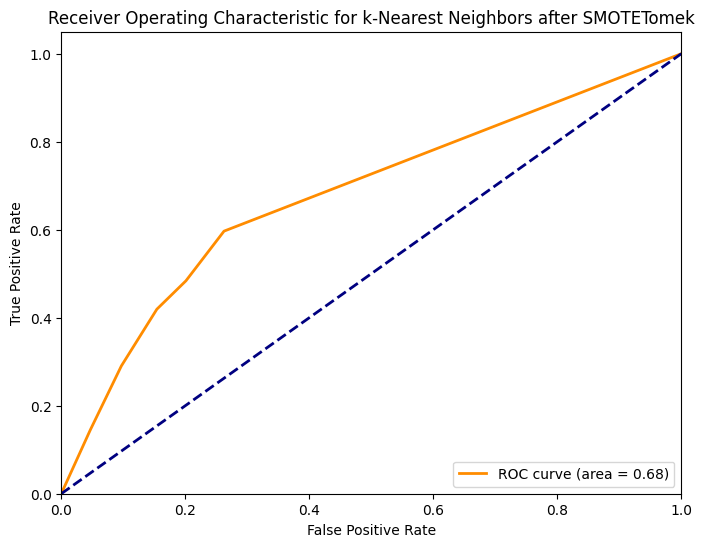

Confusion Matrix:
 [[812 148]
 [ 36  26]]


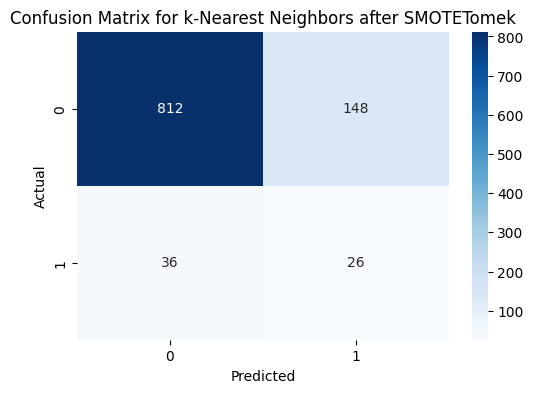


Model: Decision Tree after SMOTETomek
Accuracy: 0.8581213307240705
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       960
           1       0.12      0.21      0.15        62

    accuracy                           0.86      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.90      0.86      0.88      1022

ROC AUC Score: 0.5548387096774194


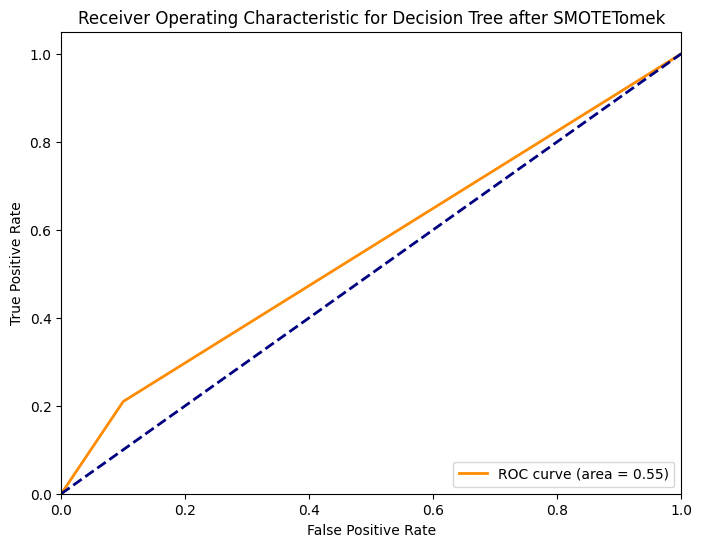

Confusion Matrix:
 [[864  96]
 [ 49  13]]


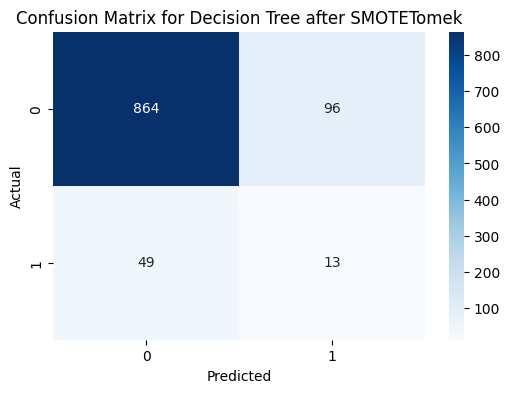


Model: Naive Bayes after SMOTETomek
Accuracy: 0.726027397260274
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022

ROC AUC Score: 0.8309979838709678


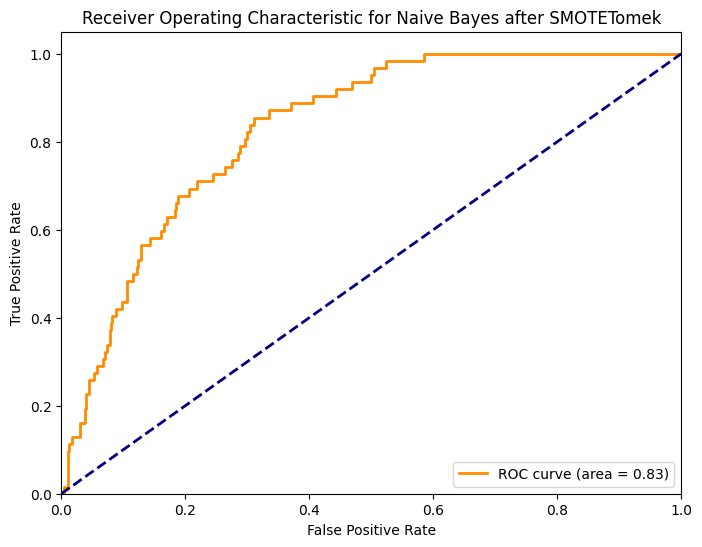

Confusion Matrix:
 [[695 265]
 [ 15  47]]


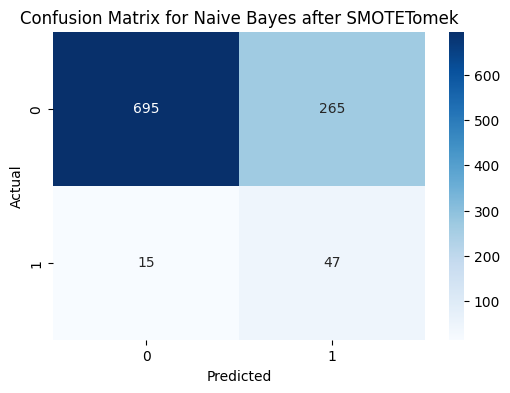


Model: Linear Discriminant Analysis after SMOTETomek
Accuracy: 0.7407045009784736
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.74      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.74      0.55      1022
weighted avg       0.93      0.74      0.81      1022

ROC AUC Score: 0.8472110215053763


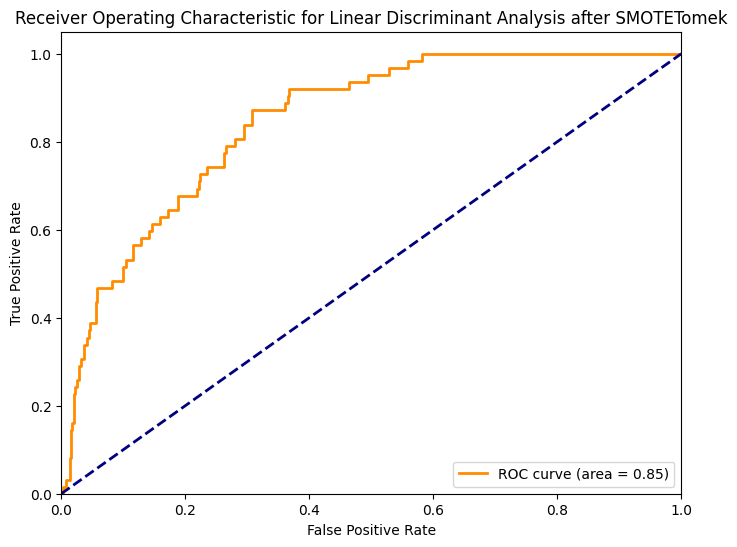

Confusion Matrix:
 [[711 249]
 [ 16  46]]


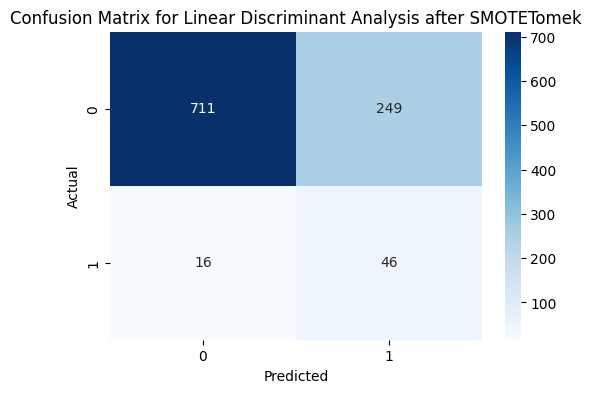


Model: Quadratic Discriminant Analysis after SMOTETomek
Accuracy: 0.7436399217221135
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.17      0.82      0.28        62

    accuracy                           0.74      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.94      0.74      0.81      1022

ROC AUC Score: 0.8388608870967742


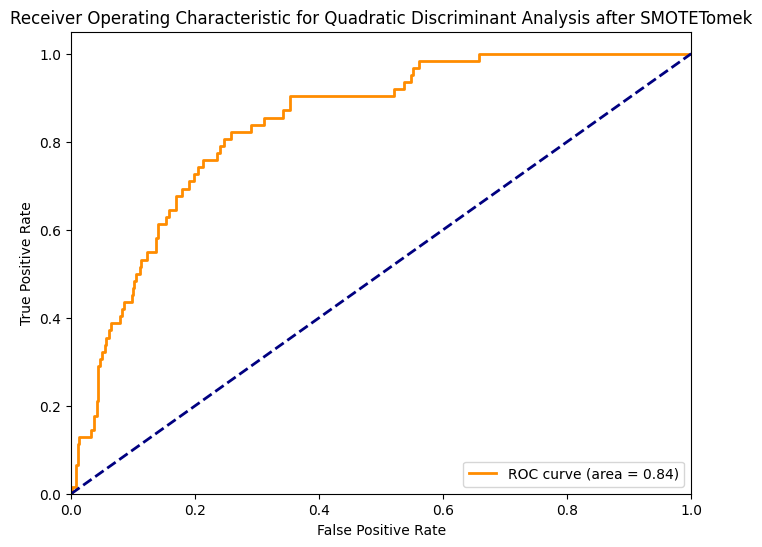

Confusion Matrix:
 [[709 251]
 [ 11  51]]


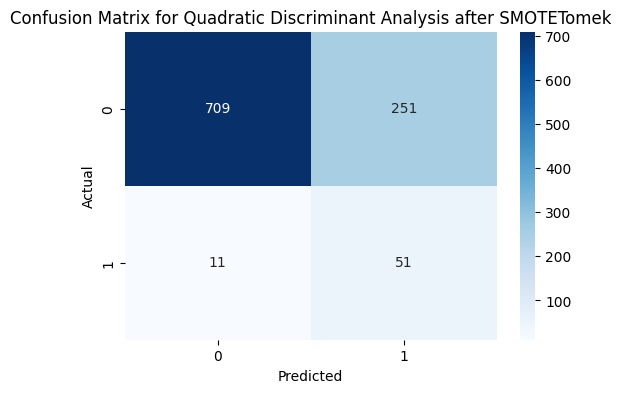


Model: Extra Trees after SMOTETomek
Accuracy: 0.9129158512720157
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.15      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.90      0.91      0.90      1022

ROC AUC Score: 0.7757476478494624


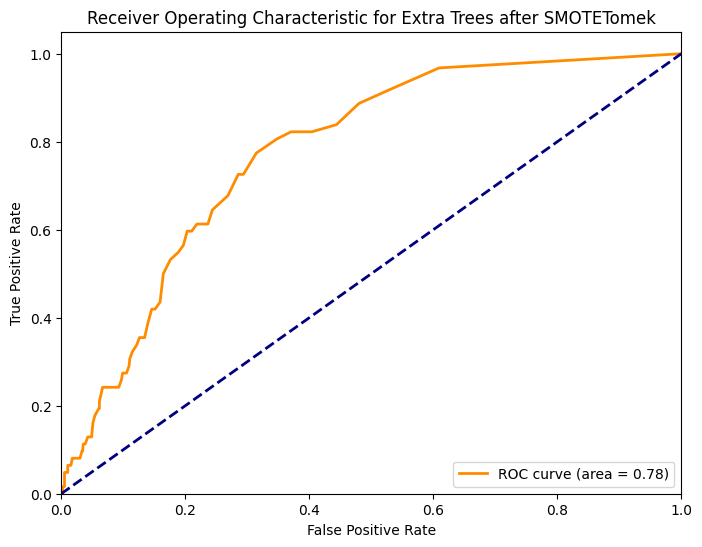

Confusion Matrix:
 [[927  33]
 [ 56   6]]


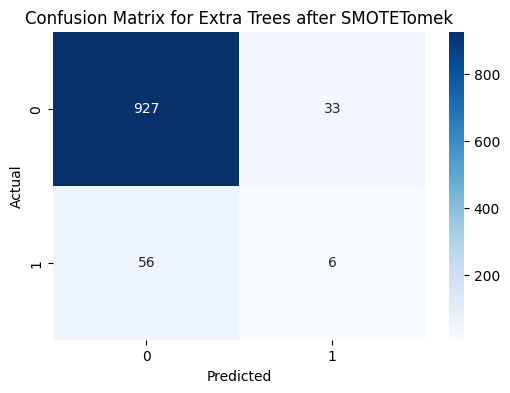

In [25]:

# Apply oversampling techniques, evaluate models, and plot ROC curves
for method_name, method in oversampling_methods.items():
    print(f"\nApplying {method_name}")
    try:
        X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    except RuntimeError as e:
        print(f"Skipping {method_name} due to error: {e}")
        continue

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        print(f"\nModel: {model_name} after {method_name}")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        if y_pred_proba is not None:
            print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic for {model_name} after {method_name}')
            plt.legend(loc="lower right")
            plt.show()

        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name} after {method_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()